# Integrated Project 1
## Ice Online Video Game Sales
**Author: Krystian Dennis**

<a name="business-understanding"></a>
## Business Understanding

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

🎯 You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

<a name="dataset"></a>
## Dataset

There are 16,715 sales records from Ice online video game sales. The data is from 2016. 

The `Games` Dataset contains 11 columns with the following information:
* **Name** - Name of video game
* **Platform** - Name of game console
* **Year_of_Release** - Year video game was released
* **Genre** - Catergory of video game
* **NA_sales** - North American sales in USD million
* **EU_sales** - sales in Europe in USD million
* **JP_sales** - sales in Japan in USD million
* **Other_sales** - sales in other countries in USD million
* **Critic_Score** - maximum of 100
* **User_Score** - maximum of 10
* **Rating** - Entertainment Software Rating Board (ESRB) evaluates a game's content and assigns an age rating such as Teen or Mature.


<a name="table-of-contents"></a>
## Table of Contents

## [Library Installation and Helper Functions](#libraries-and-functions)

- [Import Libraries](#import-libraries)
- [Define Default Settings](#define-default-settings)
- [Useful Functions](#useful-functions)
    
## [Import Data](#import-data)

- [Import and Explore Data](#import-dataset)
    
## [Exploratory Data Analysis](#eda)

- [Initial Look at Features](#initial-look)
  * Name
  * Platform
  * Year of Release
  * Genre
  * NA Sales
  * EU Sales
  * JP Sales
  * Other Sales
  * Critic Score
  * User Score
  * Rating

## [Data Prepartion](#data-preparation)

- [Data Pre-processing](#data-preprocessing)
  * Missing Values
  * Duplicates
    + Case Sensitive Duplicates
  * Data Type Replacement
- [Feature Engineering](#feature-engineering)
  * Feature Generation
    + Total Sales Column
    + Top Region Column
    
## [Data Analysis](#data-analysis)

* [Task 1](#task-1)
* [Task 2](#task-2)
* [Task 3](#task-3)
* [Task 4](#task-4)
* [Task 5](#task-5)
* [Task 6](#task-6)
* [Task 7](#task-7)
* [Task 8](#task-8)
* [Task 9](#task-9)
    
## [Hypothesis Testing](#hypothesis-testing)

* Hypothesis 1

* Hypothesis 2

    
## [Conclusions](#conclusions)

## Library Installation and Helper Functions<a name="libraries-and-functions"></a>

## Import Libraries <a name="import-libraries"></a>

In [1]:
#default libraries to import
import pandas as pd
import numpy as np

from scipy import stats as st

import missingno as msno 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette('Set2')

from IPython.core.display import HTML # to modify the location of images

import warnings
warnings.filterwarnings("ignore")

print('All Libraries Imported')

All Libraries Imported


[Back to Table of Contents](#table-of-contents)

<a name="define-default-settings"></a>
## Define Default Settings

The scheme for the entire notebook is set in advance.

<a name="set-display-width"></a>
### Set Display Width

This code sets the maximum width of all columns in the notebook in Pandas display options.

In [2]:
pd.set_option('display.max_colwidth', 500)

<a name="center-images"></a>
### Center Images

The following code modifies the CSS of this notebook so that any images created will be centered on the console instead of left justified.

In [3]:
#this code centers images on the screen
# code sourced from https://www.science-emergence.com/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

[Back to Table of Contents](#table-of-contents)

<a name="useful-functions"></a>
## Useful Functions

These functions were defined to make processing the data easier. 

1. dataframe_info()
2. column_value_counts()
3. missing_viz()
4. column_names()
5. df_shape()
6. find_nas()
7. impute_median()
8. change_to_int()
9. find_duplicates()
10. 
11. single_column_eda()
12. min_max()
13. column_hist_kde()
14. add_freq()

In [4]:
def dataframe_info(df):
    '''
    Prints summary statistics for a dataframe.
    input: dataframe
    output: dataframe head, tail, info and describe
    '''
    print('First 5 Rows'.center(124,'-'))
    display(df.head())
    print('Last 5 Rows'.center(124,'-'))
    display(df.tail())
    print('Dataframe Info'.center(124,'-') + '\n')
    display(df.info())
    print('Dataframe Describe'.center(124,'-'))
    display(round(df.describe(),2))

In [5]:
def standardize_cols(df):
    '''
    '''
    df.columns = [col.lower().replace(' ','_') for col in df.columns]
    return df.columns

In [6]:
def column_value_counts(df):
    '''
    Prints table of value counts and total missing values per column.
    input: dataframe
    output: table of value counts and missing values by column
    '''
    print('Value Counts and Missing Values for Each Column'.center(124) + '\n')
    for column in df:
        proportions = pd.concat([df[column].value_counts(dropna=False),df[column].value_counts(dropna=False,normalize=True)],
                                axis=1, keys=['count','percentage'])
        print(str.upper(column).center(124))
        print(''.center(124, '_') + '\n')
        print('*****Value Counts*****'.center(124))
        print(proportions)
        print('\n')
        print('*****Total Missing Values*****'.center(124))
        print('{: ^124}'.format(df[column].isna().sum()))
        print(''.center(124, '_') + '\n')

In [7]:
def add_freq():
    '''
    code from: https://github.com/IdoZehori/Credit_Score
    
    '''
    global ax
    ncount = len(df)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]\n')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
    ax2.set_ylim(0,100)
    ax2.grid(None)

In [8]:
def single_column_eda(column, bins=None, kde=None, rug=None, figsize=None):
    '''
    Prints table of value counts and total missing values per column.
    input: dataframe
    output: table of value counts and missing values by column
    '''
    print('Initial Look at {}'.format(column.name.title()).center(124))
    global ax
    proportions = pd.concat([column.value_counts(dropna=False), column.value_counts(dropna=False,normalize=True)],
                                axis=1, keys=['count','percentage'])
    percent = round((column.isnull().sum()/column.isnull().count())*100,2)
    cols = df.select_dtypes(include=np.number).columns.to_list()
    bools = df.select_dtypes(include=['bool', object]).columns.to_list()
    print(''.center(124, '_') + '\n')
    if column.dtypes == int or column.dtypes == float or column.dtypes == np.number:
        plt.figure(figsize=figsize)
        sns.distplot(column, bins=bins, kde=kde, rug=rug).set(xlabel=None)
        plt.title(label=column.name.title() + '\n', fontsize=18)
        plt.axvline(column.mean(), color='#008000', label='{} mean'.format(column.name.title()))
        plt.legend()
        plt.show()
    if column.dtypes == 'bool':
        plt.figure(figsize=figsize)
        ax = sns.countplot(x = column, palette="Set3")
        ax.set(xlabel=None)
        plt.title(label=column.name.title() + '\n', fontsize=18)
        fig = plt.gcf()
        add_freq()
        plt.show()
    if column.dtypes != object:
        print('Skew: {}, Kurtosis: {}'.format(column.skew(), column.kurtosis()).center(124))
    print(''.center(124, '_') + '\n')
    print('*****Value Counts*****'.center(124))
    print(proportions)
    print('\n')
    print('*****Total Missing Values*****'.center(124) + '\n')
    print('Total: {}, Percentage: {}%'.format(column.isna().sum(), percent).center(124))

In [9]:
def min_max(column):
    '''
    prints the minimum and maximum value of a variable. 
    '''
    if column.dtypes != 'bool' or column.dtypes != object:
        print('Minimum Value: {}, Maximum Value: {}'.format(column.min(), column.max()))
        print('\n')

In [10]:
def missing_viz(df):
    '''
    produces bar graph showing missing values per column using missingno.
    '''
    import missingno
    msno.bar(df)

In [11]:
def column_names(df):
    '''
    Returns list of column names
    input: dataframe
    output: list of column names
    '''
    return list(df.columns)

In [12]:
def df_shape(df):
    '''
    Prints sentence with number of rows and columns.
    input: dataframe
    output: print statement of shape of dataframe
    '''
    rows, columns = df.shape
    print('There are {} rows and {} columns.'.format(rows,columns))

In [13]:
def column_hist_kde(column, bins=None, kde=None, rug=None, figsize=None):
    '''
    creates histogram with optional bins, kernel density estimate, rug and figsize. prints skew and kurtosis.
    '''
    plt.figure(figsize=figsize)
    sns.distplot(column, bins=bins, kde=kde, rug=rug).set(xlabel=None)
    plt.title(label=column.name.title() + '\n', fontsize=18)
    plt.show()
    print('Skew: {}, Kurtosis: {}'.format(column.skew(), column.kurtosis()).center(124))
    print('\n')
    
#cols = df.select_dtypes(include=np.number).columns
#for col in cols:
#    column_hist_kde(df[col], 10, False, False, (10,8))

In [14]:
def find_nas(df):
    '''
    Returns number of rows in dataframe that has missing values.
    input: dataframe
    output: print statement with number of missing values and dataframe of NaNs 
    '''
    is_na = df.isnull()
    any_na = is_na.any(axis=1)
    has_na = df[any_na]
    rows, columns = has_na.shape
    print('There are {} missing values in the dataframe.'.format(rows))
    return has_na

In [15]:
def impute_median(series):
    '''
    Imputes median of dataframe grouped by specified columns.
    input: series grouped by necessary columns
    output: Nan filles with median of the specified series
    '''
    return series.fillna(series.median())

In [16]:
def change_to_int(column):
    '''
    Changes all rows in column to integers. Returns the new column or dataframe showing errors if row cannot be converted.
    input: column
    output: new column converted to integers or dataframe containing number index and content of row with error 
    prints out the total number of rows in the column and total errors found in the column
   '''
    errors_found = 0
    try:
        new_column = column.astype('Int64')
        count_rows = len(new_column)
    except:
        errors_found += 1
    print('{} totals rows changed to integers with {} errors found.'.format(count_rows, errors_found))
    return new_column

In [17]:
def change_to_float(column):
    '''
    Changes all rows in column to floats. Returns the new column or dataframe showing errors if row cannot be converted.
    input: column
    output: new column converted to floats or dataframe containing number index and content of row with error 
    prints out the total number of rows in the column and total errors found in the column
   '''
    errors_found = 0
    try:
        new_column = column.astype('float64')
        count_rows = len(new_column)
    except:
        errors_found += 1
    print('{} totals rows changed to floats with {} errors found.'.format(count_rows, errors_found))
    return new_column

In [18]:
def find_duplicates(df):
    '''
    Identifies duplicated rows in a dataframe. prints the count of duplicated rows.
    input: all data in dataframe
    output: table containing all duplicated rows and print statement of count of duplicated rows
    '''
    duplicate_rows = df[df.duplicated()]
    print('Total number of duplicates: ' + str(len(duplicate_rows)))
    return duplicate_rows

In [19]:
def missing_data(df):
    '''
    Returns dataframe of missing values and their percentages in each column in descending order.
    input: dataframe
    output: dataframe of total missing values per column and corresponding percentages
    '''
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

[Back to Table of Contents](#table-of-contents)

## Import Data<a name="import-data"></a>

<a name="import-dataset"></a>
## Import and Explore Data

The dataset will be imported and we will take an initial look at the data.

In [20]:
df = pd.read_csv('games.csv')

Let's look at the first five rows, last five rows, overall summary and 5-point statistics for the dataframe.

In [21]:
#returns summary statistics for the dataframe
dataframe_info(df)

--------------------------------------------------------First 5 Rows--------------------------------------------------------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


--------------------------------------------------------Last 5 Rows---------------------------------------------------------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


-------------------------------------------------------Dataframe Info-------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

-----------------------------------------------------Dataframe Describe-----------------------------------------------------


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [22]:
standardize_cols(df)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [23]:
#returns list of column names
column_names(df)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [24]:
#shows shape of dataframe in sentence format
df_shape(df)

There are 16715 rows and 11 columns.


#remove columns that will not be used for analysis
df.drop(['COLUMN_NAME'], axis =1, inplace =True)
df.head()

In [25]:
missing_data(df)

,Total,Percent
critic_score,8578,51.319174
rating,6766,40.478612
user_score,6701,40.089740
year_of_release,269,1.609333
genre,2,0.011965
name,2,0.011965
other_sales,0,0.000000
jp_sales,0,0.000000
eu_sales,0,0.000000
na_sales,0,0.000000


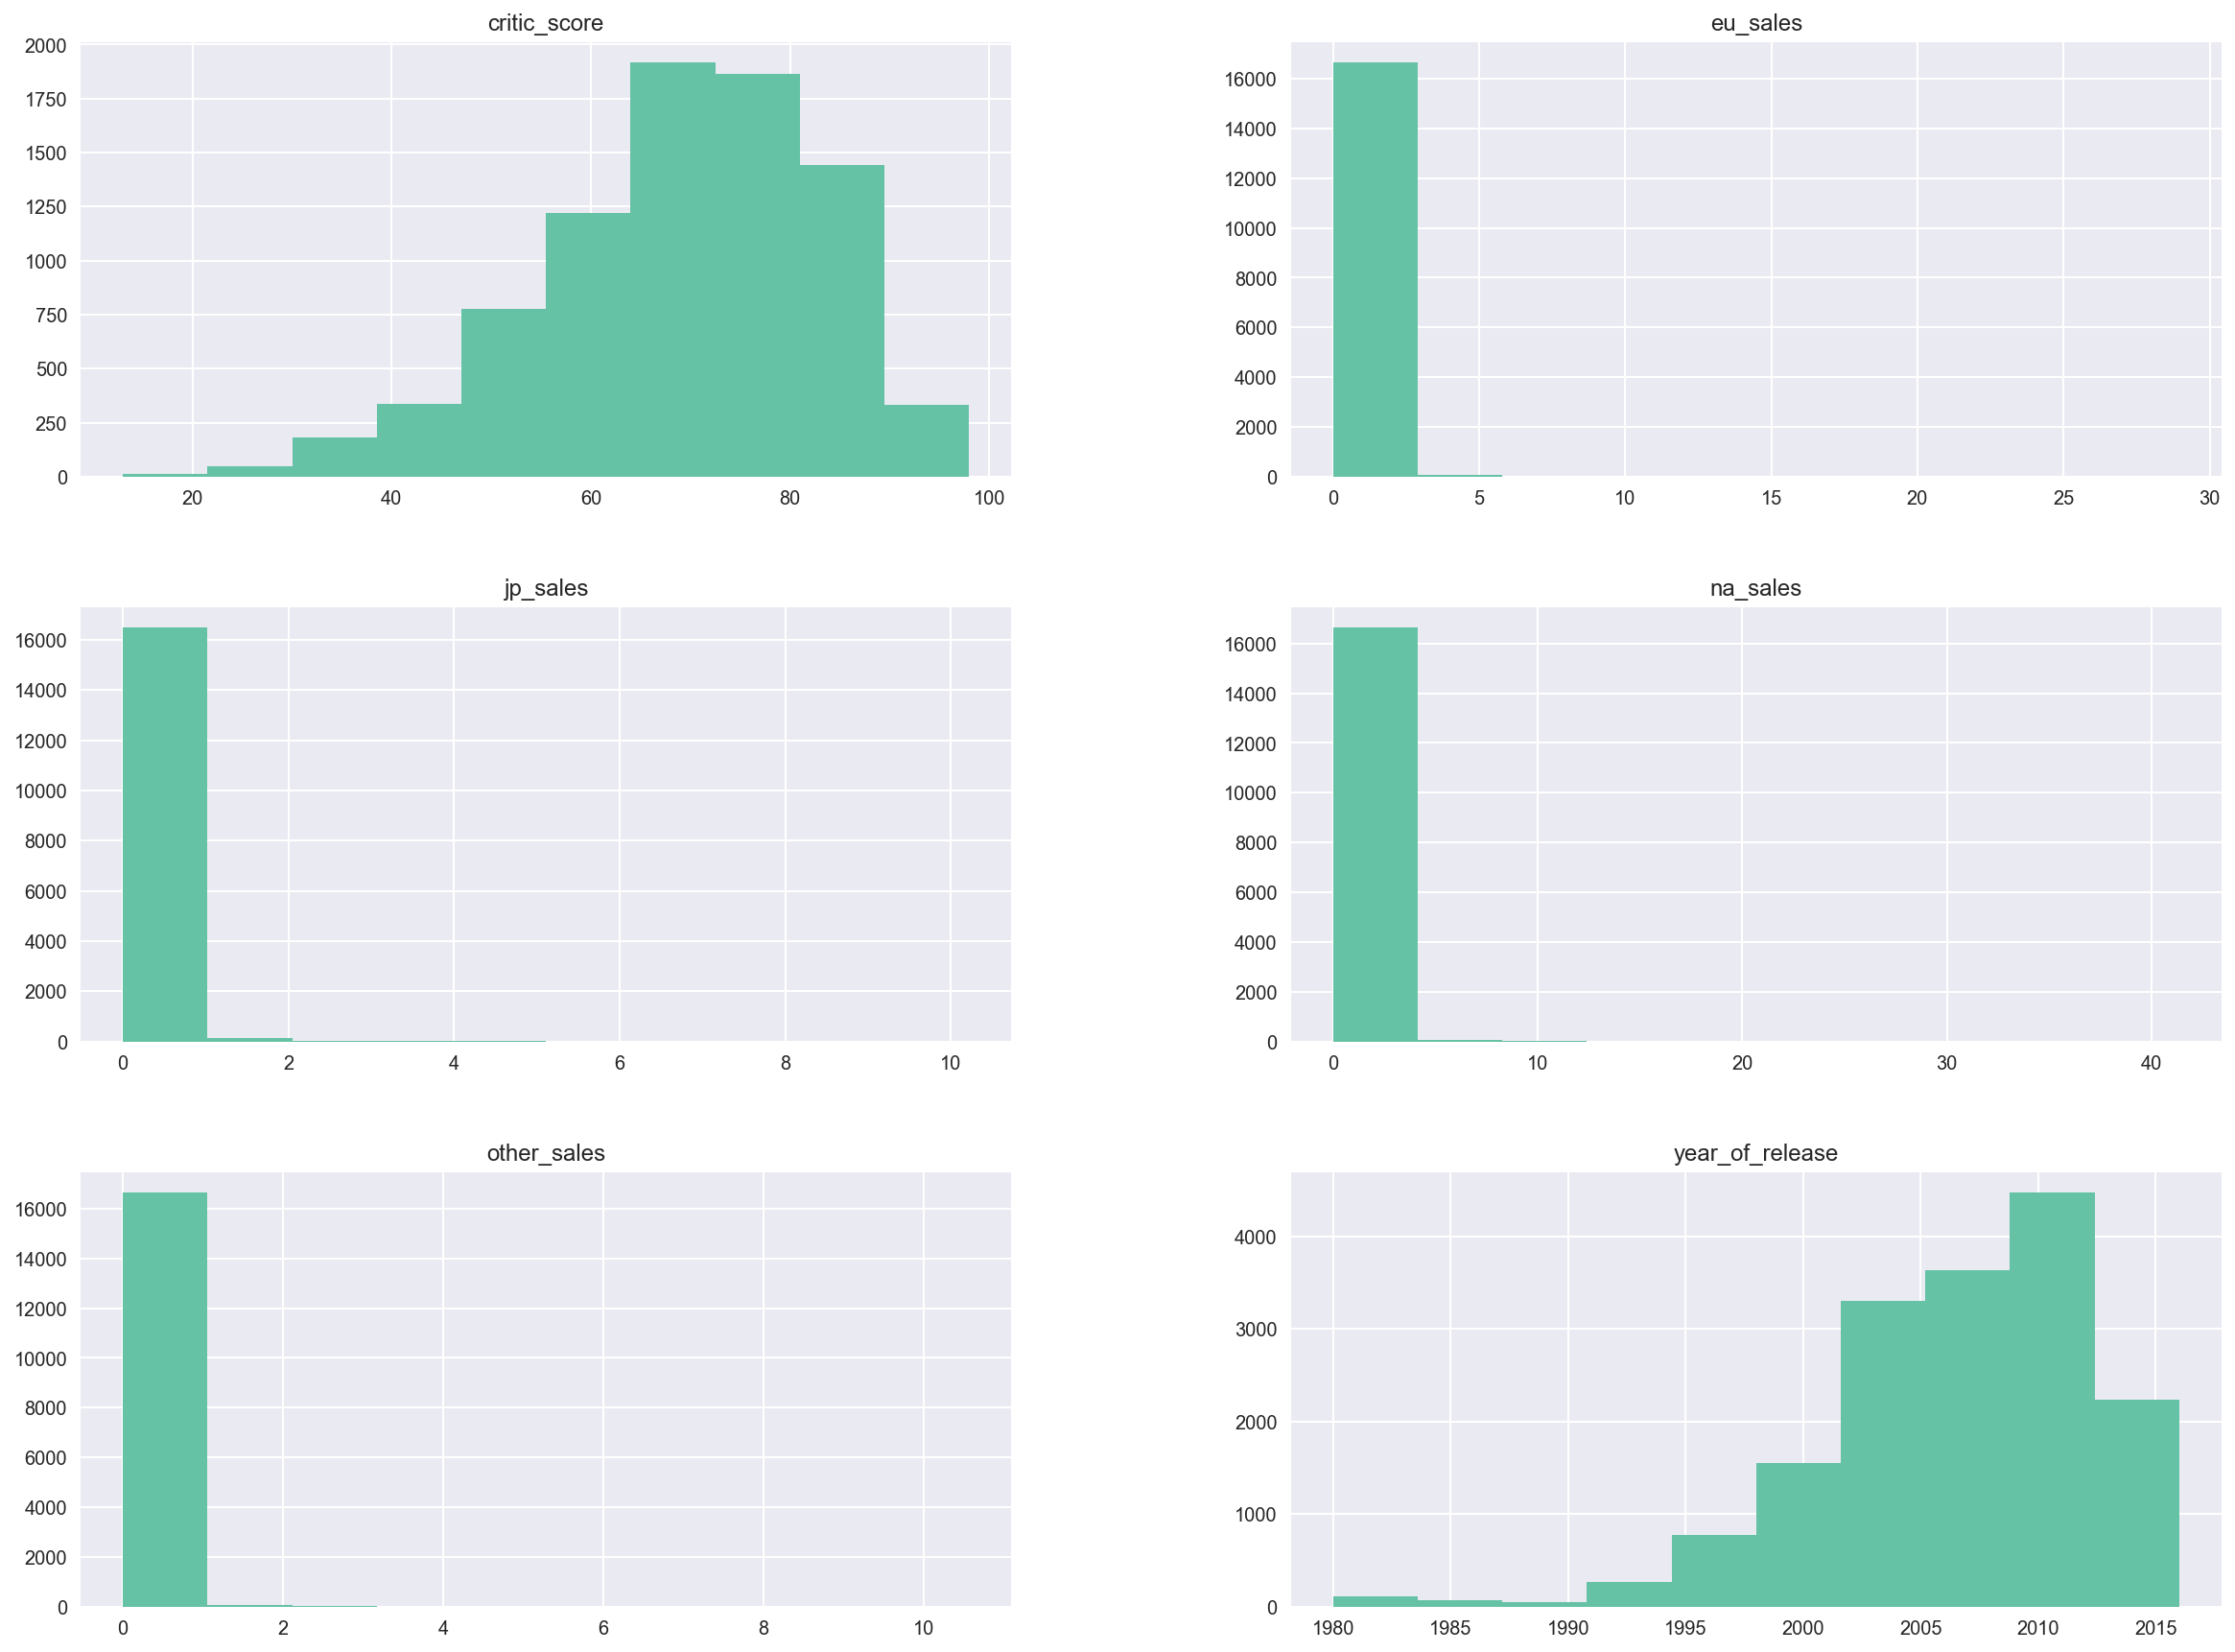

In [26]:
#shows initial distribution of quantitative variables
cols = df.select_dtypes(include=np.number).columns
df[cols].hist(figsize=(20,15))
plt.show()

### Conclusion

From an initial look at the data, it seems that all data has been imported properly.

* 📝 There are 16715 records of online sales at Ice since 2016

* ⚠️ There are missing values in the following columns:
    * `name` - 2 missing values
    * `year_of_release` - 269 missing values
    * `genre` - 2 missing values
    * `critic_score` - 8578 missing values
    * `user_score` - 6701 missing values
    * `rating` - 6766 missing values
    
* #️⃣ The data type for the following columns will be changed to `int`:
    * `year_of_release` - year video game was released
    * `critic_score` - rating given by game critic with a maximum of 100
    
* #️⃣ The data type for the following columns will be changed to `float`:
    * `user_score` - rating given by game players with a maximum of 10

[Back to Table of Contents](#table-of-contents)

<a name="eda"></a>
## [Exploratory Data Analysis](#eda)

We will have a look at all columns to determine values that need to be replaced, have look at the distribution of variables and discover any patterns in the data. We also find anomalies, too.

<a name="initial-look"></a>
### Initial Look at Features

Each column will be explored individually to look for trends and anomalies in the data. We can also see more about the data quality and what changes are necessary to fully leverage the data.

### Name

In [27]:
single_column_eda(df['name'], bins=None, kde=None, rug=None, figsize=(10,8))

                                                    Initial Look at Name                                                    
____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
                                         count  percentage
Need for Speed: Most Wanted                 12    0.000718
FIFA 14                                      9    0.000538
Ratatouille                                  9    0.000538
LEGO Marvel Super Heroes                     9    0.000538
Madden NFL 07                                9    0.000538
...                                        ...         ...
The Fairly Odd Parents: Enter the Cleft      1    0.000060
Nagano Winter Olympics 98 

In [28]:
df['name'].describe(include='object')

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

### Platform

In [29]:
single_column_eda(df['platform'], bins=None, kde=None, rug=None, figsize=(10,8))

                                                  Initial Look at Platform                                                  
____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
      count  percentage
PS2    2161    0.129285
DS     2151    0.128687
PS3    1331    0.079629
Wii    1320    0.078971
X360   1262    0.075501
PSP    1209    0.072330
PS     1197    0.071612
PC      974    0.058271
XB      824    0.049297
GBA     822    0.049177
GC      556    0.033264
3DS     520    0.031110
PSV     430    0.025725
PS4     392    0.023452
N64     319    0.019085
XOne    247    0.014777
SNES    239    0.014299
SAT     173    0.010350
WiiU    147    0.008794
2600    133    0.0

In [30]:
df['platform'].describe(include='object')

count     16715
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

### Year of Release

                                              Initial Look at Year_Of_Release                                               
____________________________________________________________________________________________________________________________



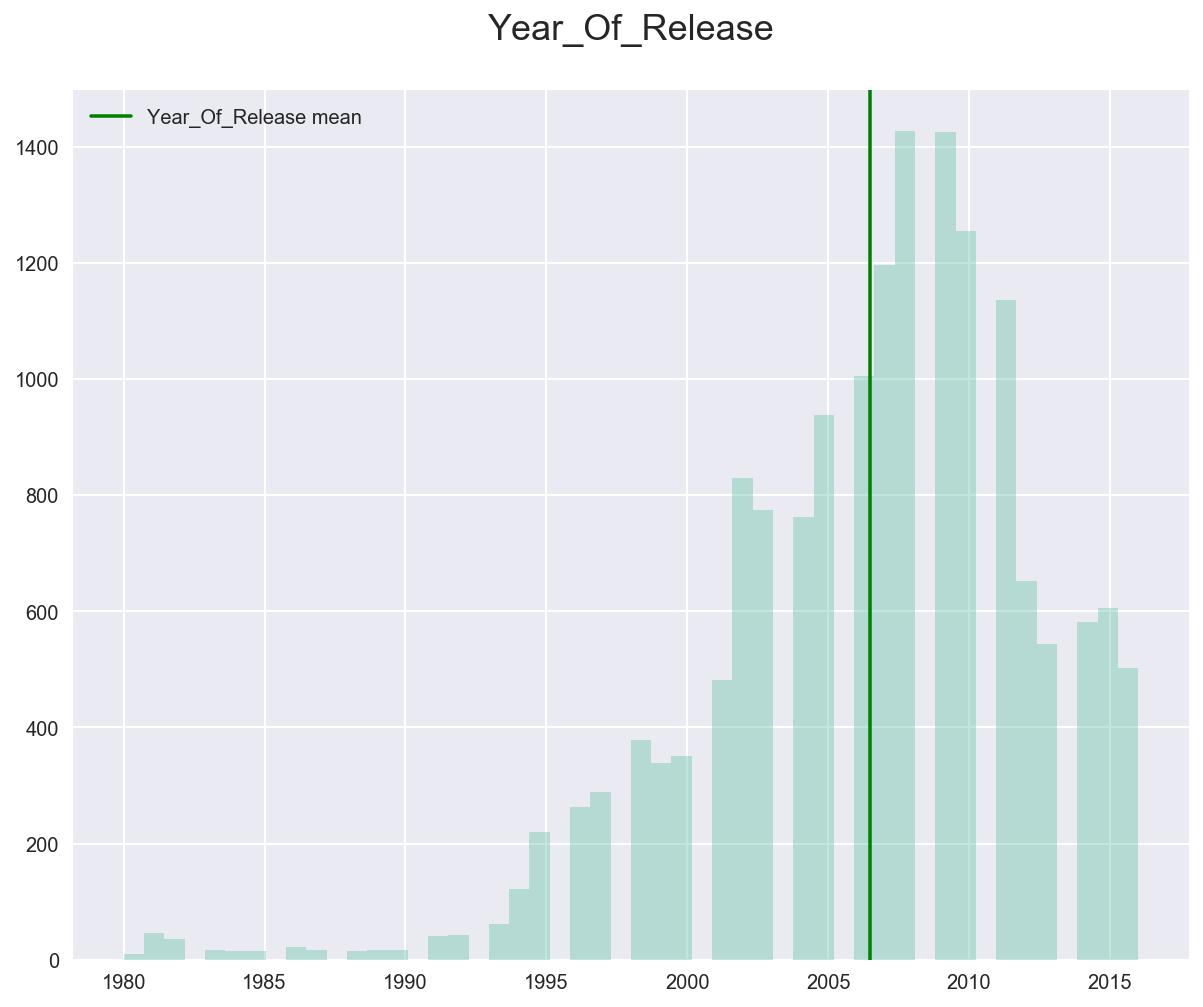

                                  Skew: -0.9747392351772887, Kurtosis: 1.7733887076554242                                   
____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
        count  percentage
2008.0   1427    0.085372
2009.0   1426    0.085313
2010.0   1255    0.075082
2007.0   1197    0.071612
2011.0   1136    0.067963
2006.0   1006    0.060185
2005.0    939    0.056177
2002.0    829    0.049596
2003.0    775    0.046366
2004.0    762    0.045588
2012.0    653    0.039067
2015.0    606    0.036255
2014.0    581    0.034759
2013.0    544    0.032546
2016.0    502    0.030033
2001.0    482    0.028836
1998.0    379    0.022674
2000.0    350    0.020939
1999.0    338    0.020221
1997.0    289    0.017290
NaN       269    0.016093
1996.0    263    0.015734
1995.0    219    0.013102


In [31]:
single_column_eda(df['year_of_release'], bins=None, kde=None, rug=None, figsize=(10,8))

In [32]:
min_max(df['year_of_release'])

Minimum Value: 1980.0, Maximum Value: 2016.0




### Genre

In [33]:
single_column_eda(df['genre'], bins=None, kde=None, rug=None, figsize=(10,8))

                                                   Initial Look at Genre                                                    
____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
              count  percentage
Action         3369    0.201555
Sports         2348    0.140473
Misc           1750    0.104696
Role-Playing   1498    0.089620
Shooter        1323    0.079150
Adventure      1303    0.077954
Racing         1249    0.074723
Platform        888    0.053126
Simulation      873    0.052229
Fighting        849    0.050793
Strategy        683    0.040862
Puzzle          580    0.034699
NaN               2    0.000120


                                               *

In [34]:
df['genre'].describe(include='object')

count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object

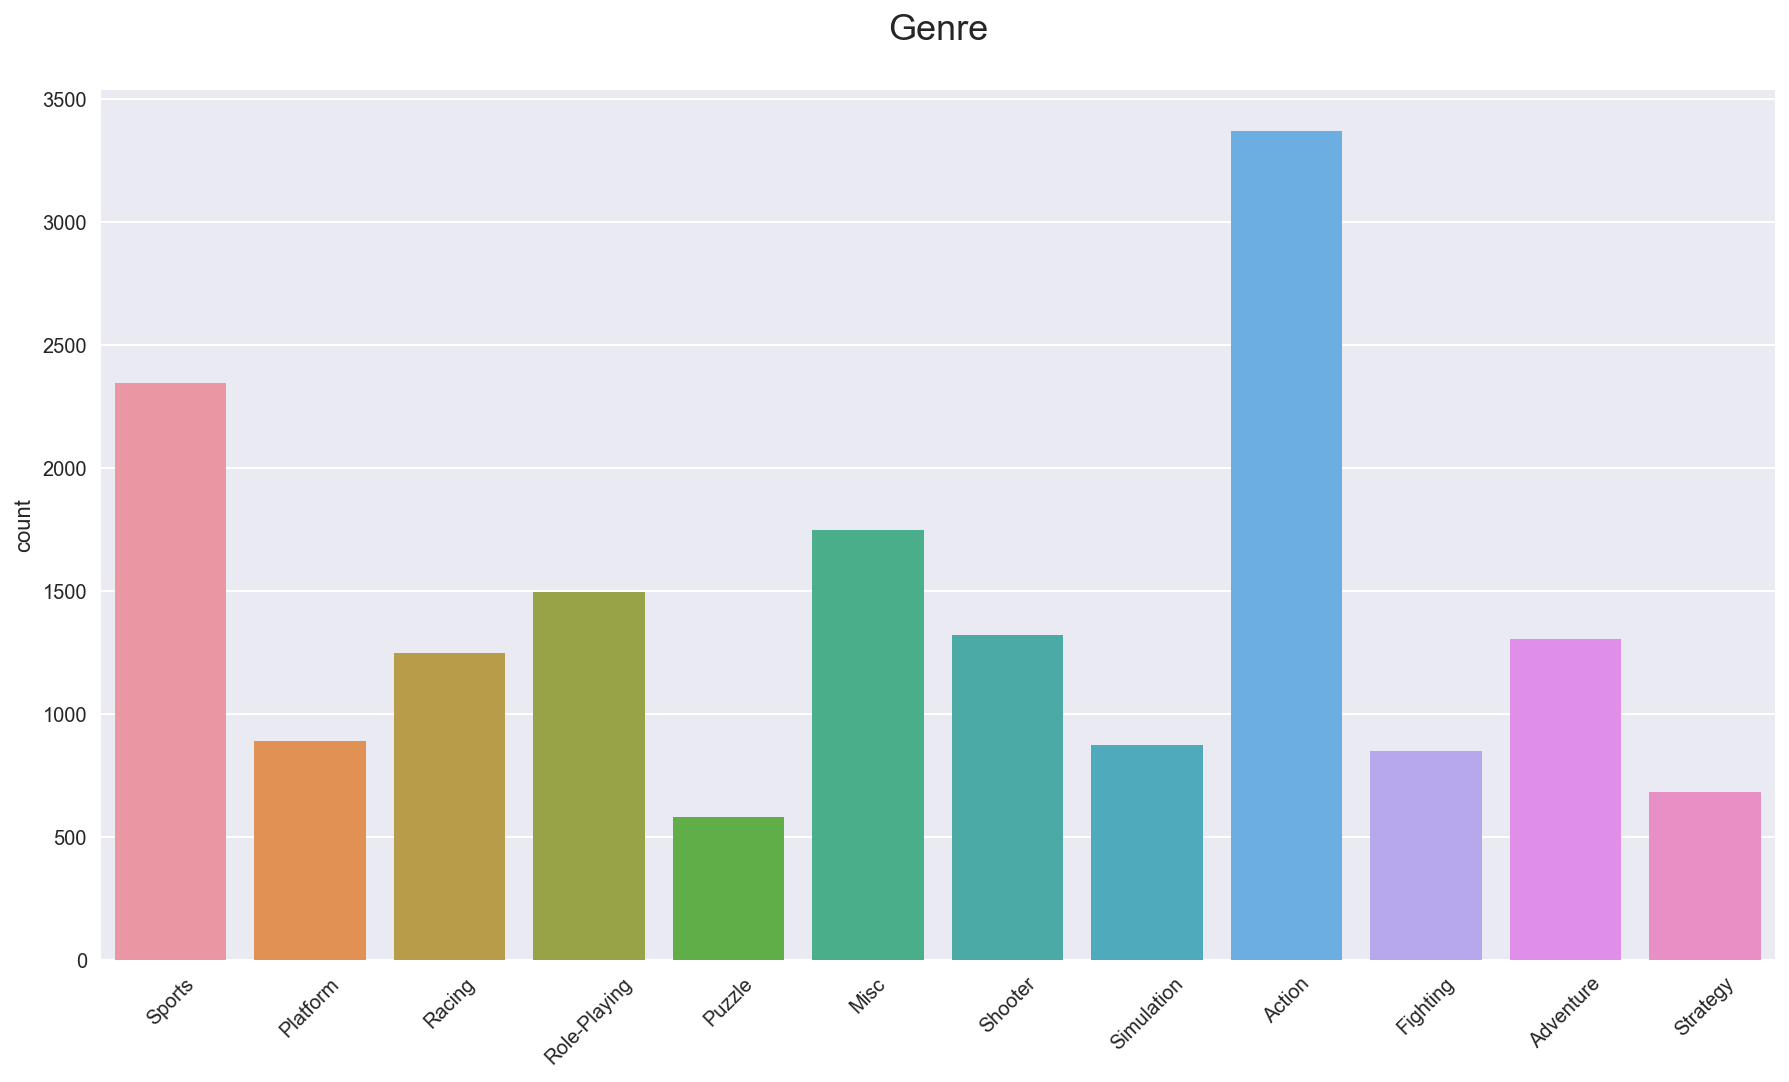

In [35]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(df['genre']).set(xlabel=None)
plt.title(label='Genre' + '\n', fontsize=18)
plt.show()

### North American Sales

                                                  Initial Look at Na_Sales                                                  
____________________________________________________________________________________________________________________________



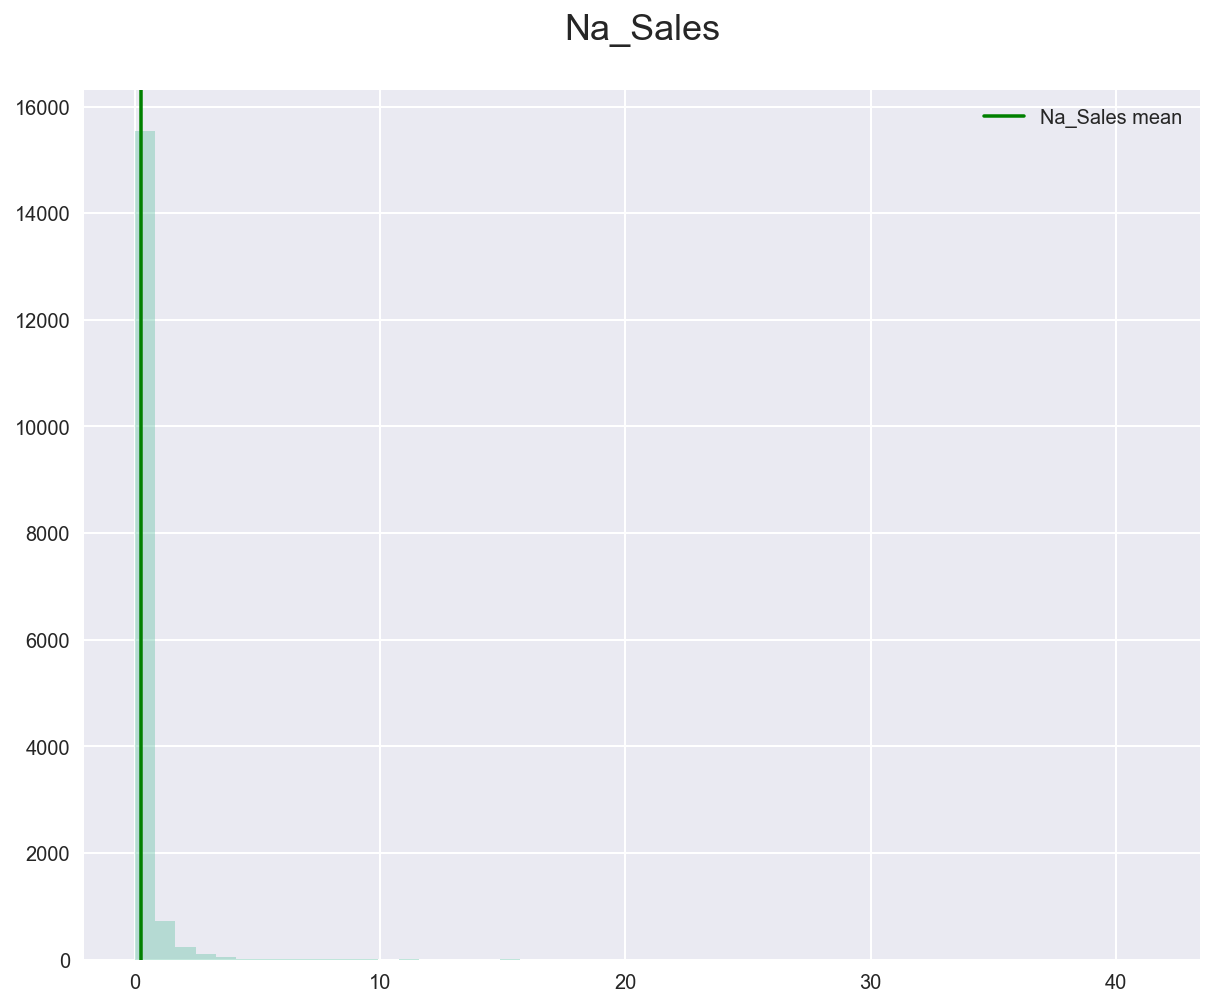

                                   Skew: 18.771907683595717, Kurtosis: 648.5655211520307                                    
____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
      count  percentage
0.00   4508    0.269698
0.02    576    0.034460
0.03    561    0.033563
0.04    549    0.032845
0.01    545    0.032605
...     ...         ...
4.98      1    0.000060
4.21      1    0.000060
6.82      1    0.000060
5.05      1    0.000060
9.00      1    0.000060

[402 rows x 2 columns]


                                               *****Total Missing Values*****                                               

                                                 Total: 0, Percentage: 0.0%                                                 


In [36]:
single_column_eda(df['na_sales'], bins=None, kde=None, rug=None, figsize=(10,8))

In [37]:
min_max(df['na_sales'])

Minimum Value: 0.0, Maximum Value: 41.36




In [38]:
df.iloc[df['na_sales'].idxmax()][['name','platform','year_of_release','na_sales']]

name               Wii Sports
platform                  Wii
year_of_release          2006
na_sales                41.36
Name: 0, dtype: object

In [39]:
df.iloc[df['na_sales'].idxmin()][['name','platform','year_of_release','na_sales']]

name               Monster Hunter Freedom 3
platform                                PSP
year_of_release                        2010
na_sales                                  0
Name: 215, dtype: object

### European Sales

                                                  Initial Look at Eu_Sales                                                  
____________________________________________________________________________________________________________________________



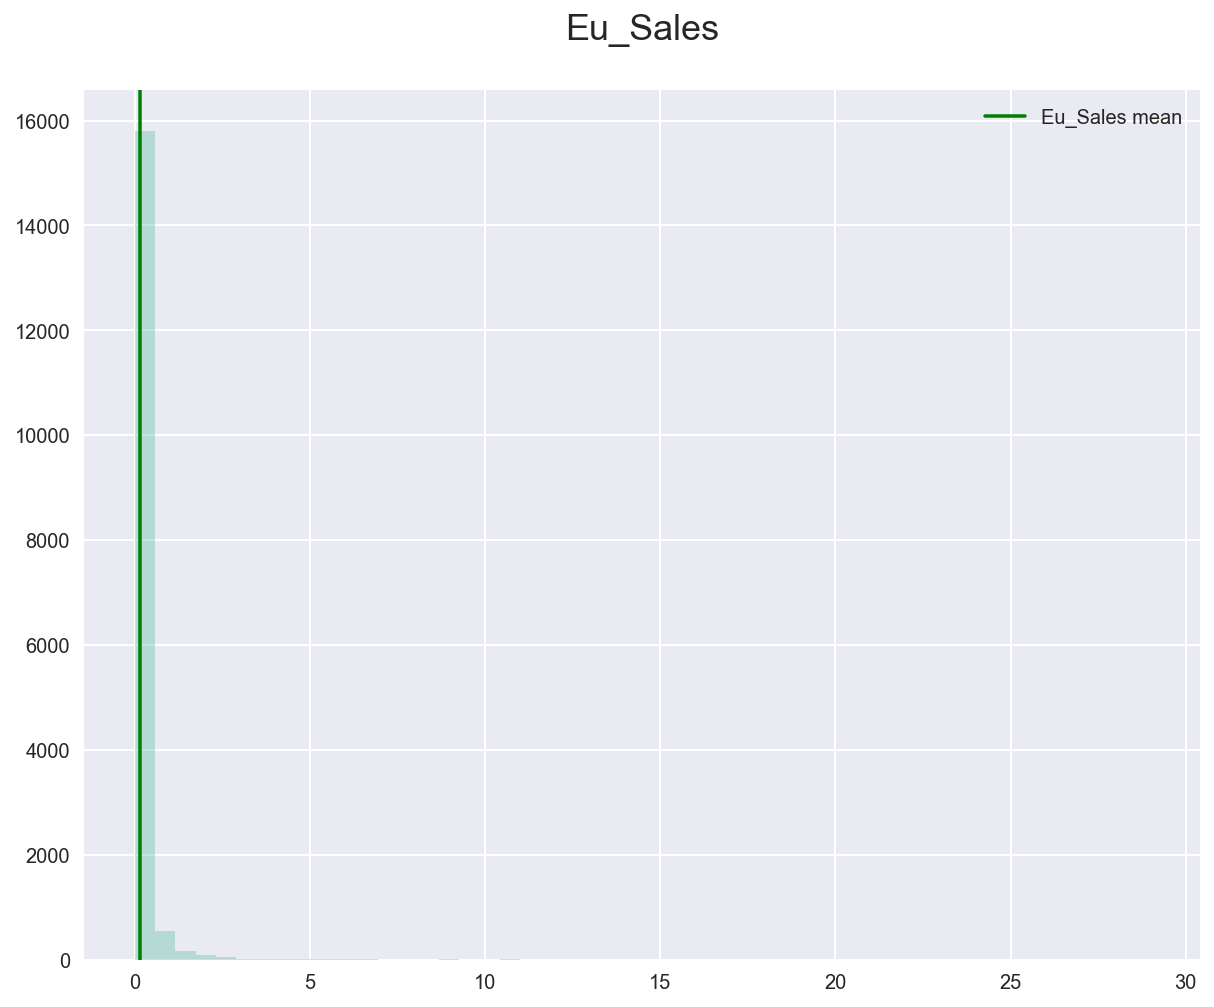

                                   Skew: 18.851044816495726, Kurtosis: 755.5164276926957                                    
____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
      count  percentage
0.00   5870    0.351182
0.01   1494    0.089381
0.02   1308    0.078253
0.03    926    0.055399
0.04    709    0.042417
...     ...         ...
3.59      1    0.000060
4.02      1    0.000060
2.24      1    0.000060
2.27      1    0.000060
3.75      1    0.000060

[307 rows x 2 columns]


                                               *****Total Missing Values*****                                               

                                                 Total: 0, Percentage: 0.0%                                                 


In [40]:
single_column_eda(df['eu_sales'], bins=None, kde=None, rug=None, figsize=(10,8))

In [41]:
min_max(df['eu_sales'])

Minimum Value: 0.0, Maximum Value: 28.96




In [42]:
df.iloc[df['eu_sales'].idxmax()][['name','platform','year_of_release','eu_sales']]

name               Wii Sports
platform                  Wii
year_of_release          2006
eu_sales                28.96
Name: 0, dtype: object

In [43]:
df.iloc[df['eu_sales'].idxmin()][['name','platform','year_of_release','eu_sales']]

name               Final Fantasy XII
platform                         PS2
year_of_release                 2006
eu_sales                           0
Name: 148, dtype: object

### Japanese Sales

                                                  Initial Look at Jp_Sales                                                  
____________________________________________________________________________________________________________________________



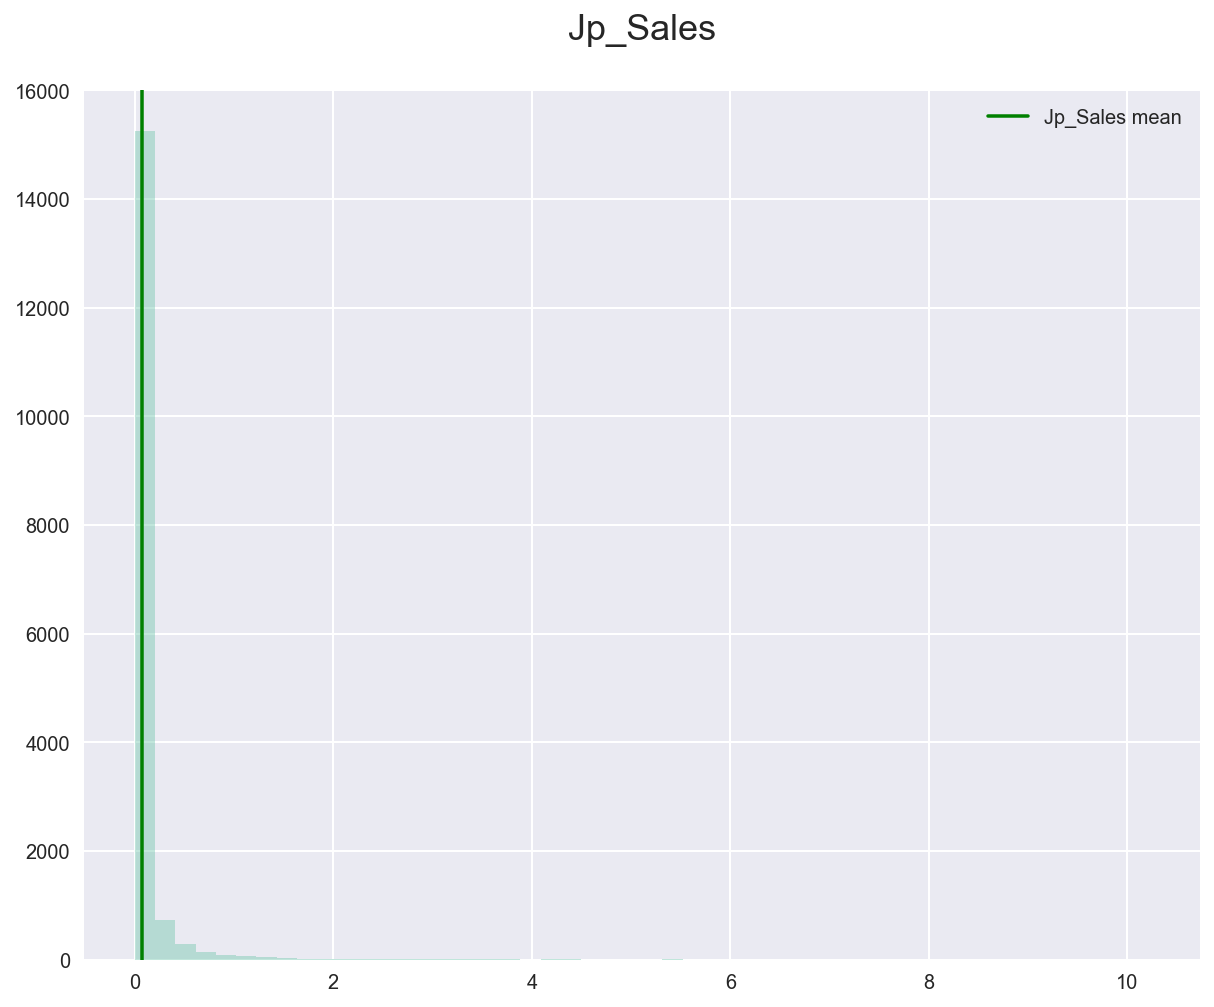

                                   Skew: 11.207460046158808, Kurtosis: 194.2662827932021                                    
____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
      count  percentage
0.00  10514    0.629016
0.02    741    0.044331
0.01    706    0.042238
0.03    546    0.032665
0.04    397    0.023751
...     ...         ...
1.16      1    0.000060
2.12      1    0.000060
7.20      1    0.000060
2.17      1    0.000060
6.50      1    0.000060

[244 rows x 2 columns]


                                               *****Total Missing Values*****                                               

                                                 Total: 0, Percentage: 0.0%                                                 


In [44]:
single_column_eda(df['jp_sales'], bins=None, kde=None, rug=None, figsize=(10,8))

In [45]:
min_max(df['jp_sales'])

Minimum Value: 0.0, Maximum Value: 10.22




In [46]:
df.iloc[df['jp_sales'].idxmax()][['name','platform','year_of_release','jp_sales']]

name               Pokemon Red/Pokemon Blue
platform                                 GB
year_of_release                        1996
jp_sales                              10.22
Name: 4, dtype: object

In [47]:
df.iloc[df['jp_sales'].idxmin()][['name','platform','year_of_release','jp_sales']]

name               Just Dance 3
platform                    Wii
year_of_release            2011
jp_sales                      0
Name: 61, dtype: object

### Other Regions

                                                Initial Look at Other_Sales                                                 
____________________________________________________________________________________________________________________________



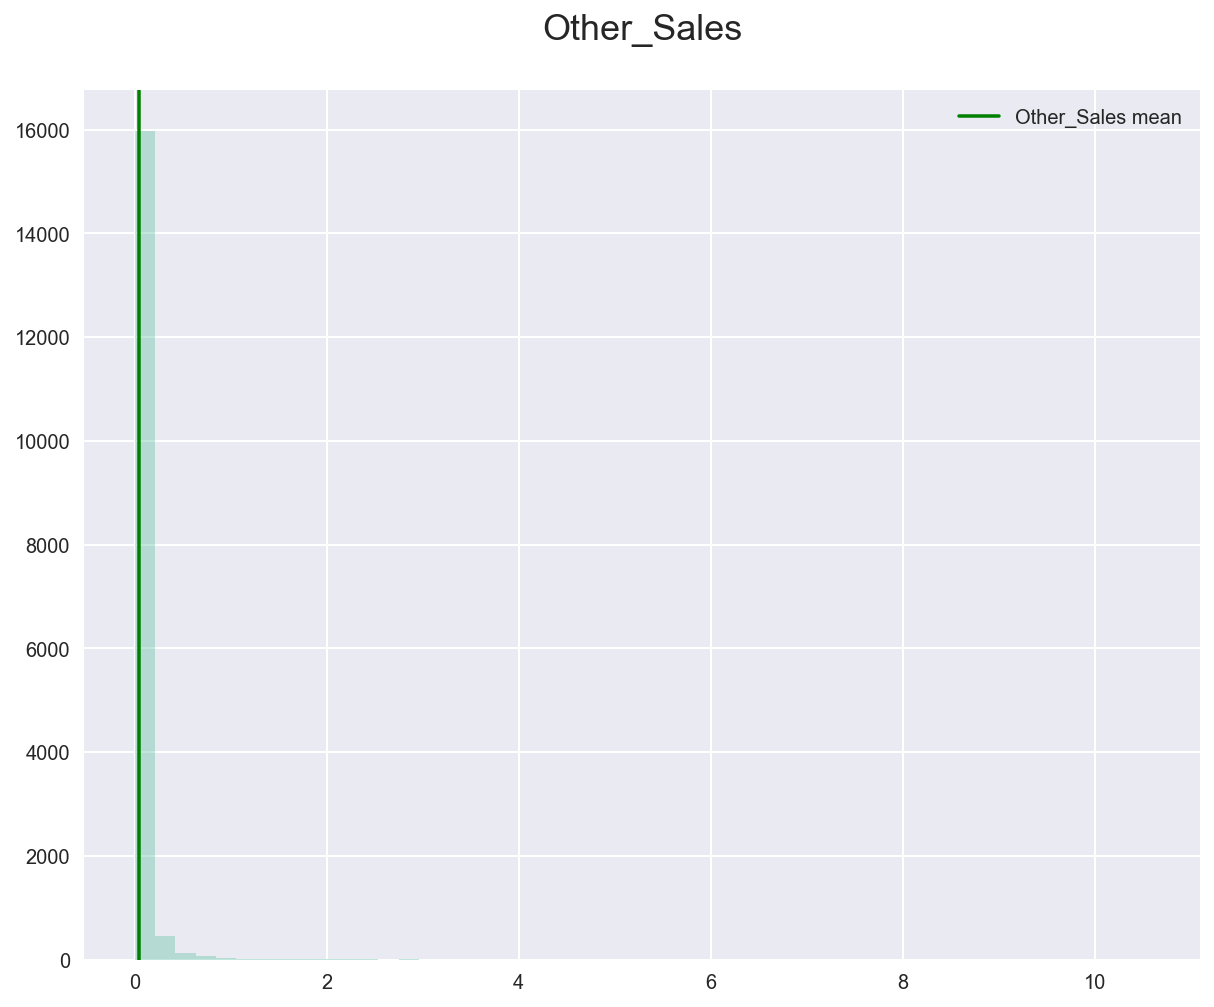

                                   Skew: 24.58365482360184, Kurtosis: 1054.8964035082404                                    
____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
      count  percentage
0.00   6601    0.394915
0.01   3464    0.207239
0.02   1618    0.096799
0.03    926    0.055399
0.04    654    0.039127
...     ...         ...
0.96      1    0.000060
1.93      1    0.000060
0.97      1    0.000060
1.37      1    0.000060
1.06      1    0.000060

[155 rows x 2 columns]


                                               *****Total Missing Values*****                                               

                                                 Total: 0, Percentage: 0.0%                                                 


In [48]:
single_column_eda(df['other_sales'], bins=None, kde=None, rug=None, figsize=(10,8))

In [49]:
min_max(df['other_sales'])

Minimum Value: 0.0, Maximum Value: 10.57




In [50]:
df.iloc[df['other_sales'].idxmax()][['name','platform','year_of_release','other_sales']]

name               Grand Theft Auto: San Andreas
platform                                     PS2
year_of_release                             2004
other_sales                                10.57
Name: 17, dtype: object

In [51]:
df.iloc[df['other_sales'].idxmin()][['name','platform','year_of_release','other_sales']]

name               World of Warcraft
platform                          PC
year_of_release                 2004
other_sales                        0
Name: 138, dtype: object

### Critic Score

                                                Initial Look at Critic_Score                                                
____________________________________________________________________________________________________________________________



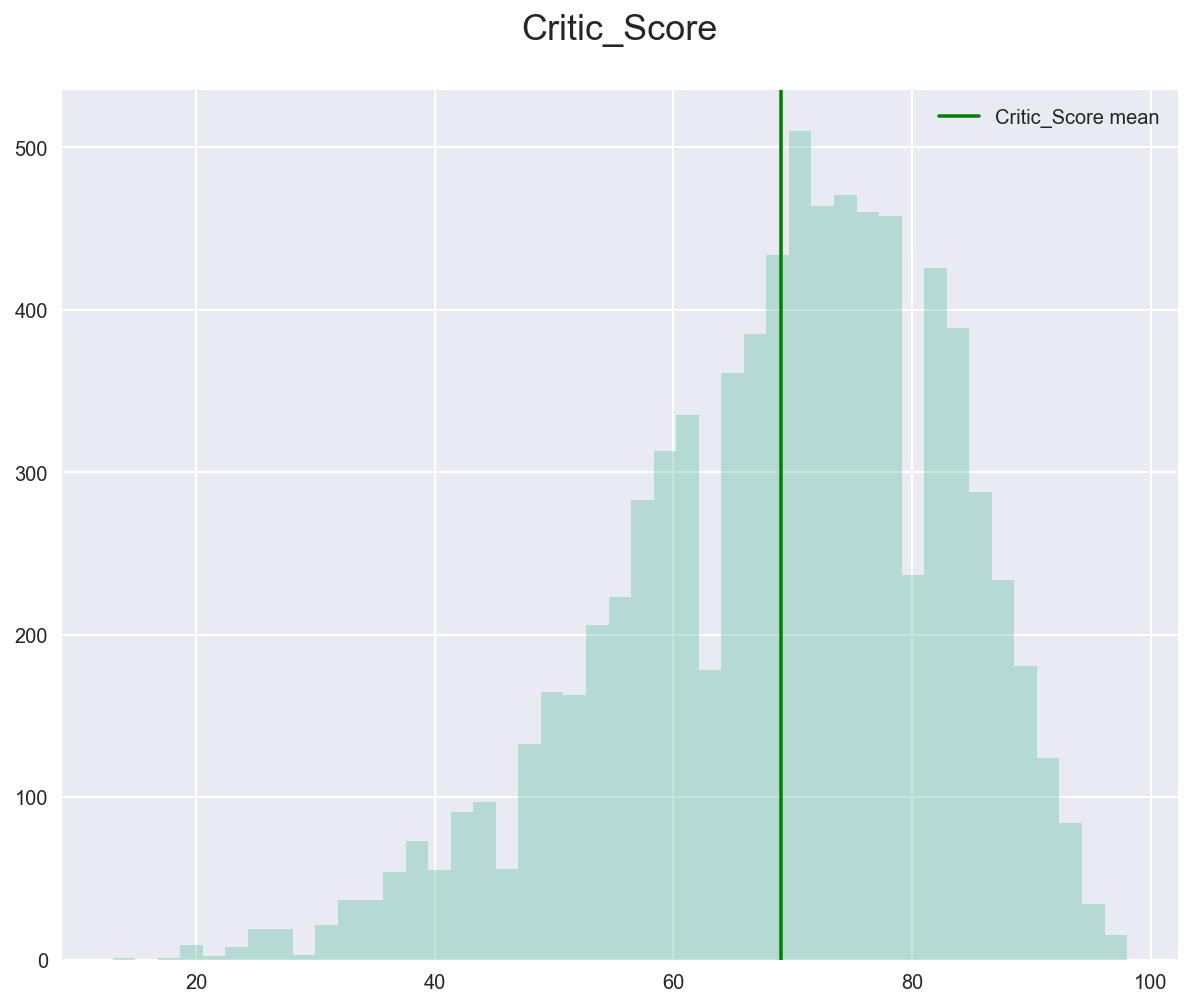

                                  Skew: -0.6136462286413596, Kurtosis: 0.1428510301718191                                   
____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
      count  percentage
NaN    8578    0.513192
70.0    256    0.015316
71.0    254    0.015196
75.0    245    0.014657
78.0    240    0.014358
...     ...         ...
20.0      3    0.000179
13.0      1    0.000060
17.0      1    0.000060
22.0      1    0.000060
21.0      1    0.000060

[83 rows x 2 columns]


                                               *****Total Missing Values*****                                               

                                              Total: 8578, Percentage: 51.32%                                               


In [52]:
single_column_eda(df['critic_score'], bins=None, kde=None, rug=None, figsize=(10,8))

In [53]:
min_max(df['critic_score'])

Minimum Value: 13.0, Maximum Value: 98.0




### User Score

In [54]:
single_column_eda(df['user_score'], bins=None, kde=None, rug=None, figsize=(10,8))

                                                 Initial Look at User_Score                                                 
____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
     count  percentage
NaN   6701    0.400897
tbd   2424    0.145019
7.8    324    0.019384
8      290    0.017350
8.2    282    0.016871
..     ...         ...
9.6      2    0.000120
1.5      2    0.000120
0.3      2    0.000120
9.7      1    0.000060
0        1    0.000060

[97 rows x 2 columns]


                                               *****Total Missing Values*****                                               

                                              Total: 6701, Percentage: 

### Rating

In [55]:
single_column_eda(df['rating'], bins=None, kde=None, rug=None, figsize=(10,8))

                                                   Initial Look at Rating                                                   
____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________

                                                   *****Value Counts*****                                                   
      count  percentage
NaN    6766    0.404786
E      3990    0.238708
T      2961    0.177146
M      1563    0.093509
E10+   1420    0.084954
EC        8    0.000479
K-A       3    0.000179
RP        3    0.000179
AO        1    0.000060


                                               *****Total Missing Values*****                                               

                                              Total: 6766, Percentage: 40.48%                                               


In [56]:
df['rating'].describe(include='object')

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

### Conclusion

Here are some of the initial insights gathered from our first look at the data:

* 📝 Games in the dataset were released between 1980 and 2016

* ⚡ Action is by far the largest genre, followed by Sports
* 💎 The average critic score is aroung 70
* 💰 The top grossing game varies from region to region
* 🎮 Games on the PS2 platform had the most total sales
* 💯 Need For Speed: Most Wanted was the most sold game, in terms of volume


[Back to Table of Contents](#table-of-contents)

## Data Preparation<a name="data-preparation"></a>

<a name="data-preprocessing"></a>
## Data preprocessing

The data will be cleaned by replaceing missing values, identifying and removing duplicates. 

<a name="missing-values"></a>
### Missing Values 

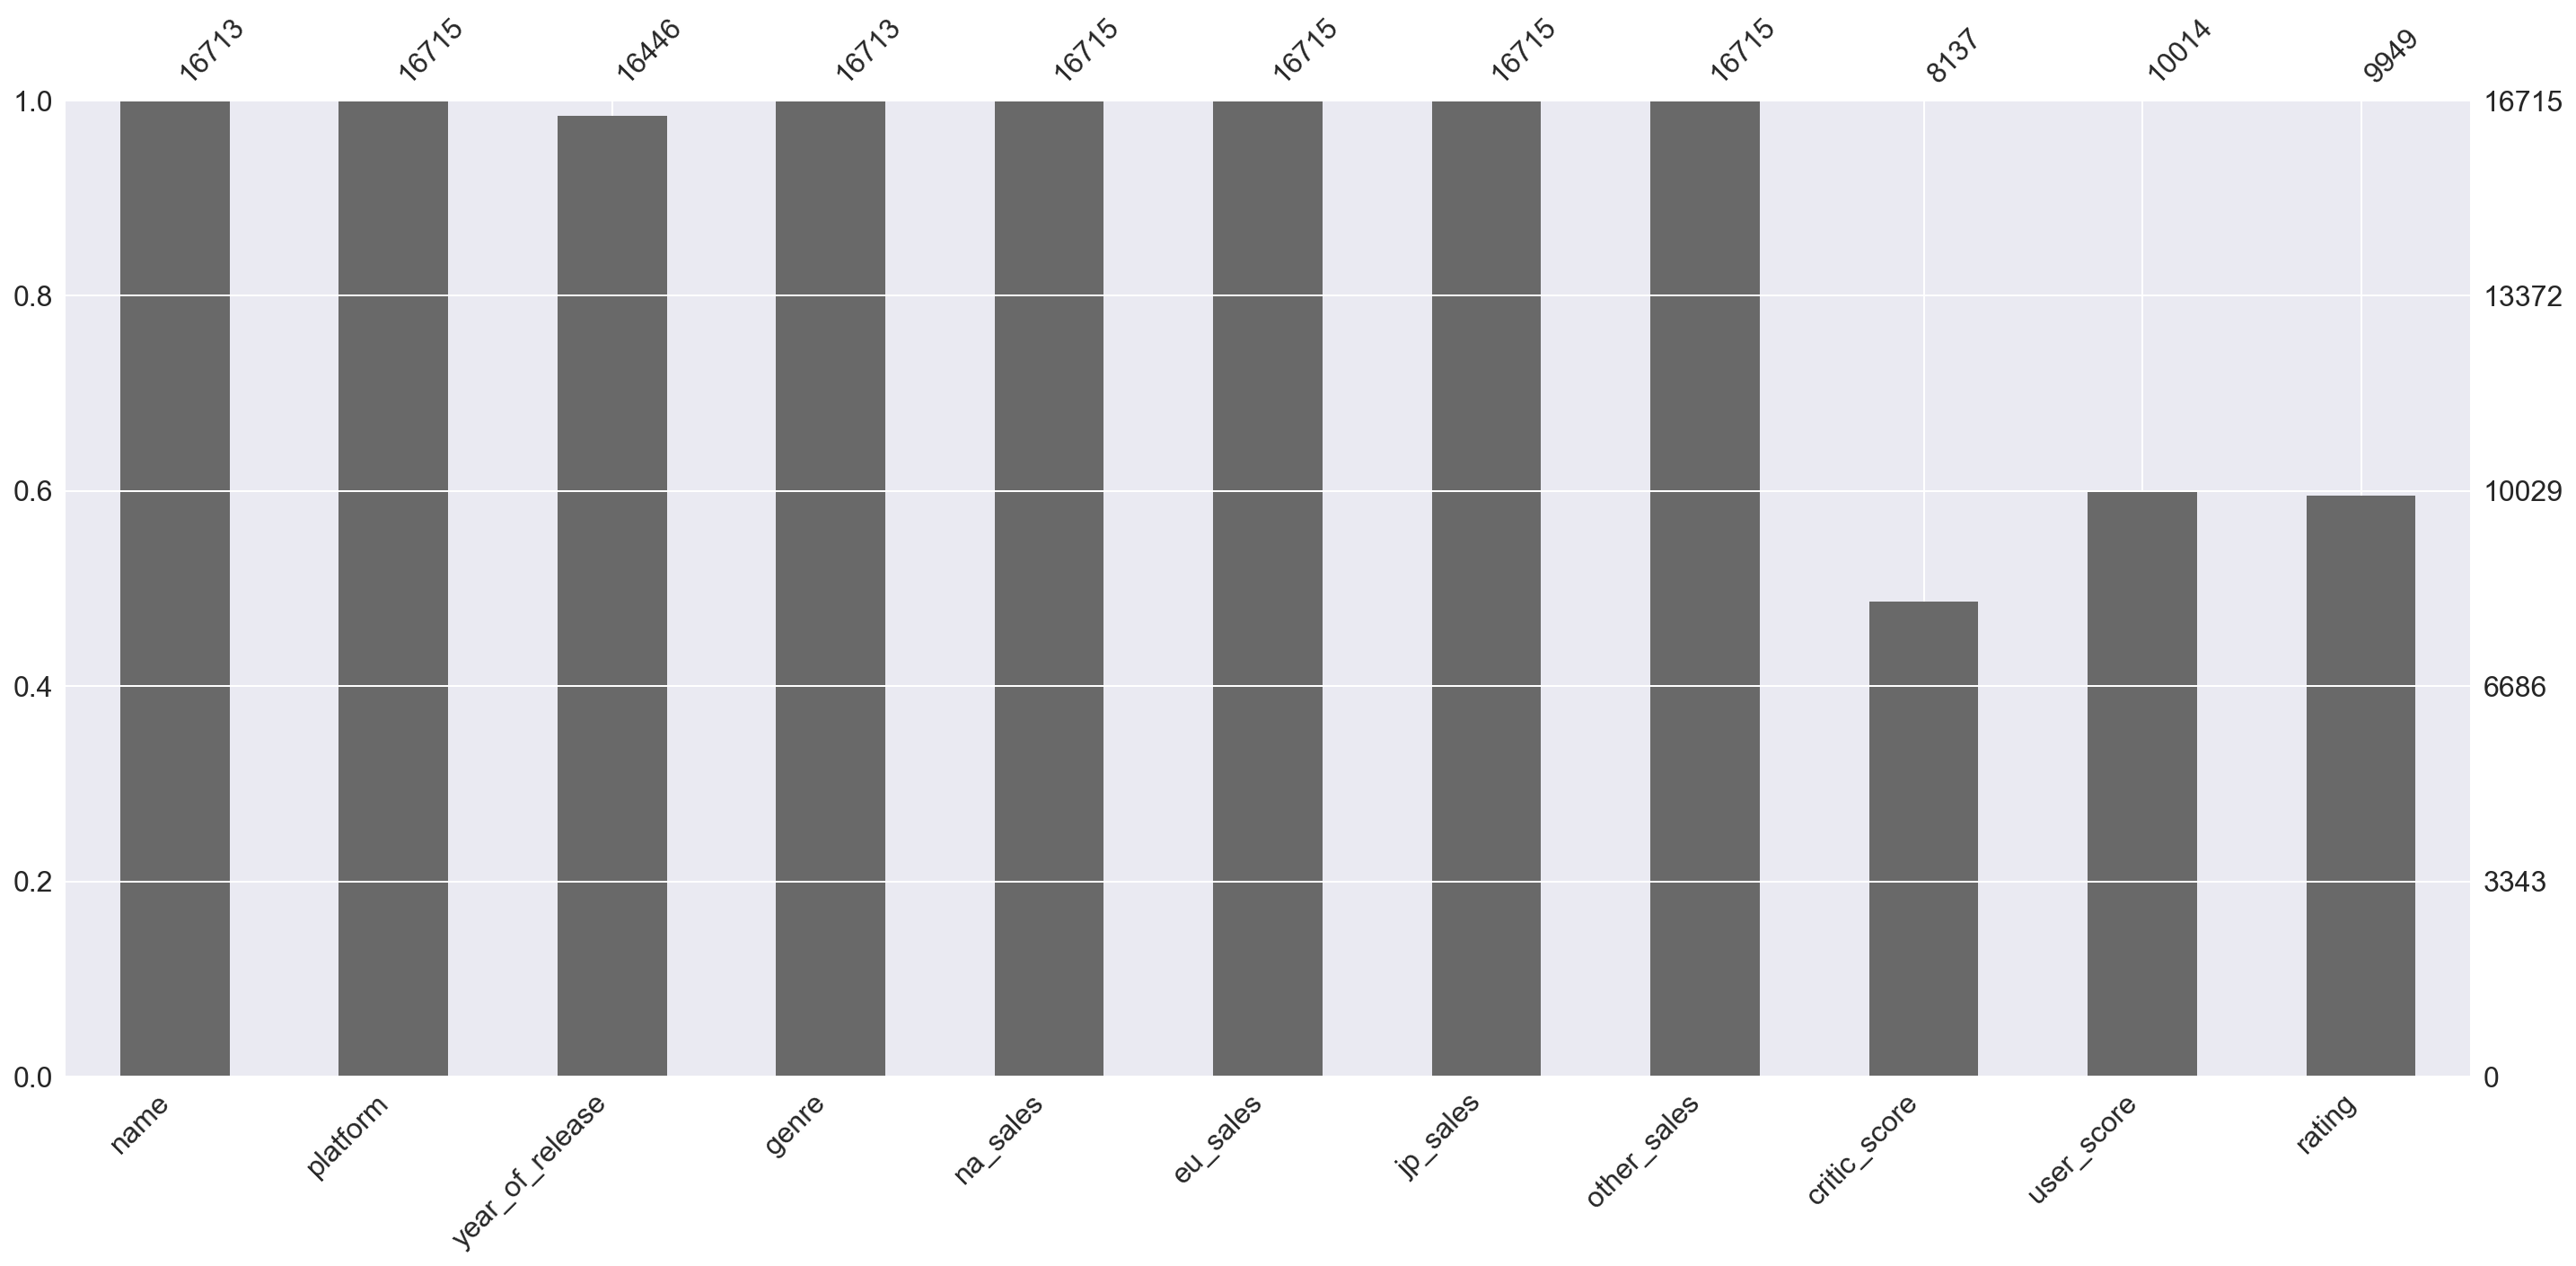

In [57]:
#total missing values by column
missing_viz(df)

In [58]:
#finds all NaNs in the dataframe
find_nas(df)

There are 8837 missing values in the dataframe.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are only two missing values in the name column. They will be dropped.

In [59]:
df.dropna(subset=['name'], inplace=True)
df['name'].isna().any()

False

Because developers generally release a game on all platforms in the same year, the missing values for year_of_release will be filled with the year of the same game on the other platforms, where available. If the year is not able to be filled, we will leave it null. 

In [60]:
not_null_values = df[df['year_of_release'].notnull()]

In [61]:
def fill_year_of_release(row, **kwargs):
    col = 'year_of_release'
    rows = not_null_values[not_null_values['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [62]:
df['year_of_release'] = df.apply(fill_year_of_release, axis=1)
df['year_of_release'].isna().sum()

146

Only 146 years could not be filled using the year from another platform release date. These values will be left null.

There are two missing values in the genre column. They will be dropped.

In [63]:
df.dropna(subset=['genre'], inplace=True)
df['genre'].isna().any()

False

There is no reasonable way to fill the missing critic score values, given the other columns in the dataset. They will be left as is.

In [64]:
#
df[df['user_score'].str.contains('[a-z]',regex=True,na=False)]['user_score'].value_counts()

tbd    2424
Name: user_score, dtype: int64

In [65]:
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'].isna().sum()

9123

In [66]:
df['user_score'].value_counts(dropna=False)

NaN    9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
1.5       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

There is no reasonable way to fill the missing user score values, given the other columns in the dataset. They will be left as is.

The missing values in the rating column will be filled with 'unknown' since there is no way to fill it based on other data. 

In [67]:
df['rating'].fillna('unknown',inplace=True)

In [68]:
df['rating'].value_counts()

unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

Once all NaNs are replaced, let's check to see if there are any remaining missing values. 

In [69]:
#confirming how missing values remain
new_nas = find_nas(df)
new_nas

There are 9744 missing values in the dataframe.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


There are 9744 missing values in the dataset. They will be kept, since there is no way to fill them based on the data we have and we would lose valuable information if they were dropped fromt the dataset.

<a name="duplicates"></a>
### Duplicates

Let's check for duplicate data. 

In [70]:
# finds all duplicated rows in the dataframe
dupes = find_duplicates(df.dropna())
print(dupes.head())

Total number of duplicates: 0
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


<a name="case-sensitive-duplicates"></a>
#### Case Sensitive Duplicates

To check for case sensitive duplicates, the locality_name field is changed to lower case and duplicates checked again. 

In [71]:
df['name'].nunique()

11559

In [72]:
df['name'] = df['name'].str.lower()

In [73]:
df['name'].nunique()

11559

In [74]:
# finds all duplicated rows in the dataframe after case sensitive duplicates corrected
new_dupes = find_duplicates(df)
print(new_dupes.head())

Total number of duplicates: 0
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Since there are no case sensitive duplicates, the name column is converted back to title instead of lower case.

In [75]:
df['name'] = df['name'].str.title()

In [76]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


<a name="data-type-replacement"></a>
### Data Type Replacement

Several variables need to be converted to different data types. This makes the data easier to work with and understanf. It also makes the date better prepared for modeling. 

In [77]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [78]:
float_to_int = ['year_of_release','critic_score']
for i in float_to_int:
    df[i] = change_to_int(df[i])

16713 totals rows changed to integers with 0 errors found.
16713 totals rows changed to integers with 0 errors found.


In [79]:
df['user_score'] = change_to_float(df['user_score'])

16713 totals rows changed to floats with 0 errors found.


In [80]:
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

### Conclusion

* 🆗 All NaNs have been identified and replaced, where possible. Some NaNs remain in the dataset.
* ✔️ Data types have been converted. 

[Back to Table of Contents](#table-of-contents)

<a name="feature-engineering"></a>
## Feature Engineering

We will transform raw data to better represent the nature of the data. From the data we have, we can create new features that are more insightful and also choose the features we need to use in order to produce better models. 

### Feature Generation <a name="feature-generation"></a>

All the sales columns will be totaled to yield total sales. 

In [81]:
df['total_sales'] = df.loc[:,df.columns.str.contains('sales')].sum(axis=1)

In [82]:
sales_by_year = df.groupby(['year_of_release'])['total_sales'].agg('mean')

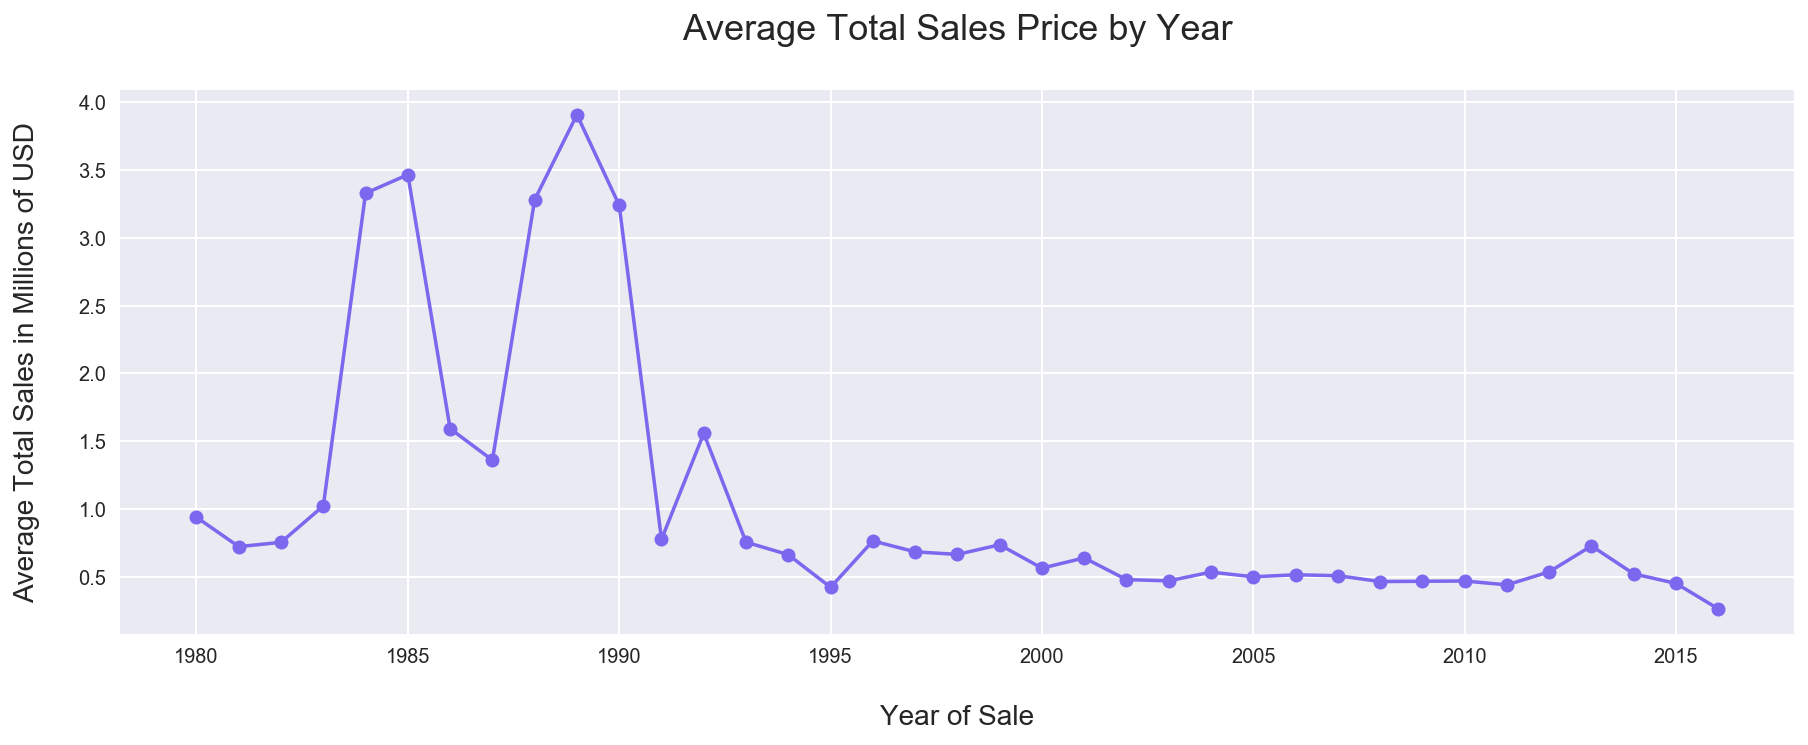

In [83]:
plt.figure(figsize=(15,5))
sales_by_year.plot(color='#7B68EE', marker='o')
plt.title('Average Total Sales Price by Year\n', fontsize = 18)
plt.xlabel('\nYear of Sale', fontsize = 14)
plt.ylabel('Average Total Sales in Millions of USD\n', fontsize = 14)
plt.show()

Here we can see that average total sales has been fairly steady since 1993. 

<Figure size 1080x360 with 0 Axes>

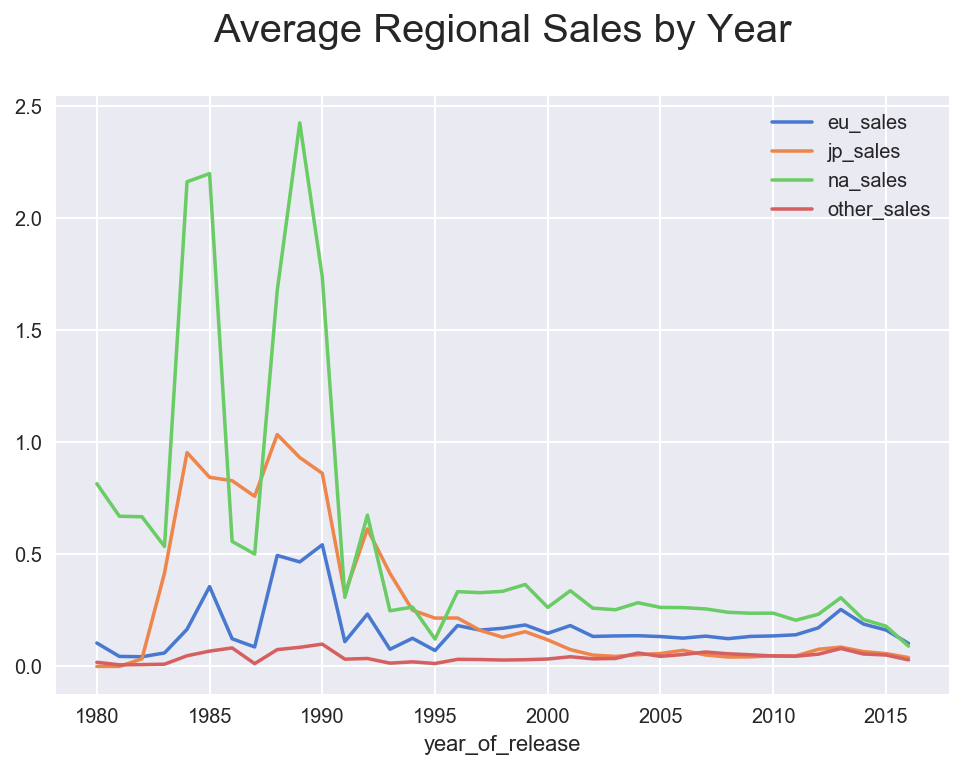

In [84]:
plt.figure(figsize = (15, 5))
df.pivot_table(index = 'year_of_release', values = (
    'na_sales', 'eu_sales', 'jp_sales','other_sales'), aggfunc = 'mean').plot(color=sns.color_palette("muted"))
plt.title('Average Regional Sales by Year\n',fontsize=20)
plt.show()

As we look at average regional sales, we see a downturn around 1993 globally with North American sales averaging highest every year. 

In [85]:
def top_region(row):
    japan = row['jp_sales']
    europe = row['eu_sales']
    north_america = row['na_sales']
    other = row['other_sales']
    if north_america > japan and north_america > europe and north_america > other:
        return 'North America'
    if europe > north_america and europe > japan and europe > other:
        return 'Europe'
    if japan > north_america and japan > europe and japan > other:
        return 'Japan'
    if other > japan and other > europe and other > north_america:
        return 'Other'
    return 'Multiple Regions'

In [86]:
df['top_region'] = df.apply(top_region, axis=1)

In [87]:
df['top_region'].value_counts()

North America       9865
Japan               4076
Europe              2322
Multiple Regions     374
Other                 76
Name: top_region, dtype: int64

In [88]:
#rearranging column order for ease of understanding
df = df[['name','year_of_release','platform','genre','na_sales','eu_sales','jp_sales',
         'other_sales','total_sales','top_region','critic_score','user_score','rating']]

In [89]:
df.head()

,name,year_of_release,platform,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,top_region,critic_score,user_score,rating
0,Wii Sports,2006,Wii,Sports,41.36,28.96,3.77,8.45,82.54,North America,76,8.0,E
1,Super Mario Bros.,1985,NES,Platform,29.08,3.58,6.81,0.77,40.24,North America,<NA>,NaN,unknown
2,Mario Kart Wii,2008,Wii,Racing,15.68,12.76,3.79,3.29,35.52,North America,82,8.3,E
3,Wii Sports Resort,2009,Wii,Sports,15.61,10.93,3.28,2.95,32.77,North America,80,8.0,E
4,Pokemon Red/Pokemon Blue,1996,GB,Role-Playing,11.27,8.89,10.22,1.00,31.38,North America,<NA>,NaN,unknown


In [90]:
#5-point stats for dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16567.0,2006.368262,5.932659,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16713.0,0.263302,0.813565,0.0,0.00,0.08,0.24,41.36
eu_sales,16713.0,0.145045,0.503359,0.0,0.00,0.02,0.11,28.96
jp_sales,16713.0,0.077625,0.308871,0.0,0.00,0.00,0.04,10.22
other_sales,16713.0,0.047343,0.186742,0.0,0.00,0.01,0.03,10.57
total_sales,16713.0,0.533315,1.548282,0.0,0.06,0.17,0.47,82.54
critic_score,8137.0,68.967679,13.938165,13.0,60.00,71.00,79.00,98.00
user_score,7590.0,7.125046,1.500006,0.0,6.40,7.50,8.20,9.70


### Conclusion

We created a total_sales column totalling na_sales, eu_sales, jp_sales and other_sales.

* 💰 Average total sales is around 530,000 USD
* 💎 The average total sales fell globally around 1993 and has not reached its pre-1993 heights
* 💎 North American total sales are higest on average of all regions. 

[Back to Table of Contents](#table-of-contents)

<a name="data-analysis"></a>
## Data Analysis

## Task 1<a name="task-1"></a>

### Look at how many games were released in different years. Is the data for every period significant?

Let's total the number of games released every year. 

In [91]:
years = df.groupby('year_of_release')['name'].agg('count').reset_index()
years

,year_of_release,name
0,1980,14
1,1981,44
2,1982,37
3,1983,19
4,1984,16
5,1985,17
6,1986,24
7,1987,16
8,1988,14
9,1989,21


The number of games released every year increased from 1994 to 2011 where it again decreased dramatically. The most games released in one year was 1433 in 2008. 

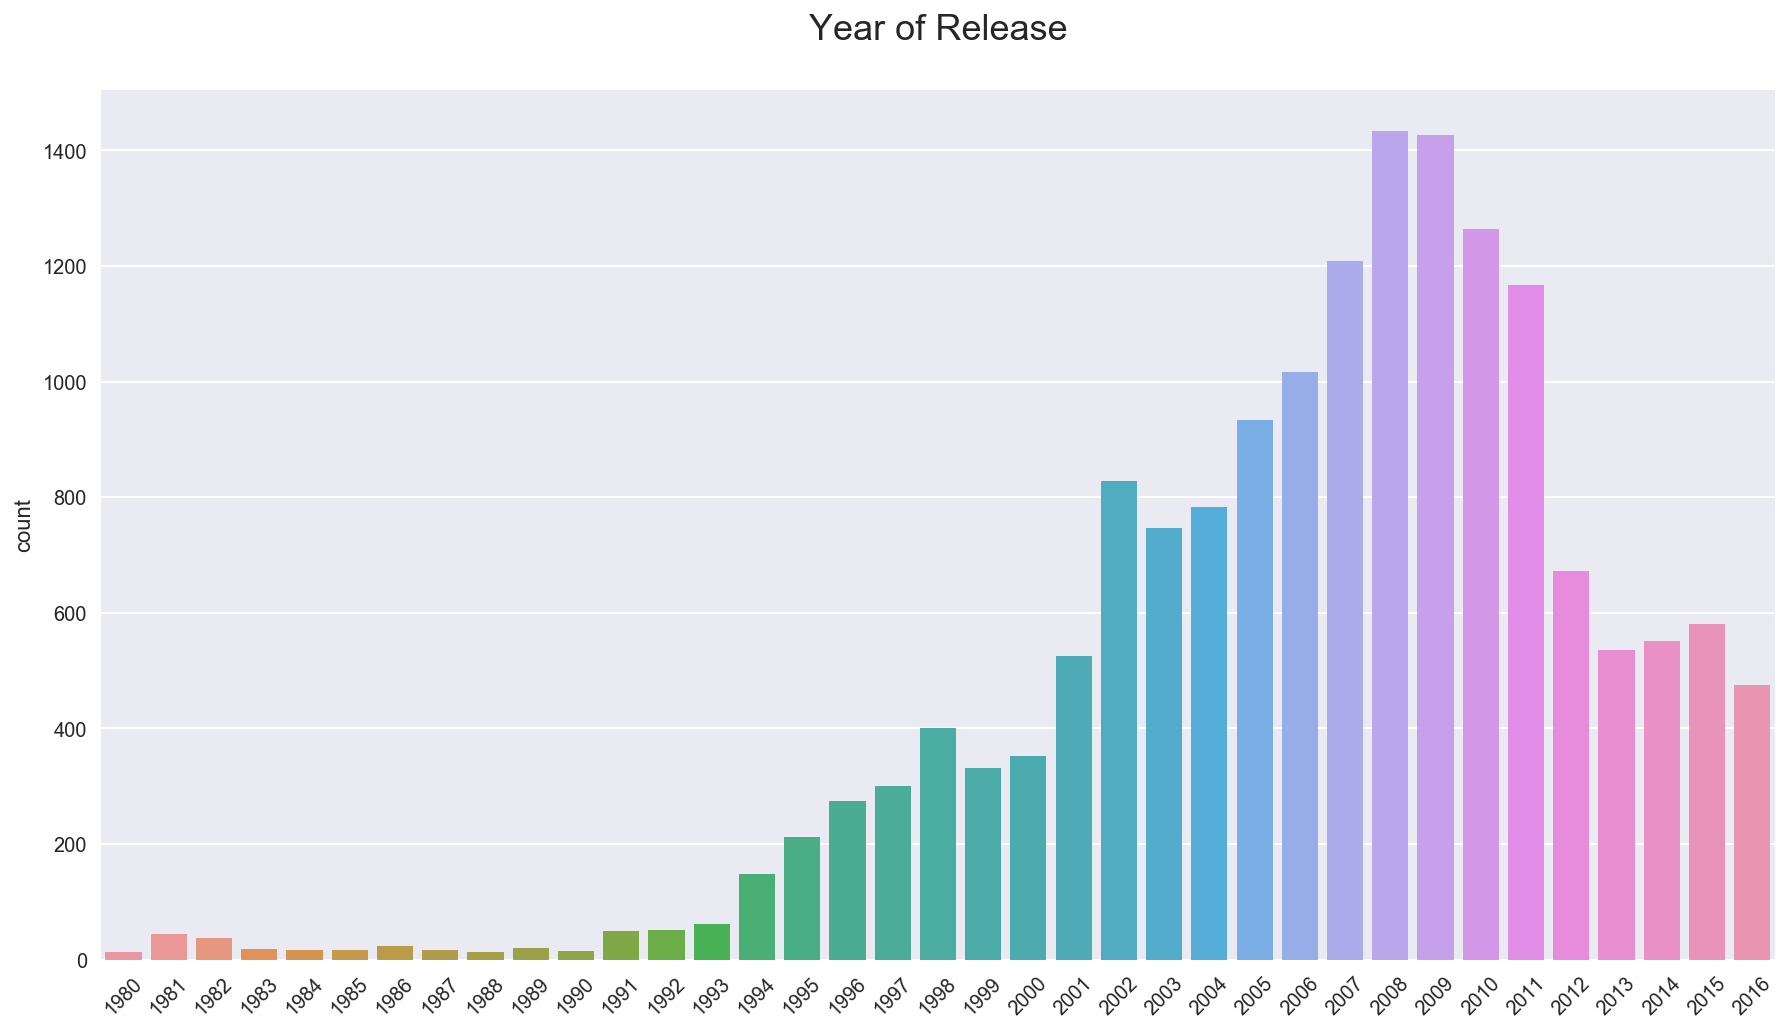

In [92]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(df['year_of_release'].dropna().astype('int64')).set(xlabel=None)
plt.title(label='Year of Release' + '\n', fontsize=18)
plt.show()

### Conclusion

Key insights about year_of_release:
* 💎 Before 1994 less than 100 games were released per year
* 💎 After 1994 growth exploded until 2010, where it leveled off dramatically
* 💎 In 2008, 1433 were released

[Back to Table of Contents](#table-of-contents)

## Task 2<a name="task-2"></a>
### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

We will find out which platforms have the highest total sales over all years.

In [93]:
platforms = df.groupby('platform')['total_sales'].agg(['sum','mean']).reset_index().sort_values(by='sum', ascending=False)
platforms.head(10)

,platform,sum,mean
16,PS2,1255.77,0.581106
28,X360,971.42,0.769746
17,PS3,939.65,0.705973
26,Wii,907.51,0.687508
4,DS,806.12,0.374765
15,PS,730.86,0.610576
6,GBA,317.85,0.386679
18,PS4,314.14,0.801378
19,PSP,294.05,0.243218
13,PC,259.52,0.266448


In [94]:
top_10_platforms = list(platforms['platform'].head(10))

The top 10 platforms by total sales are 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'. There is a large drop in total sales between 'PS' and 'GBA', so we will take the top 6 platforms and look deeper.

In [95]:
top_6_platforms = platforms.head(6)
top_6_platforms

,platform,sum,mean
16,PS2,1255.77,0.581106
28,X360,971.42,0.769746
17,PS3,939.65,0.705973
26,Wii,907.51,0.687508
4,DS,806.12,0.374765
15,PS,730.86,0.610576


In [96]:
top_plat_list = list(top_6_platforms['platform'])

Let's look at how total sales varies by year for each platform.

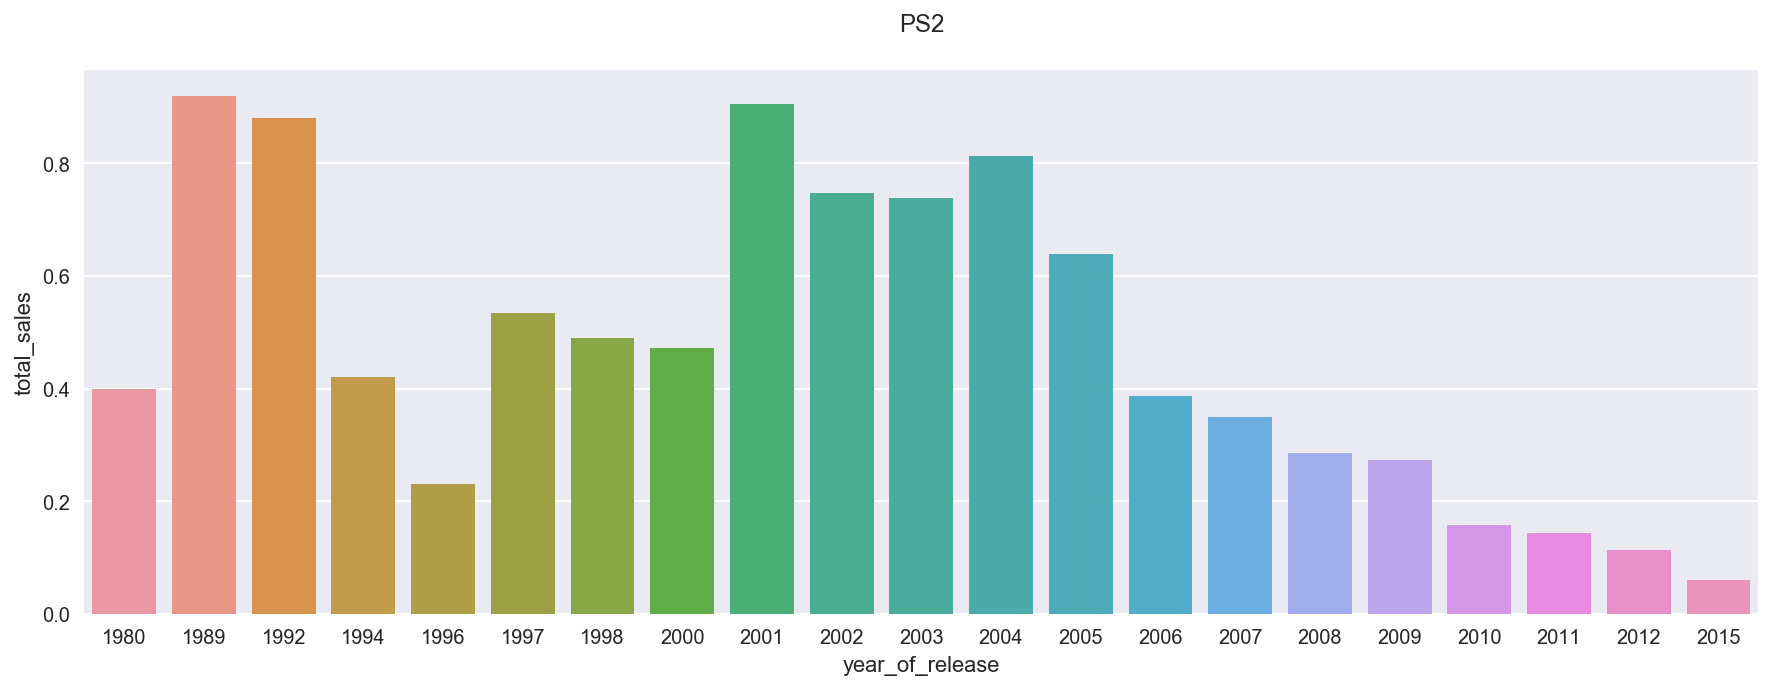

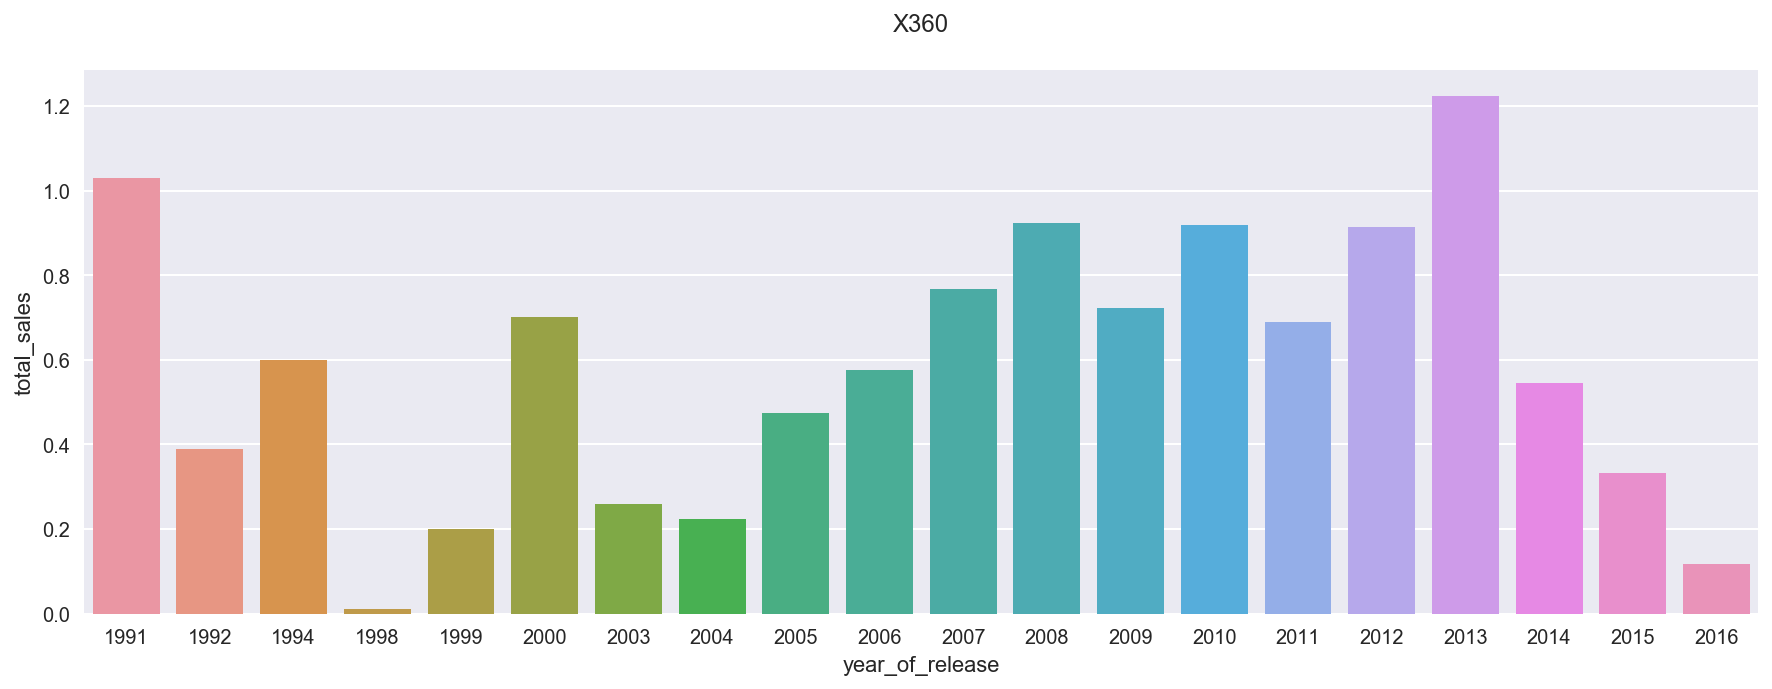

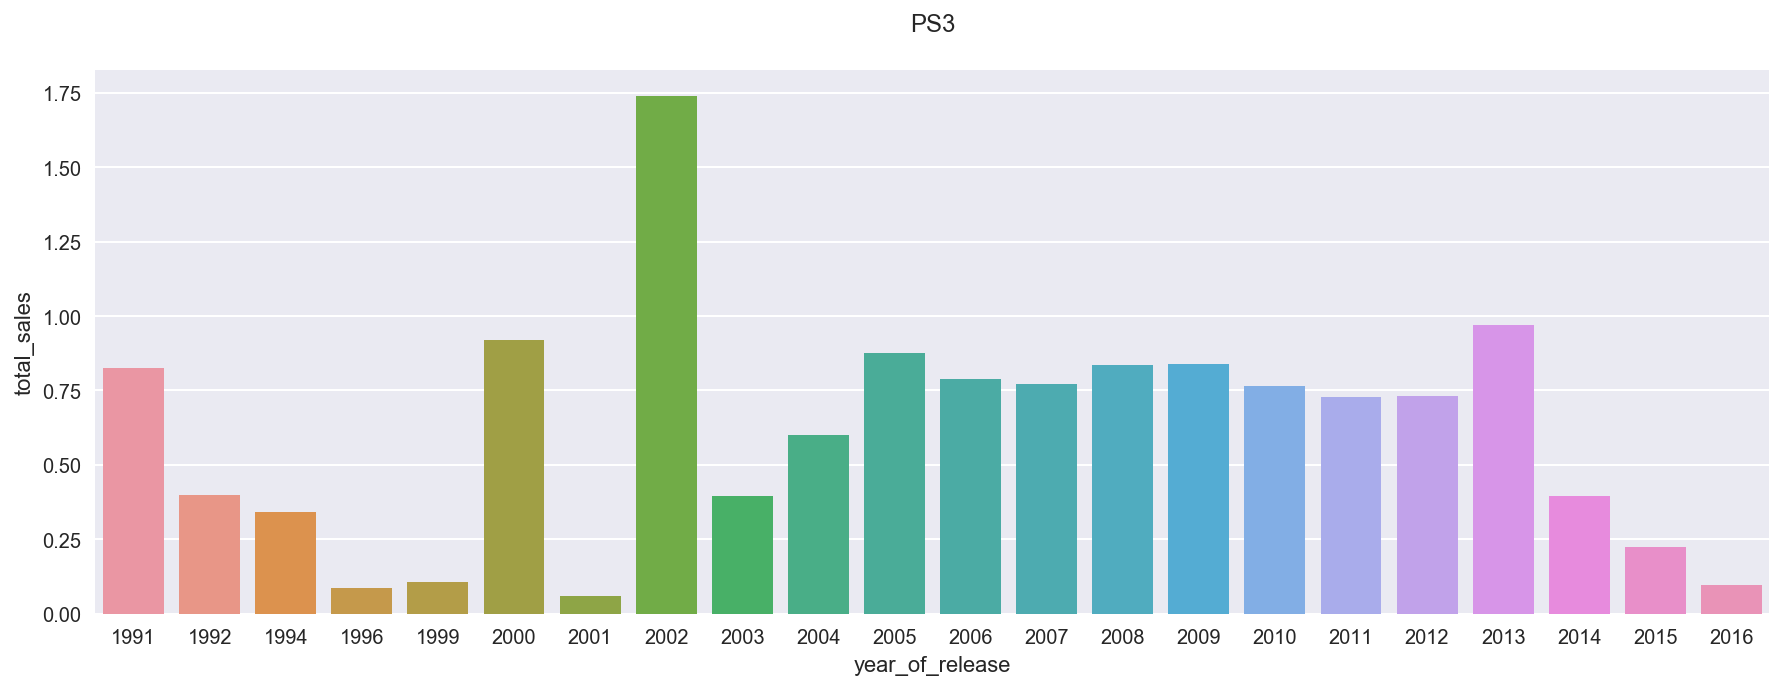

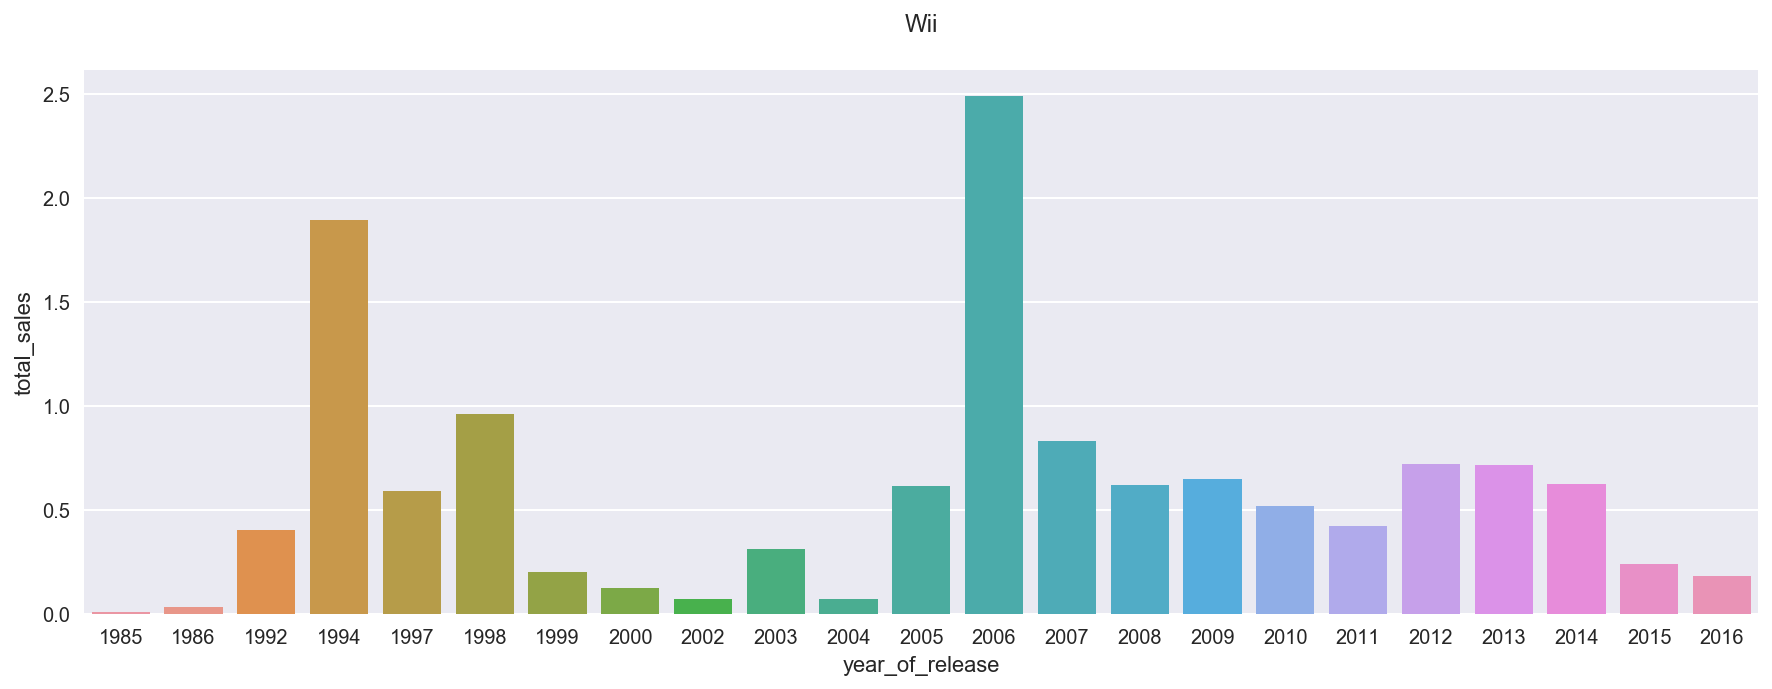

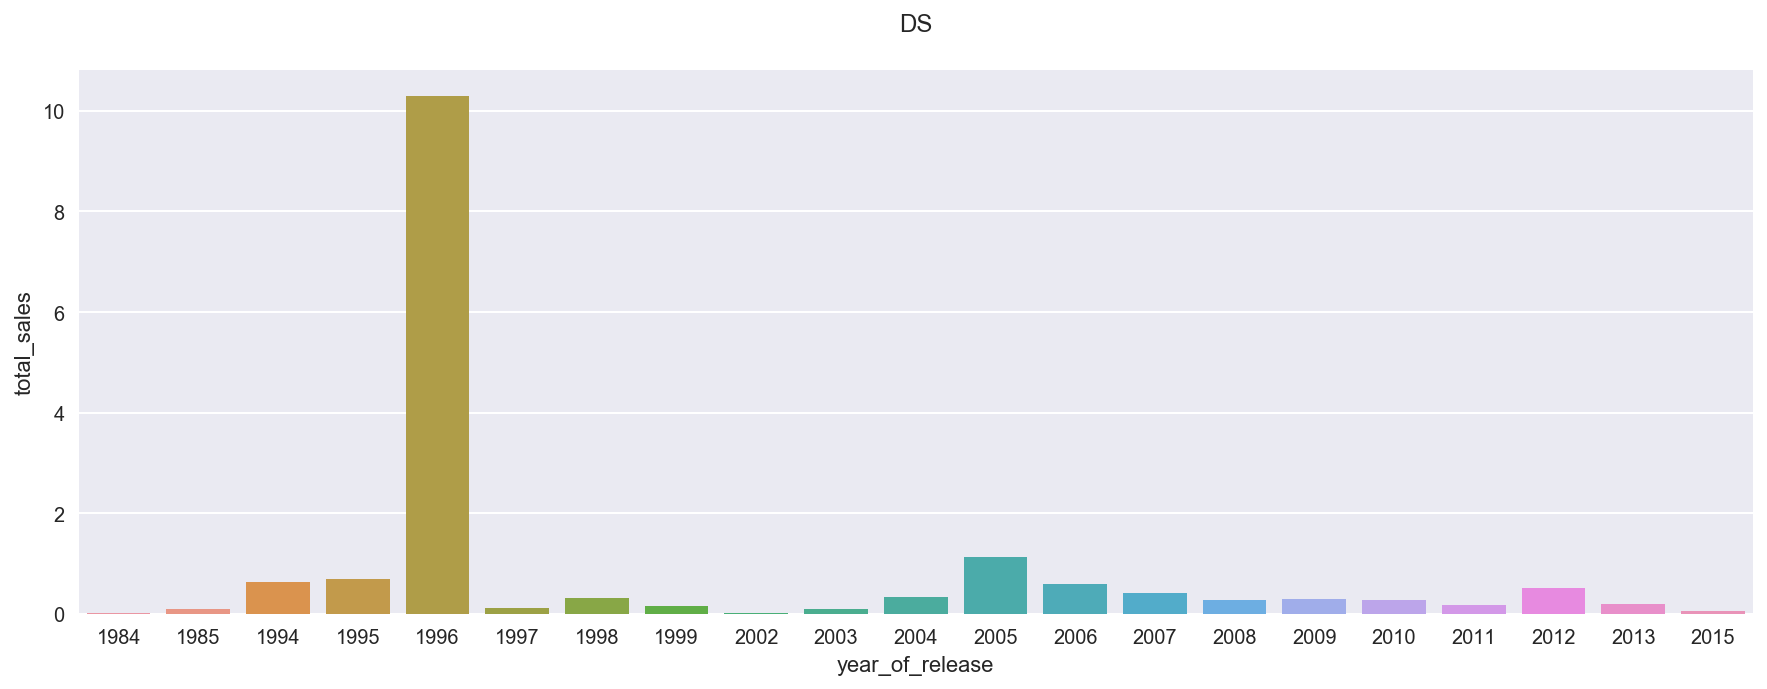

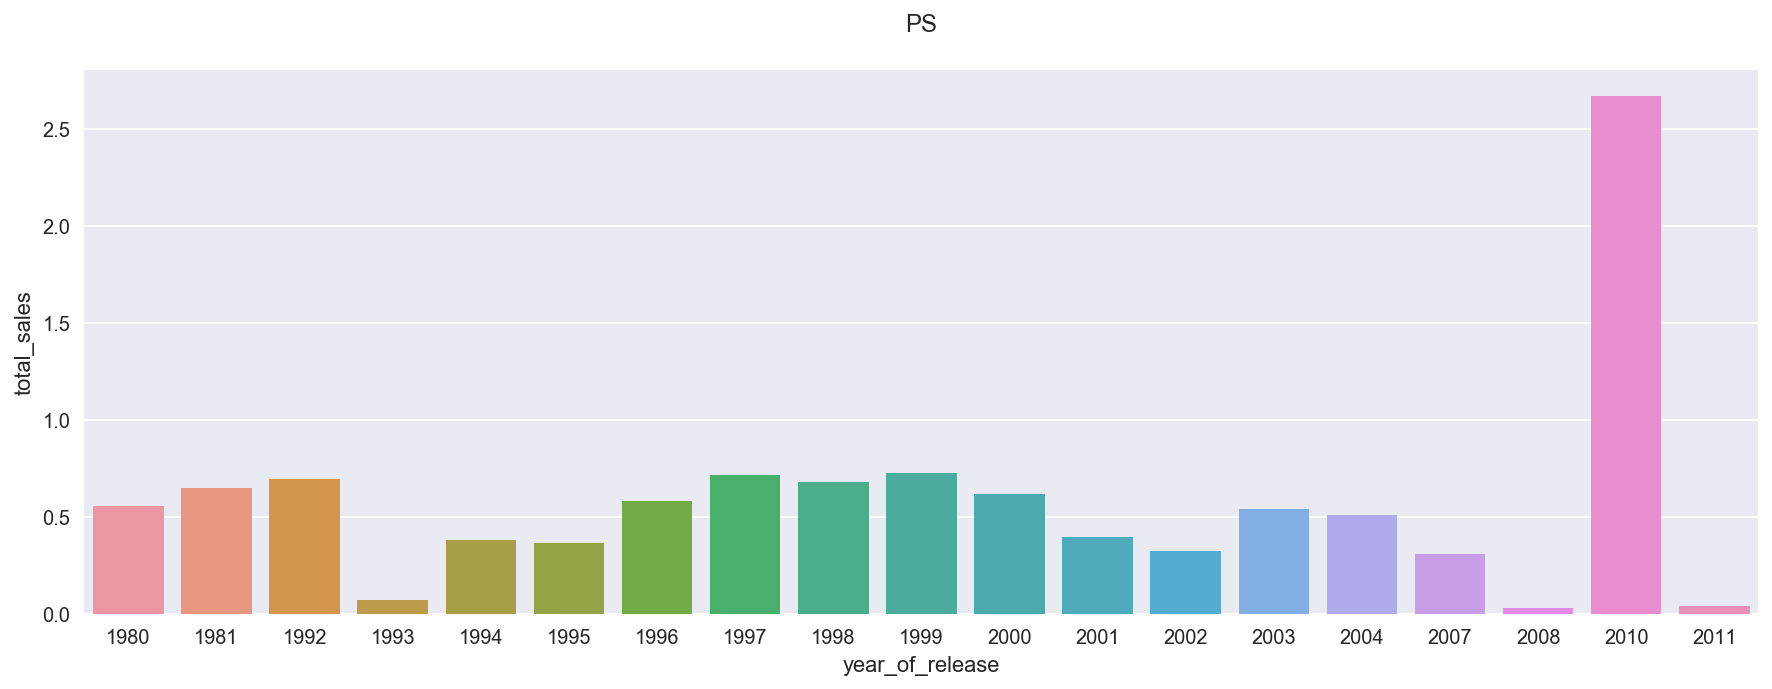

In [97]:
for feature in top_plat_list:
    plt.figure(figsize=(15,5))
    sns.barplot(x="year_of_release", y="total_sales", data=df[df['platform'] == feature].sort_values(by='year_of_release'),
               ci=None)
    plt.title(feature + '\n')
    plt.show()

### Conclusion

Key insights about total sales by platform:
* 💎 The peak lifespan for a console is 5 to 6 years 
* 💎 DS, GBA, and PC have seen low sales since the mid-90s
* 💎 PS2 has been replaced by PS3 and then PS4, possibly leading to ints decline in sales

* 💰 Top 5 Platforms by totals sales:

| Platform        | Total Sales |
|-----------------|-------------|
| PS2             |1255.77      |
| X360     | 971.42  |
| PS3    | 939.65    |
| Wii    | 907.51    |
| DS    | 806.12   |

[Back to Table of Contents](#table-of-contents)

## Task 3<a name="task-3"></a>
### Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017.

The number of sales dropped drastically after 2011 and levels have been similar since. I will use the years 2012 forward for further analysis. The data for 2016 is not yet complete so this year will not be included. 

In [98]:
recent_years = df[(df['year_of_release'] < 2016) & (df['year_of_release'] >= 2012) & (df['year_of_release'].notnull())]
recent_years.head()

,name,year_of_release,platform,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,top_region,critic_score,user_score,rating
16,Grand Theft Auto V,2013,PS3,Action,7.02,9.09,0.98,3.96,21.05,Europe,97,8.2,M
23,Grand Theft Auto V,2013,X360,Action,9.66,5.14,0.06,1.41,16.27,North America,97,8.1,M
31,Call Of Duty: Black Ops 3,2015,PS4,Shooter,6.03,5.86,0.36,2.38,14.63,North America,<NA>,NaN,unknown
33,Pokemon X/Pokemon Y,2013,3DS,Role-Playing,5.28,4.19,4.35,0.78,14.60,North America,<NA>,NaN,unknown
34,Call Of Duty: Black Ops Ii,2012,PS3,Shooter,4.99,5.73,0.65,2.42,13.79,Europe,83,5.3,M


In [99]:
min_max(recent_years['year_of_release'])

Minimum Value: 2012, Maximum Value: 2015




### Conclusion

Key insights about year_of_release:
* 📆 The years 2012 to 2015 were selected for further investigation 

[Back to Table of Contents](#table-of-contents)

## Task 4<a name="task-4"></a>
### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

Let's look at which platforms are leading by total sales and which platforms have the least total sales from 2012 to 2015. 

In [100]:
recent_plats = recent_years.groupby('platform')['total_sales'].agg(['count','sum','mean']).reset_index().sort_values(by='sum', ascending=False)
recent_plats

,platform,count,sum,mean
5,PS3,442,277.26,0.627285
6,PS4,227,244.40,1.076652
11,X360,279,232.34,0.832760
0,3DS,337,172.78,0.512700
13,XOne,162,133.19,0.822160
10,WiiU,130,75.03,0.577154
3,PC,201,58.32,0.290149
8,PSV,299,40.73,0.136221
9,Wii,55,36.47,0.663091
1,DS,33,13.49,0.408788


Top the platforms by total sales are PS4, PS3 and X360. PS4 has the top total sales even though PS3 has more total game releases. PS2, XB and GC platforms have the least total sales.

In [101]:
features = ['PS4','PS3','X360']
top_selling_plats = recent_years.query('platform in @features')[['platform','total_sales']]
top_selling_plats.head()

,platform,total_sales
16,PS3,21.05
23,X360,16.27
31,PS4,14.63
34,PS3,13.79
35,X360,13.68


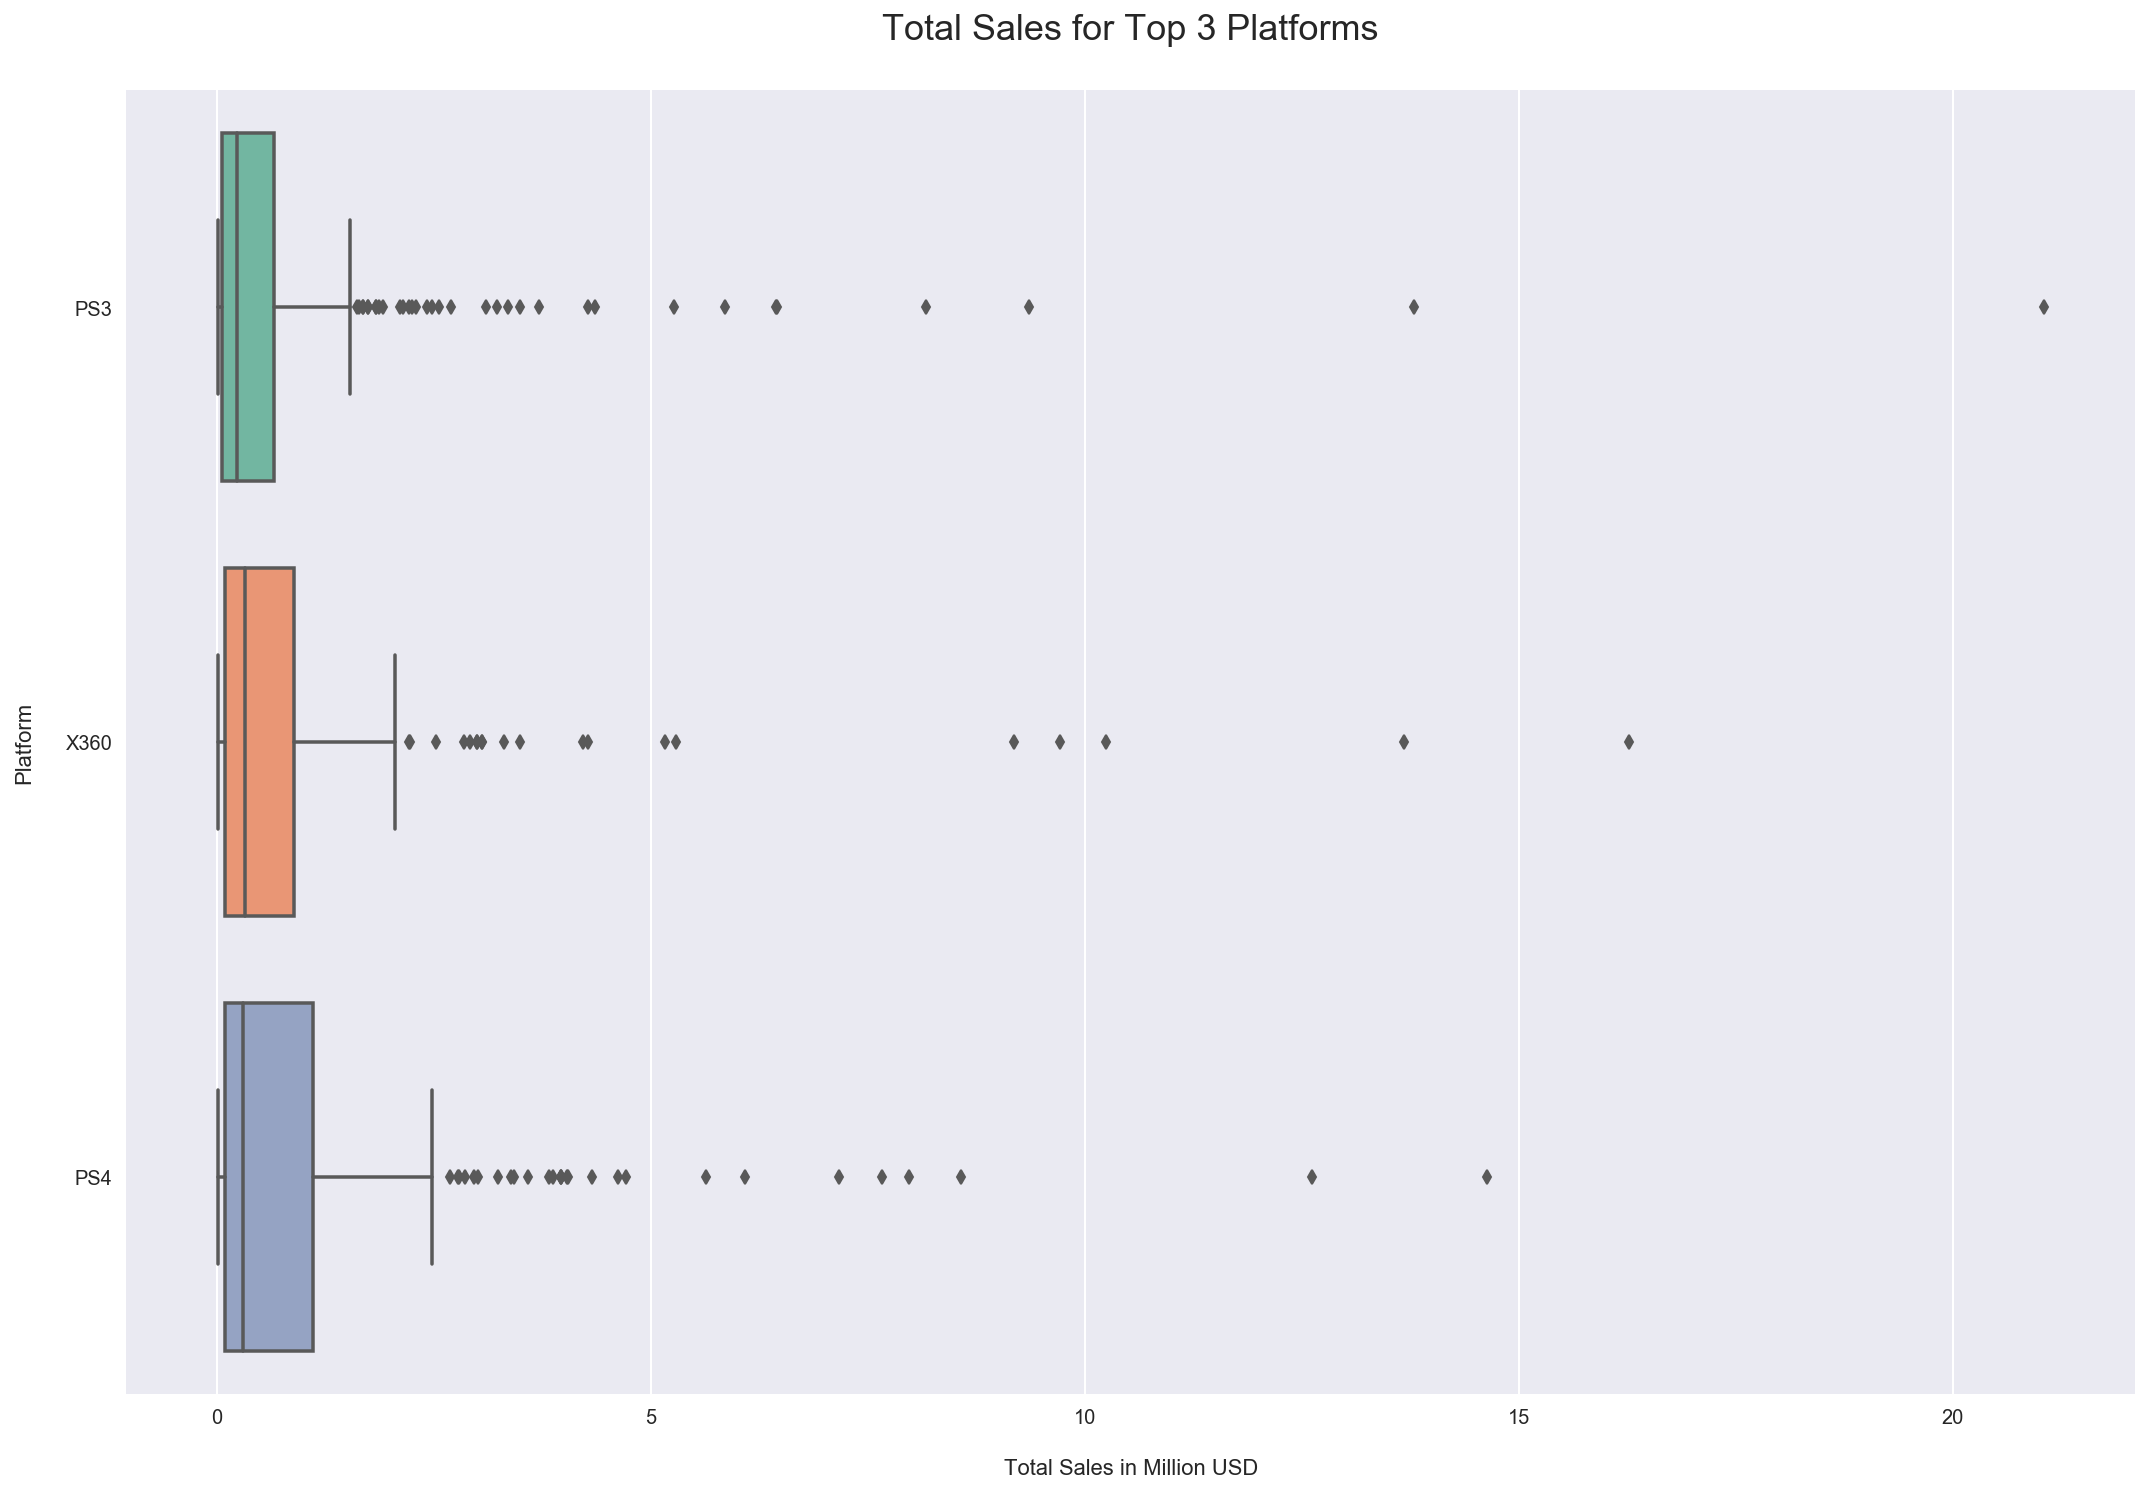

In [102]:
plt.figure(figsize=(18,12))
sns.boxplot(x='total_sales', y='platform', data=top_selling_plats, orient='h')
plt.title('Total Sales for Top 3 Platforms\n', fontsize=18)
plt.ylabel('Platform\n')
plt.xlabel('\nTotal Sales in Million USD')
plt.show()

In [103]:
top_10_recent_plats = list(recent_plats['platform'].head(10))
print('Top 10 Platforms by Total Sales 2012-2015', top_10_recent_plats)
print('Top 10 Platforms by Total Sales All Years',top_10_platforms)

Top 10 Platforms by Total Sales 2012-2015 ['PS3', 'PS4', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']
Top 10 Platforms by Total Sales All Years ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


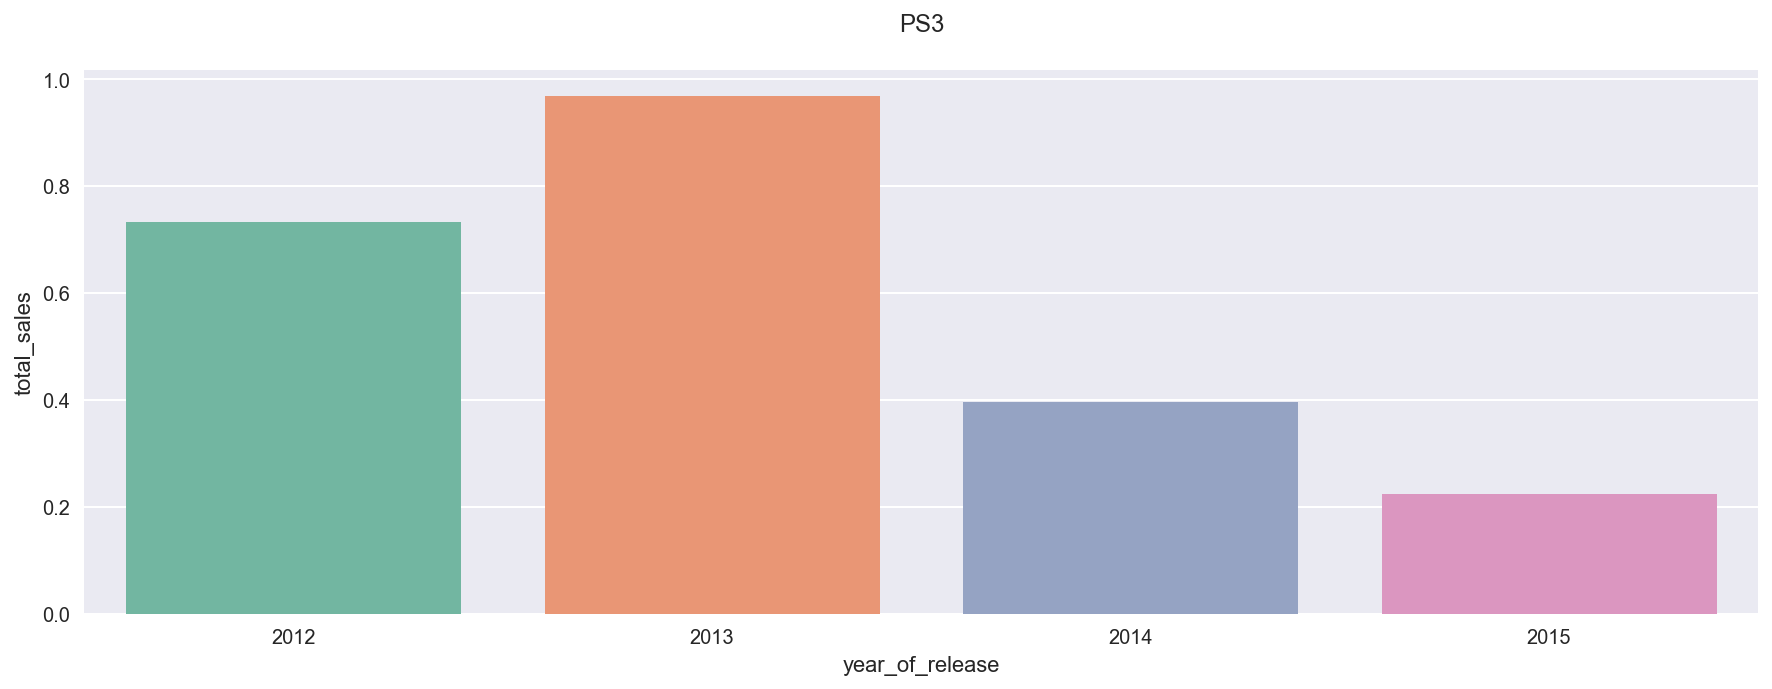

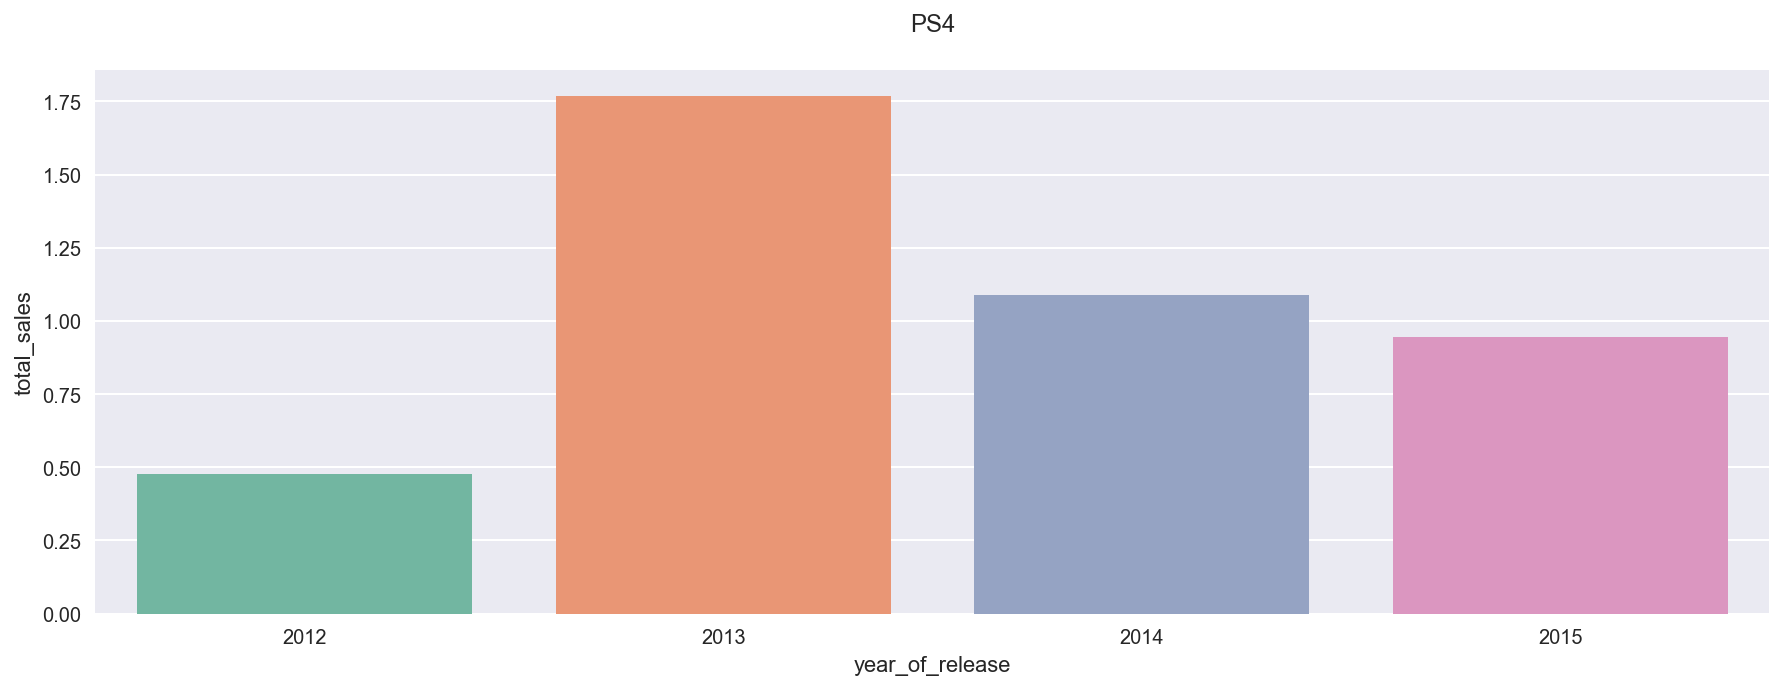

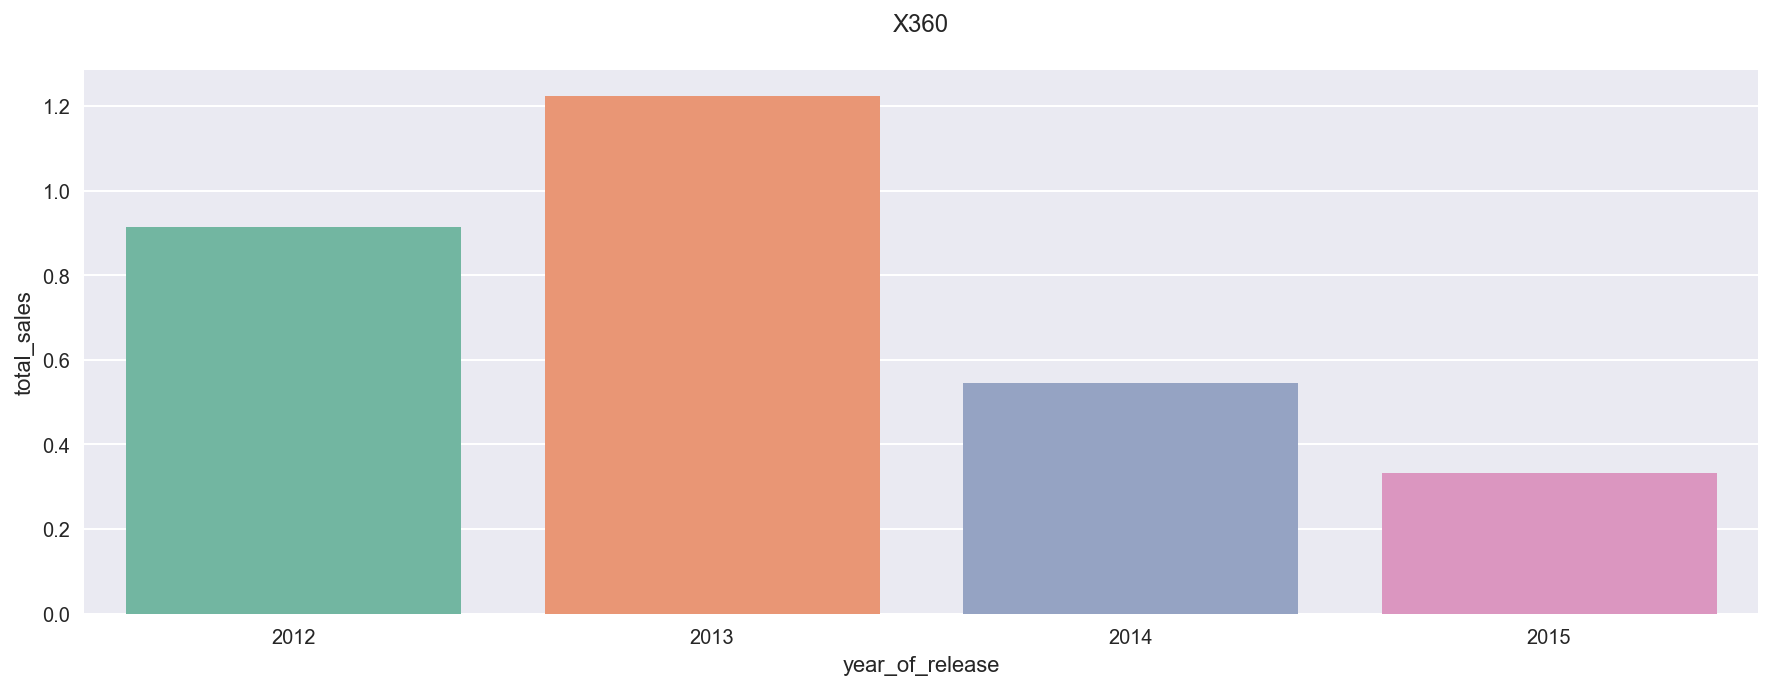

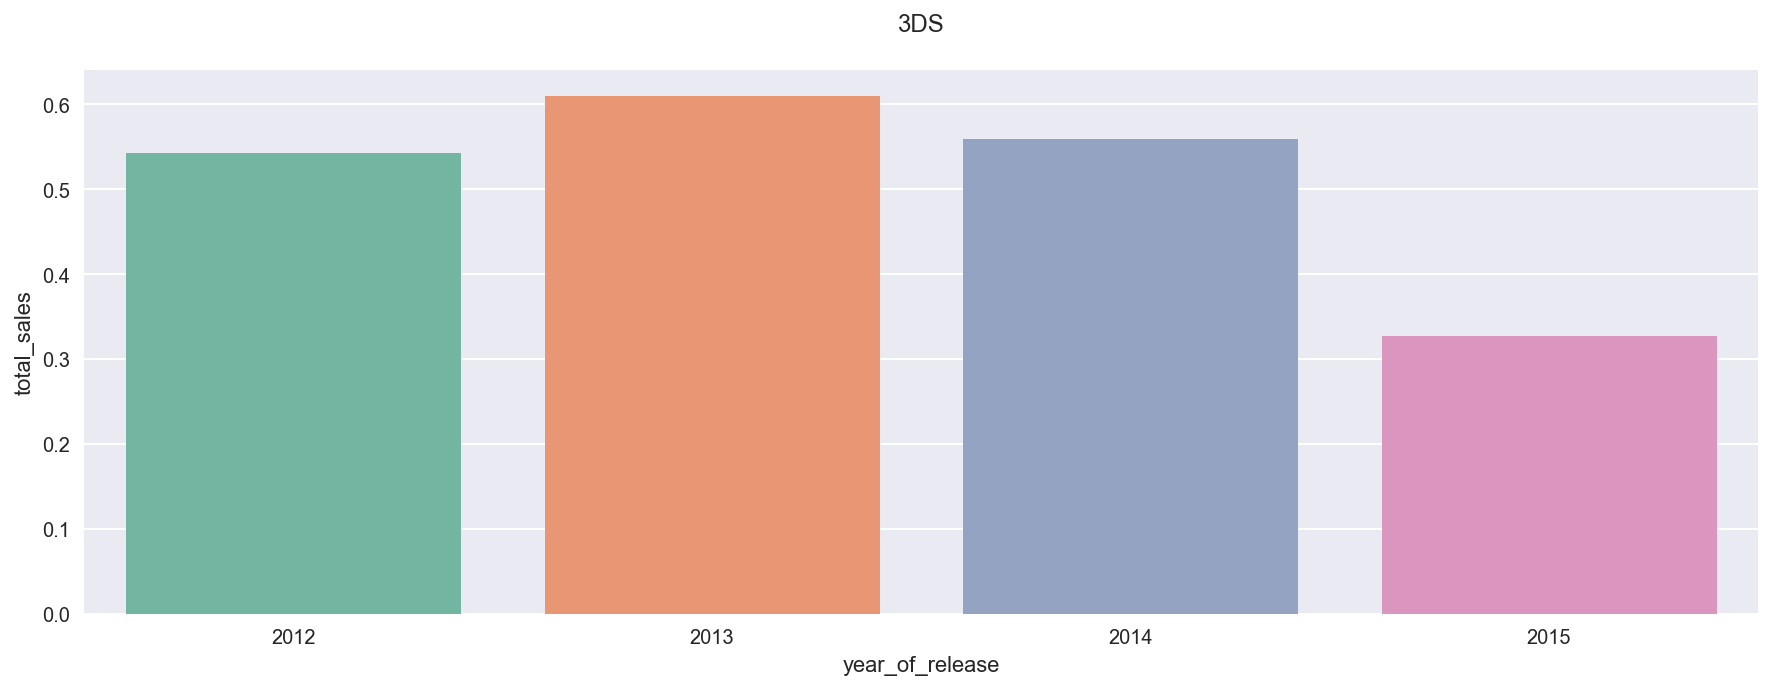

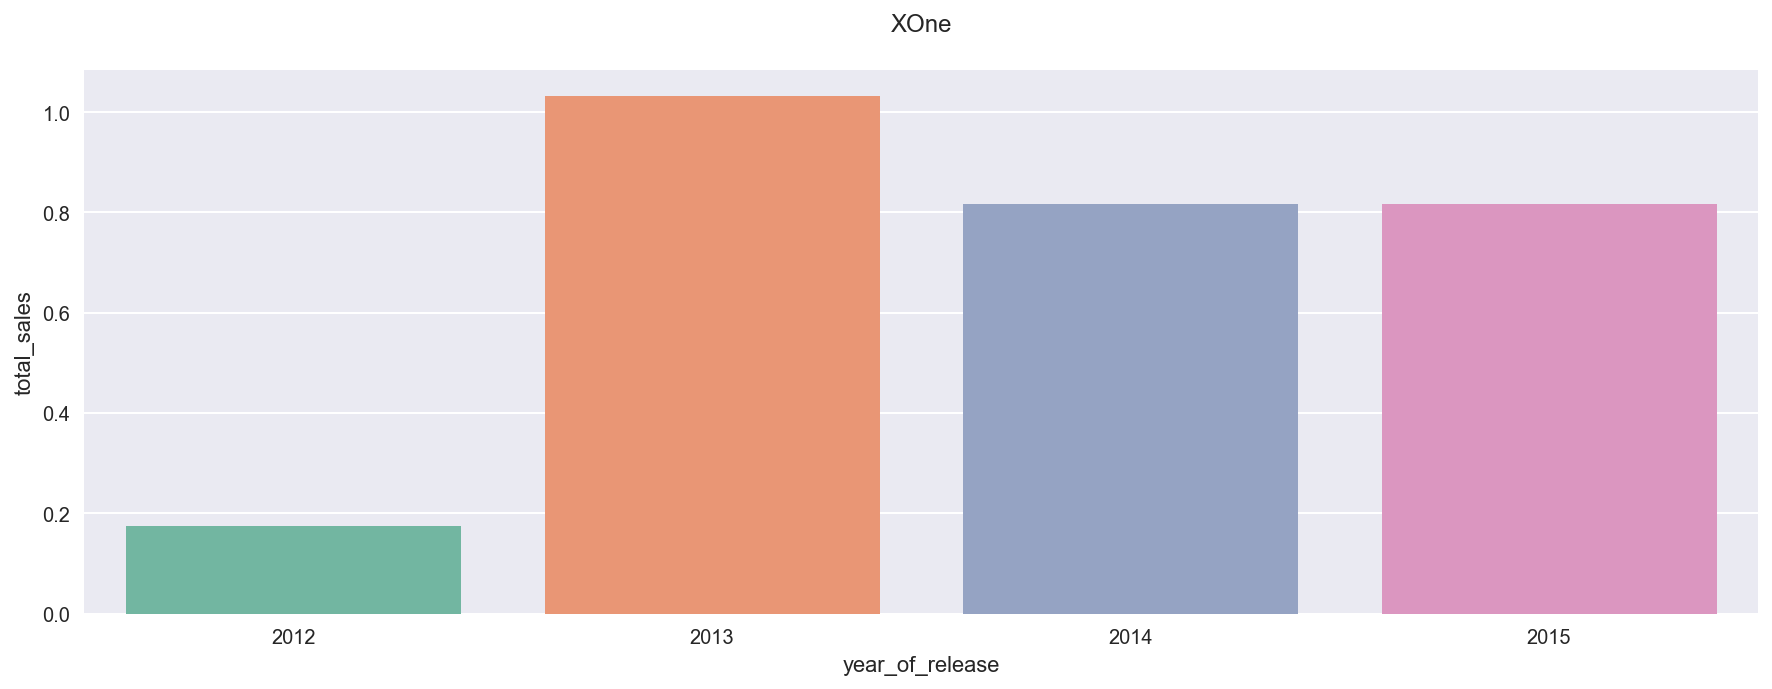

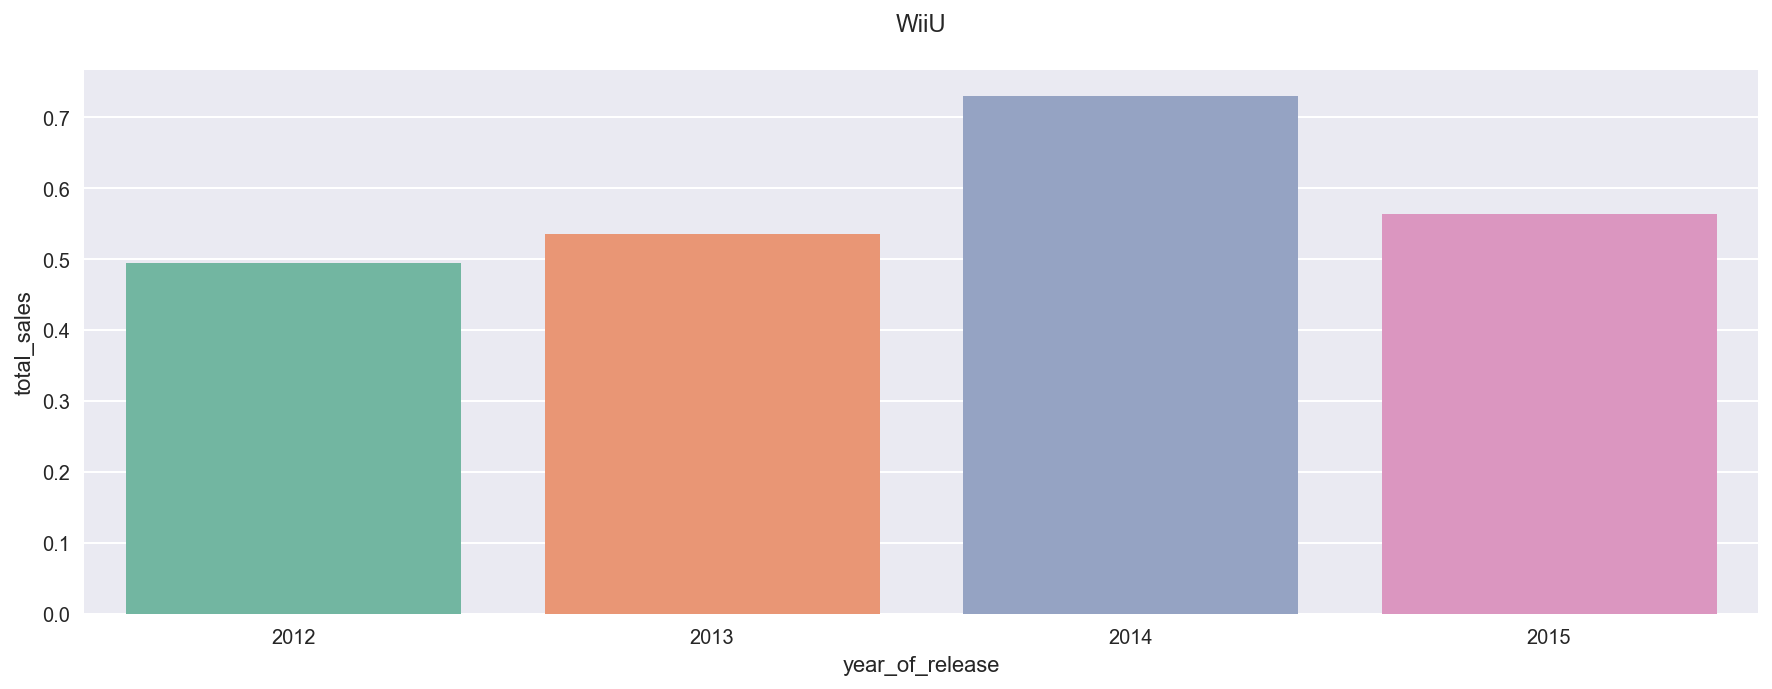

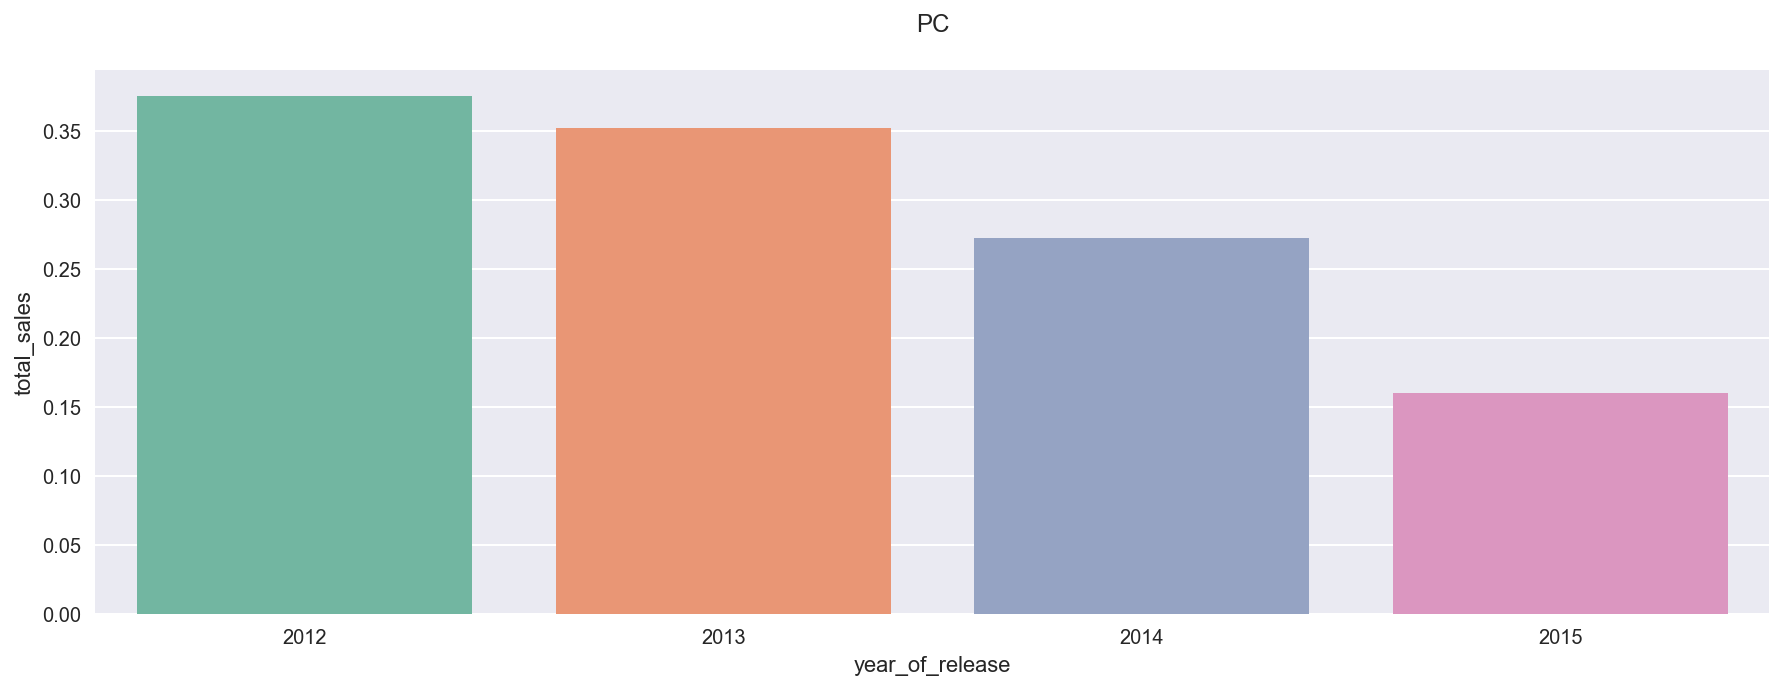

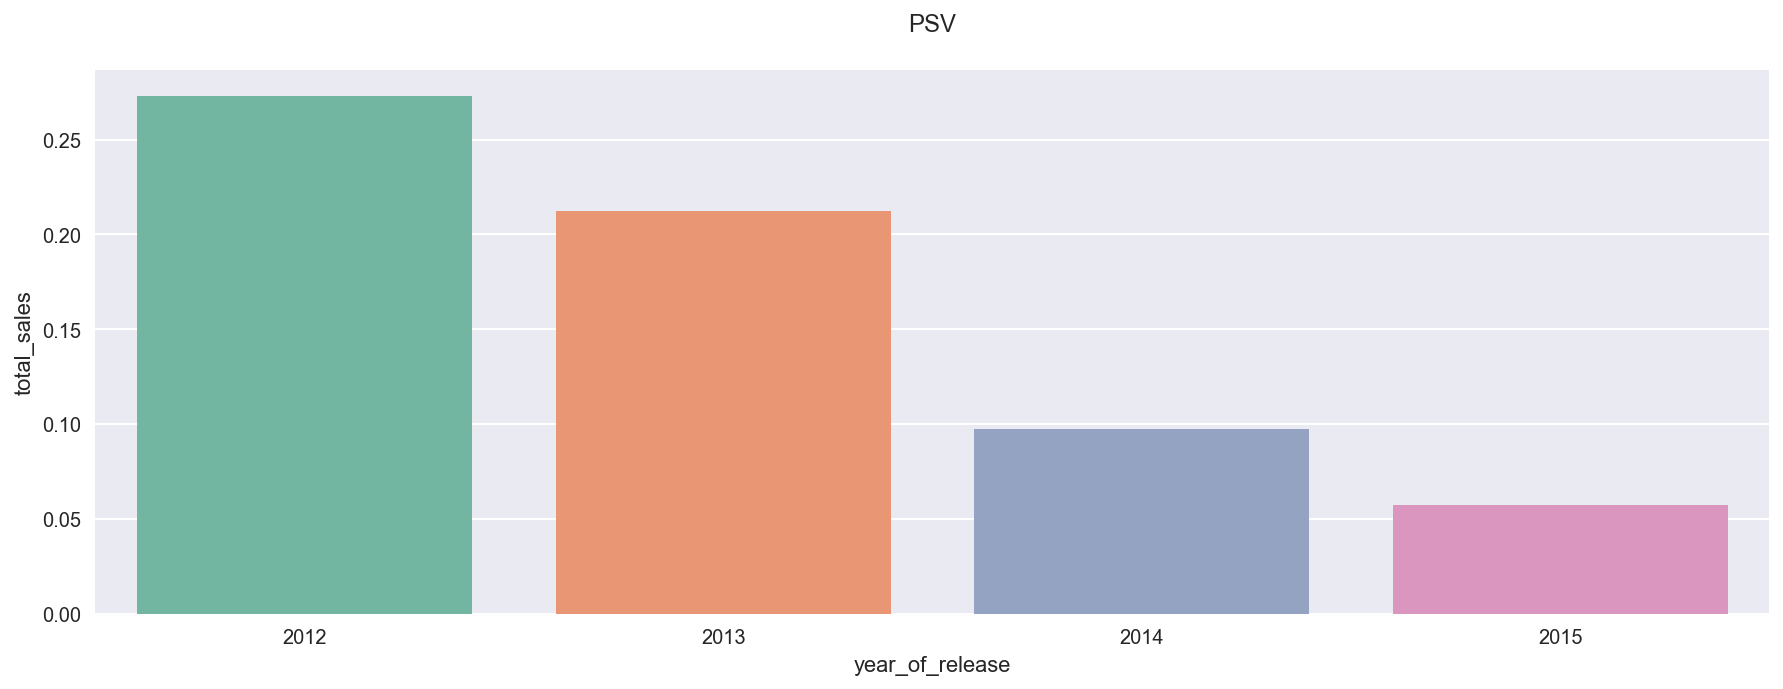

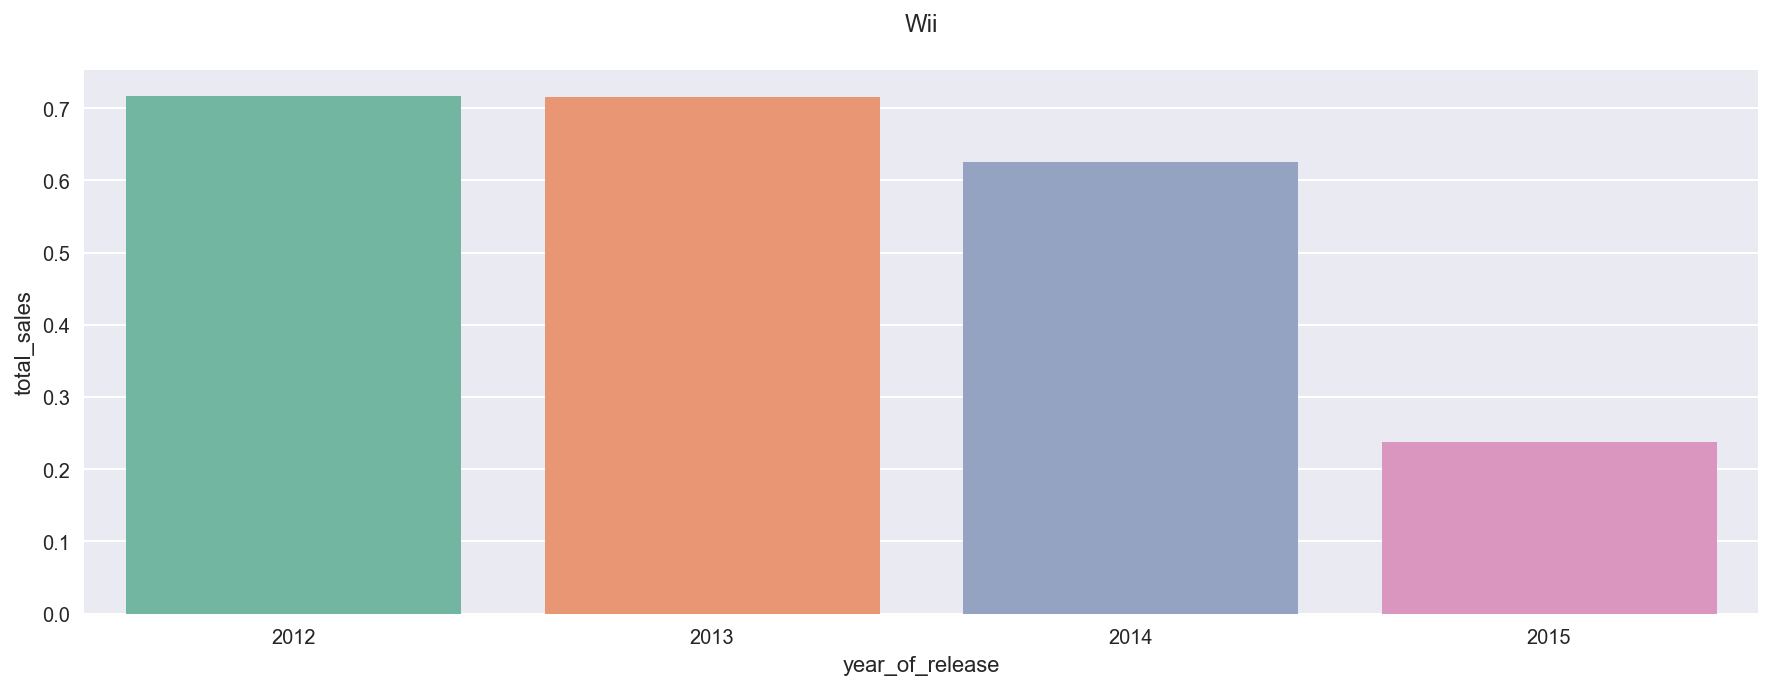

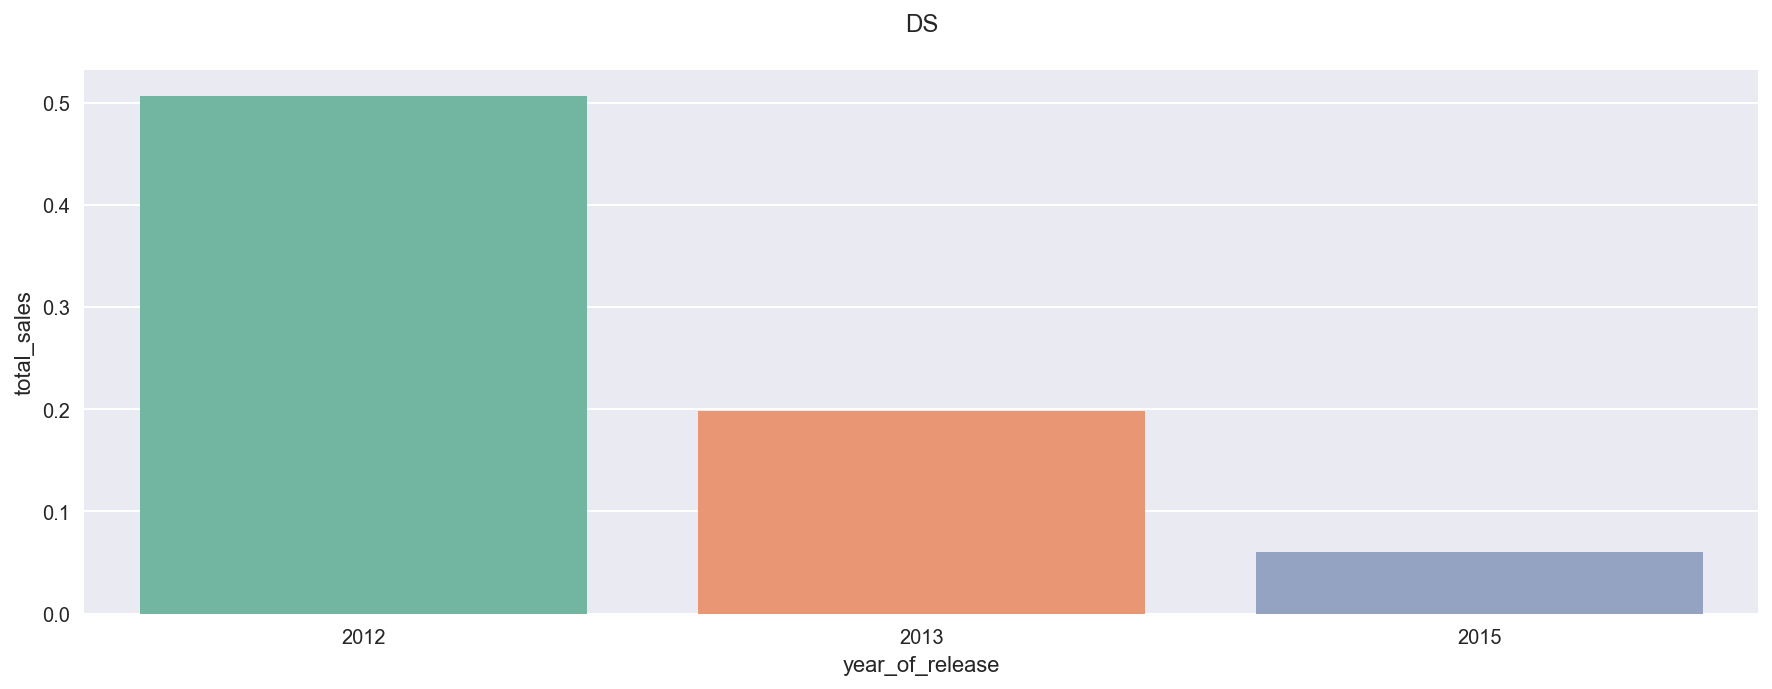

In [104]:
for feature in top_10_recent_plats:
    plt.figure(figsize=(15,5))
    sns.barplot(x="year_of_release", y="total_sales", data=recent_years[recent_years['platform'] == feature].sort_values(by='year_of_release'),
               ci=None)
    plt.title(feature + '\n')
    plt.show()

Total sales peaks for all platforms in around 2013-2014.

Let's look at total sales as it relates to number of releases by year for the top 3 platforms. 

In [105]:
ps4 = recent_years.query('platform == "PS4"').groupby(['year_of_release'])['total_sales'].agg(['count', 'sum', 'mean','median']).reset_index()
ps4

,year_of_release,count,sum,mean,median
0,2012,8,3.82,0.477500,0.370
1,2013,29,51.30,1.768966,0.910
2,2014,68,74.02,1.088529,0.540
3,2015,122,115.26,0.944754,0.175


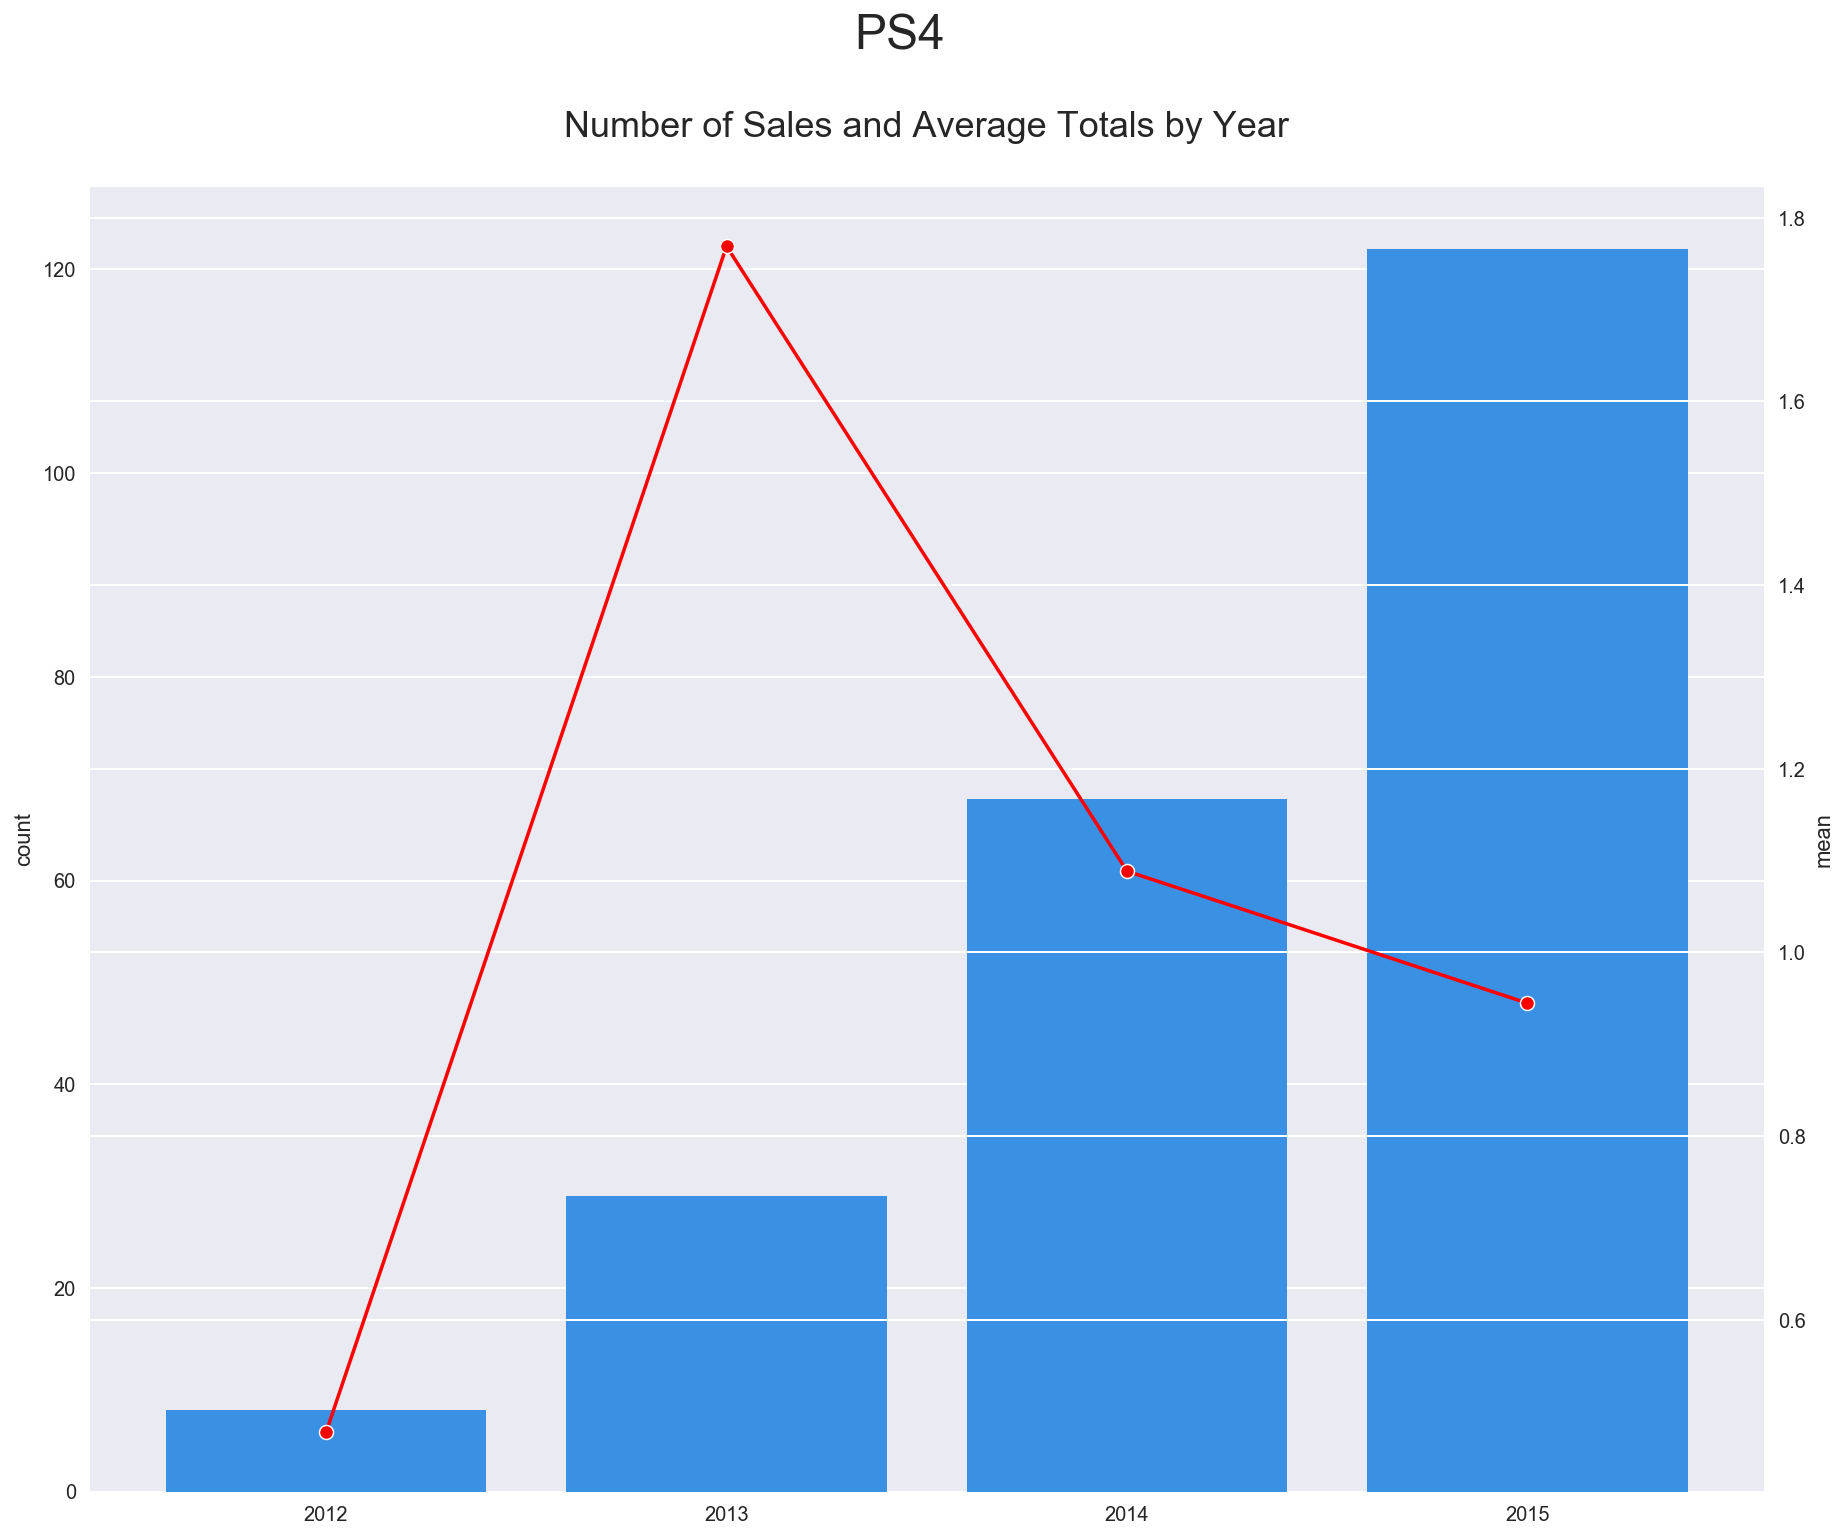

In [106]:
#total number of sales and avearge sales price per year
fig, ax1 = plt.subplots(figsize=(15,12))
ax2 = ax1.twinx()
sns.barplot(x=['2012','2013','2014','2015'],
            y=ps4['count'], 
            color='#1E90FF',
            ax=ax1)
sns.lineplot(x=['2012','2013','2014','2015'], 
             y=ps4['mean'],
             color='r',
             marker="o",
             ax=ax2)
plt.suptitle('PS4\n', fontsize=24)
plt.title('Number of Sales and Average Totals by Year\n', fontsize=18)
plt.show()
sns.set()

In [107]:
x360 = recent_years.query('platform == "X360"').groupby(['year_of_release'])['total_sales'].agg(['count', 'sum', 'mean','median']).reset_index()
x360

,year_of_release,count,sum,mean,median
0,2012,109,99.62,0.913945,0.400
1,2013,70,85.66,1.223714,0.455
2,2014,65,35.41,0.544769,0.270
3,2015,35,11.65,0.332857,0.170


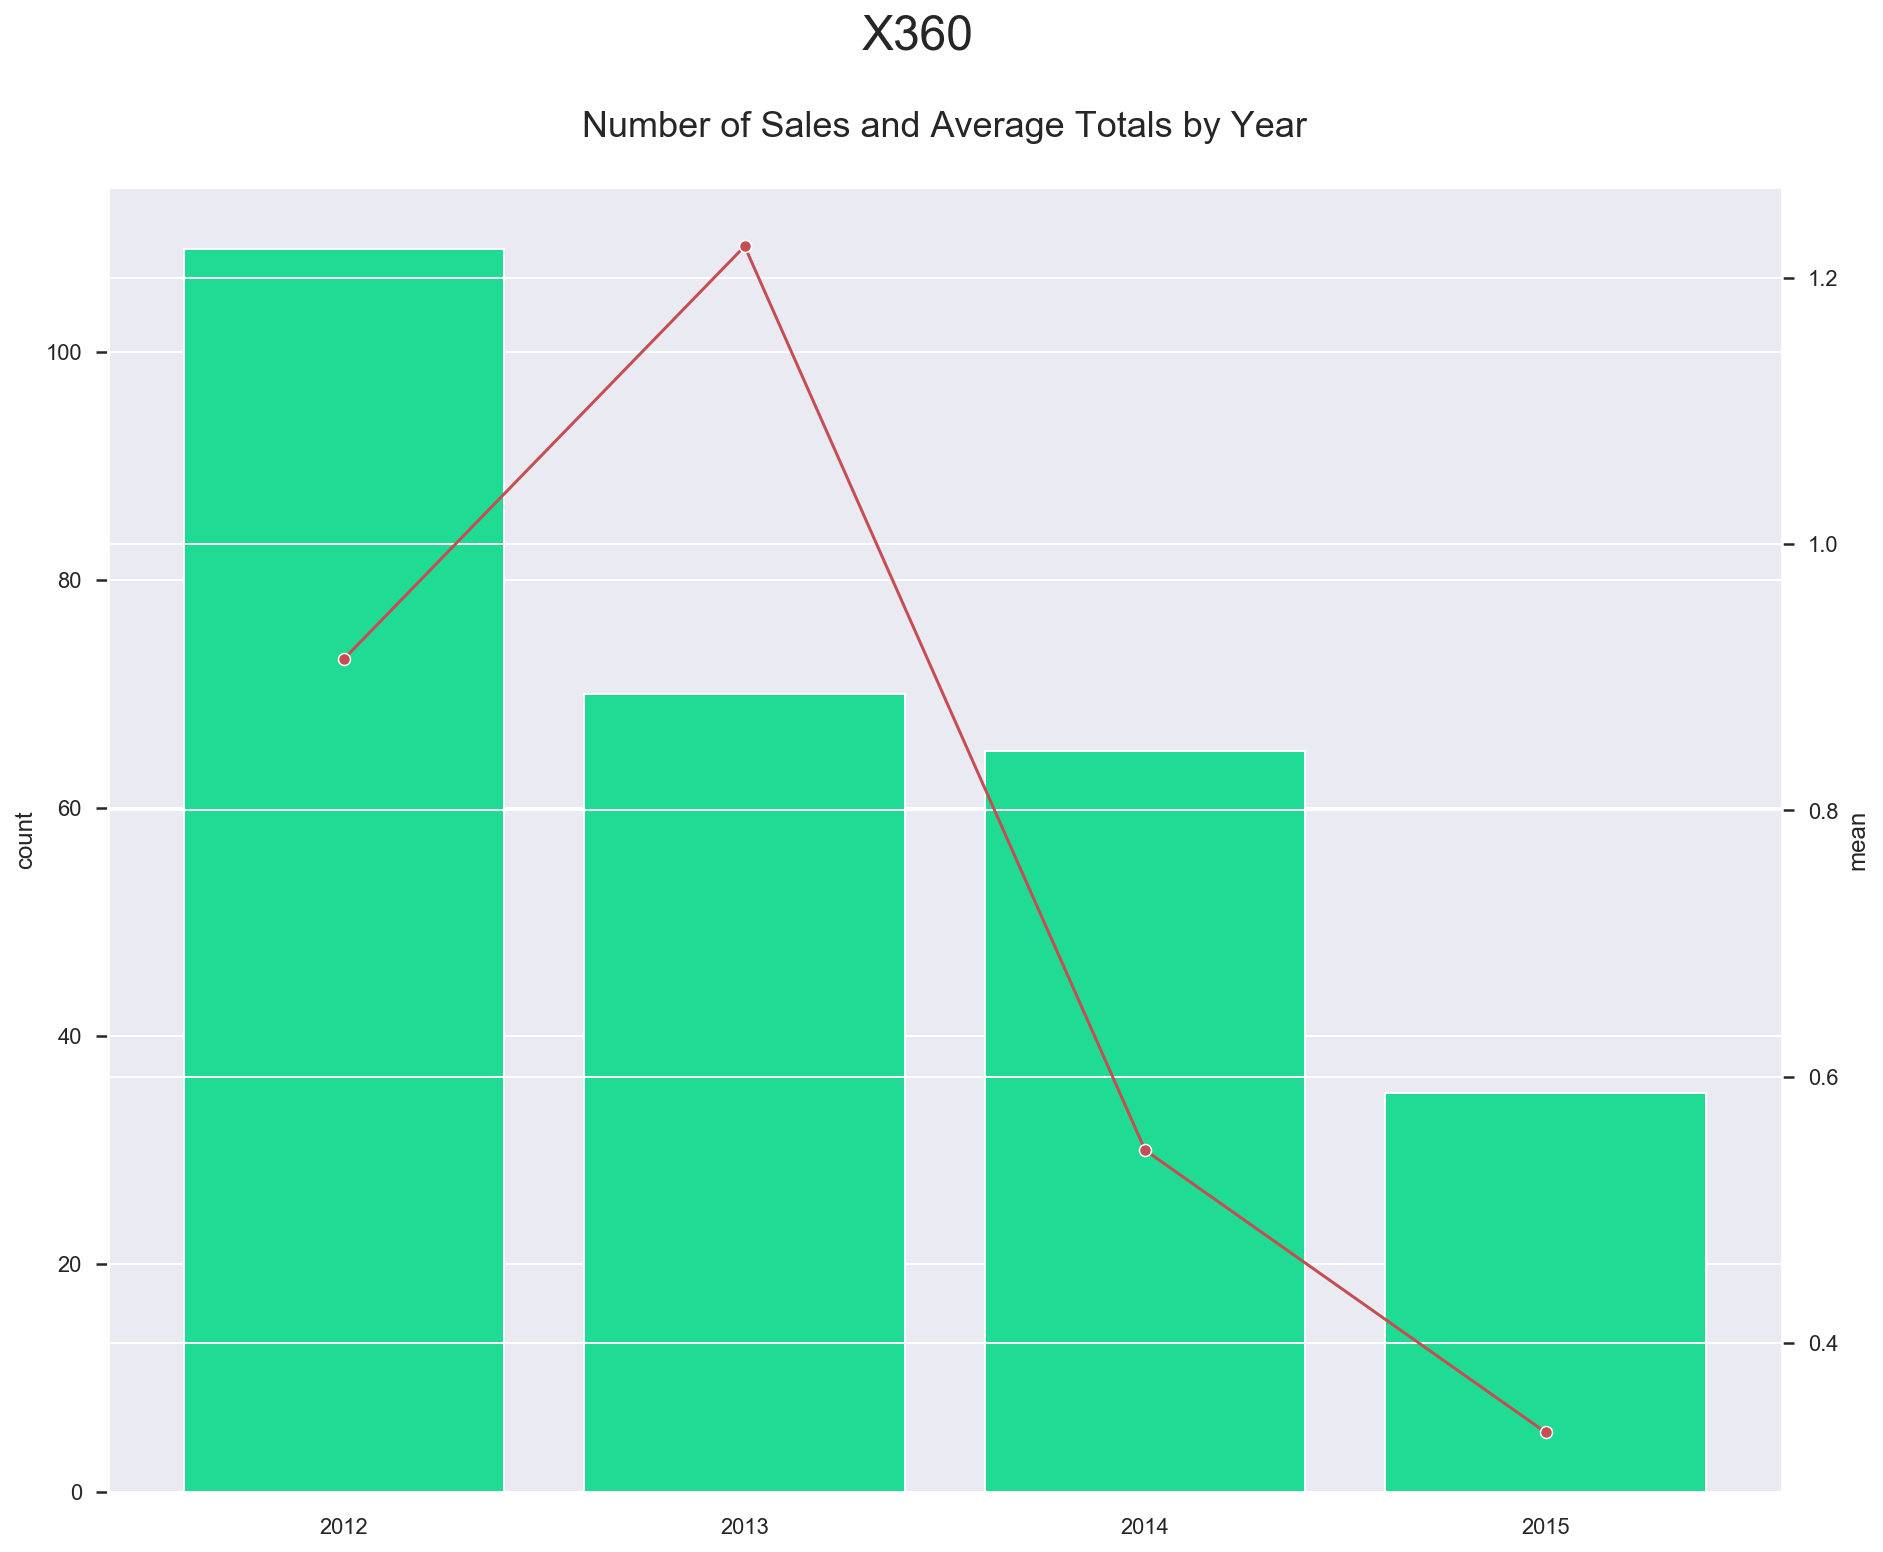

In [108]:
#total number of sales and avearge sales price per year
fig, ax1 = plt.subplots(figsize=(15,12))
ax2 = ax1.twinx()
sns.barplot(x=['2012','2013','2014','2015'],
            y=x360['count'], 
            color='#00FA9A',
            ax=ax1)
sns.lineplot(x=['2012','2013','2014','2015'], 
             y=x360['mean'],
             color='r',
             marker="o",
             ax=ax2)
plt.suptitle('X360\n', fontsize=24)
plt.title('Number of Sales and Average Totals by Year\n', fontsize=18)
plt.show()
sns.set()

In [109]:
ps3 = recent_years.query('platform == "PS3"').groupby(['year_of_release'])['total_sales'].agg(['count', 'sum', 'mean','median']).reset_index()
ps3

,year_of_release,count,sum,mean,median
0,2012,146,106.88,0.732055,0.32
1,2013,115,111.38,0.968522,0.31
2,2014,107,42.45,0.396729,0.16
3,2015,74,16.55,0.223649,0.05


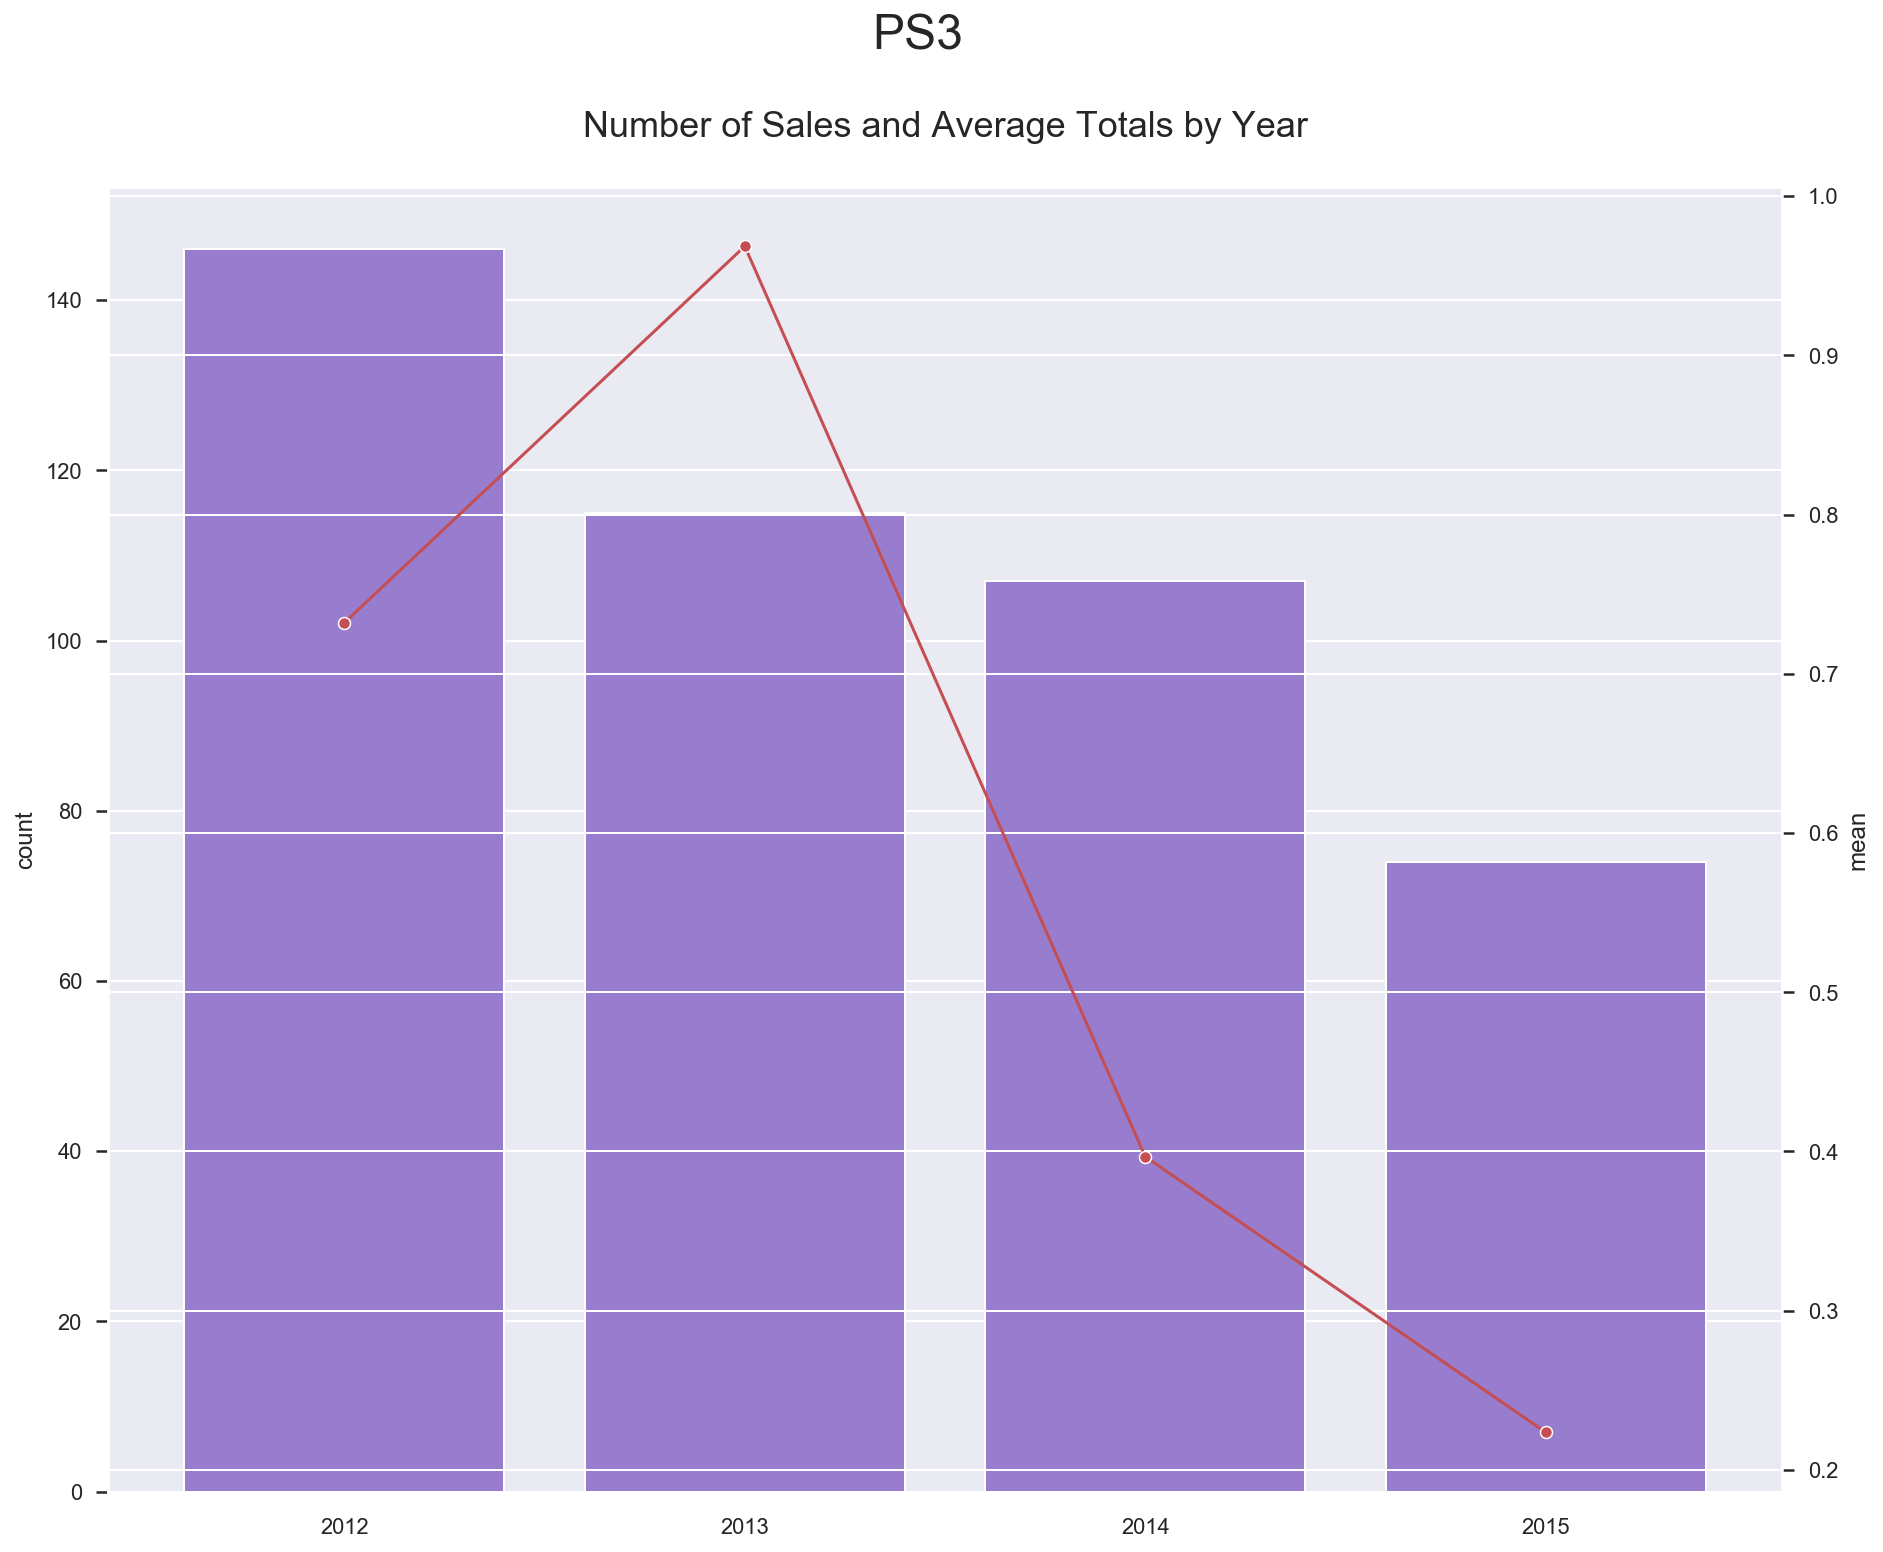

In [110]:
#total number of sales and avearge sales price per year
fig, ax1 = plt.subplots(figsize=(15,12))
ax2 = ax1.twinx()
sns.barplot(x=['2012','2013','2014','2015'],
            y=ps3['count'], 
            color='#9370DB',
            ax=ax1)
sns.lineplot(x=['2012','2013','2014','2015'], 
             y=ps3['mean'],
             color='r',
             marker="o",
             ax=ax2)
plt.suptitle('PS3\n', fontsize=24)
plt.title('Number of Sales and Average Totals by Year\n', fontsize=18)
plt.show()
sns.set()

### Conclusion

Key insights about higest total sales by platform:
* 💰 Total sales peak across platforms in 2013
* 💎 The number of releases for PS4 has gone up while the average sales has gone down
* 💎 Overall the number of releases and total sales is declining for all platforms

[Back to Table of Contents](#table-of-contents)

## Task 5<a name="task-5"></a>
### Build a box plot for the global sales of each game, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Let's look at total sales by platform and then dig further into sales by each region.

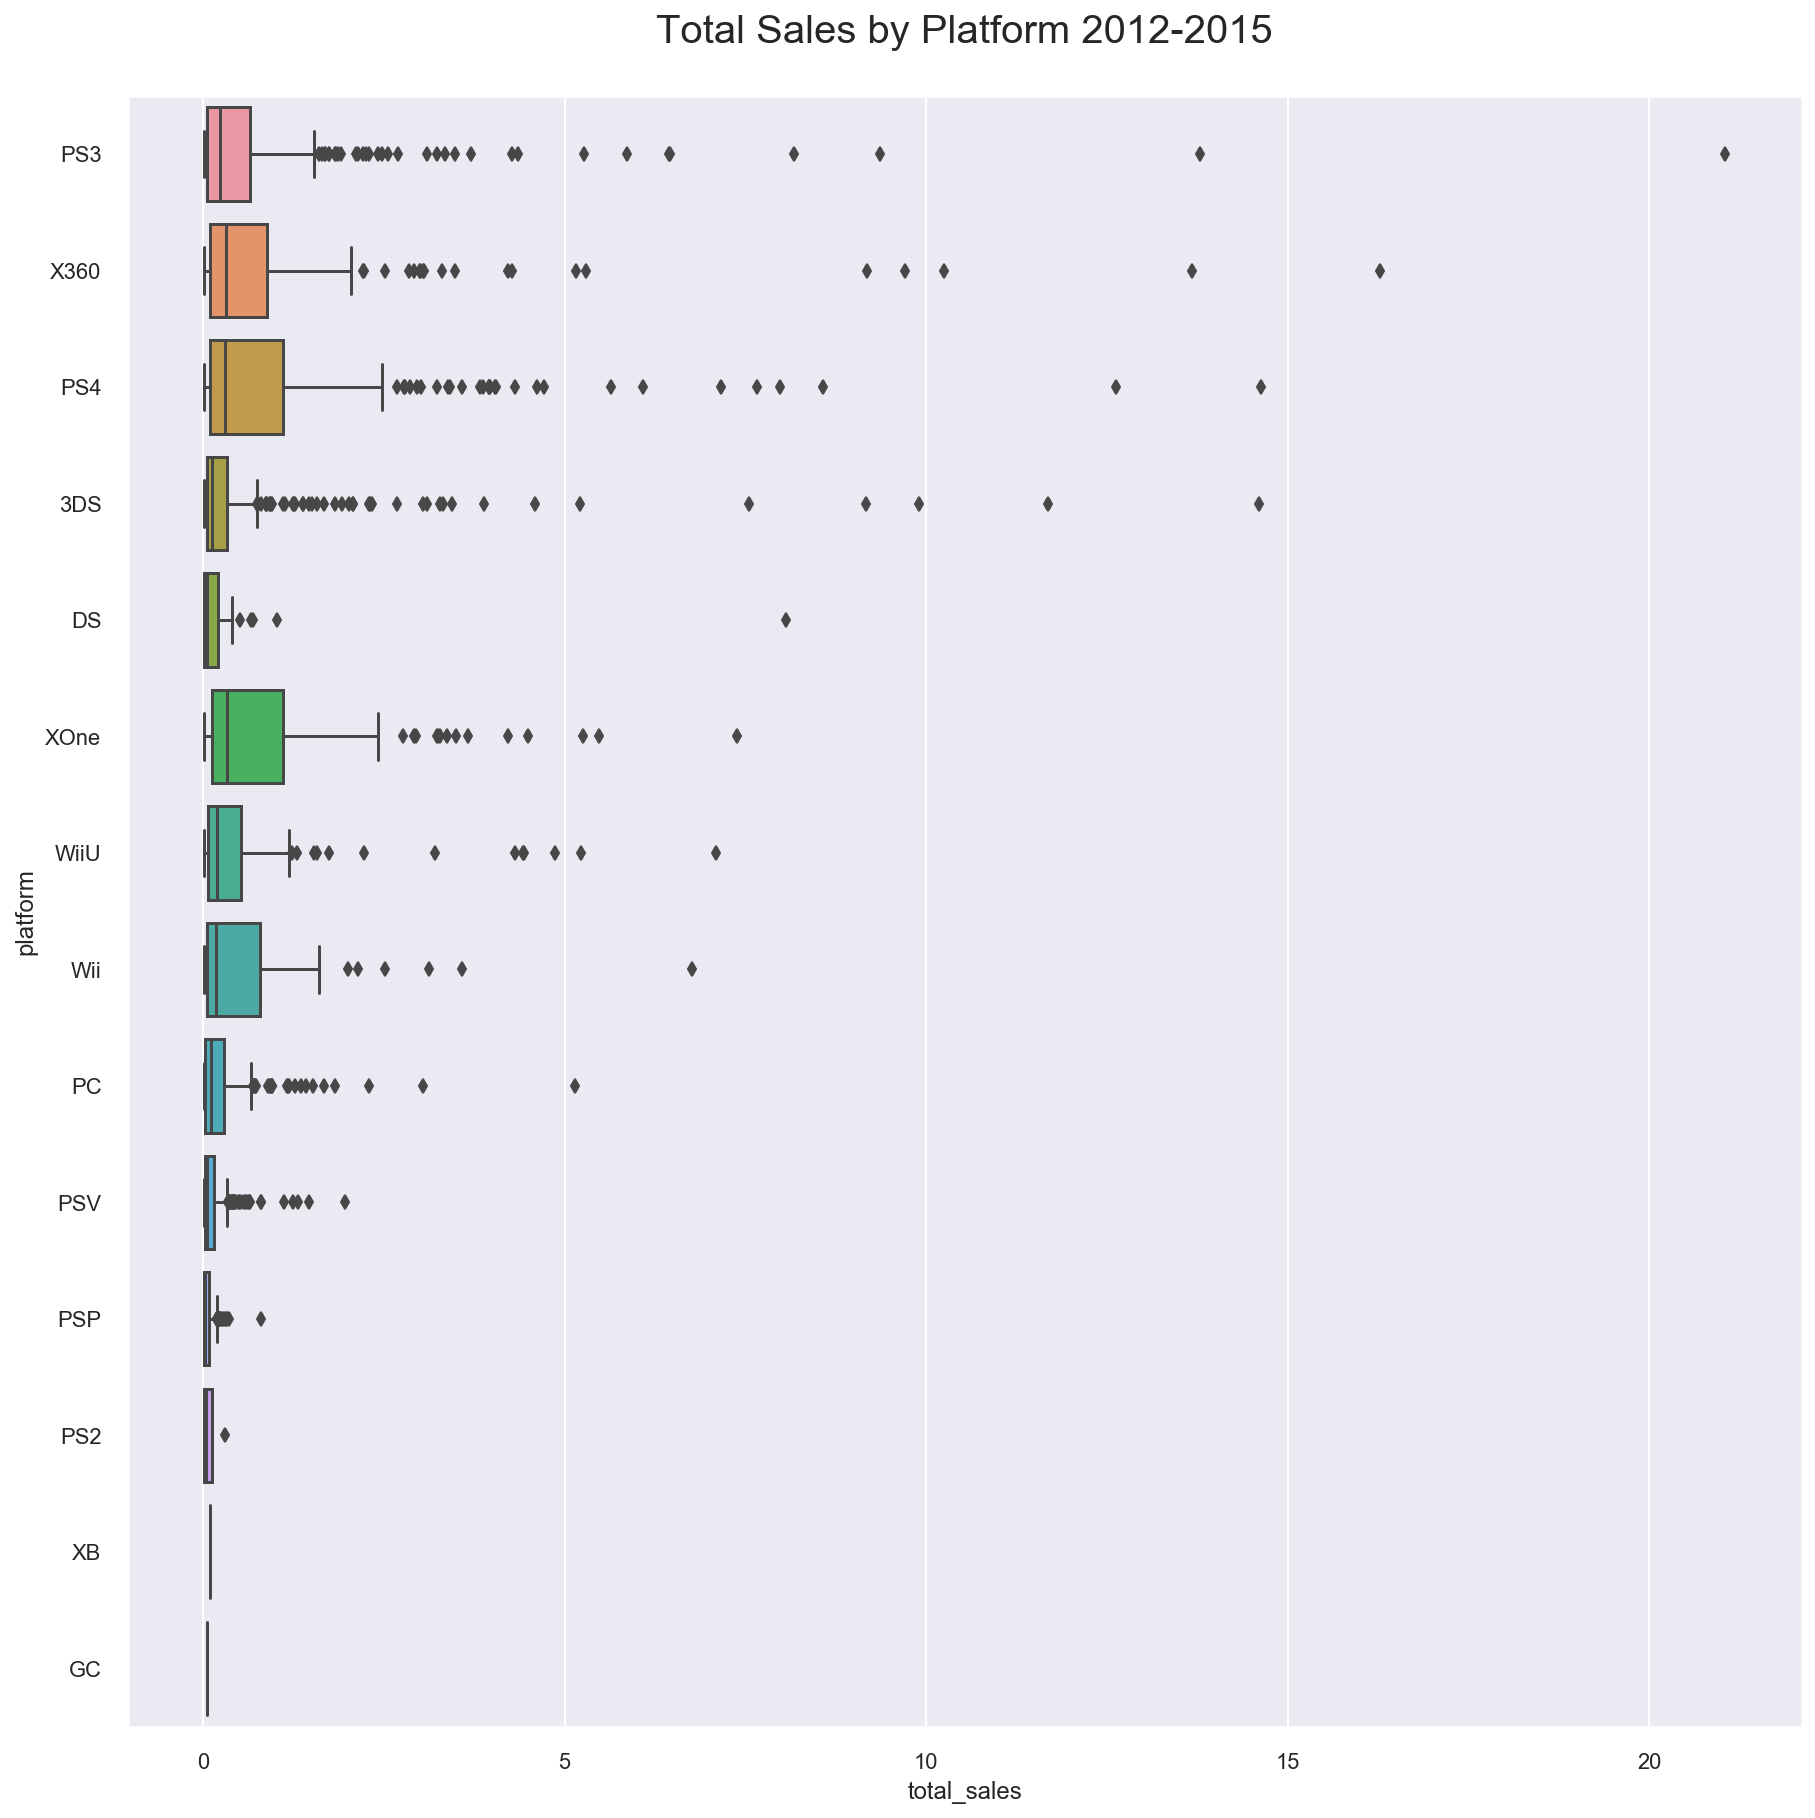

In [111]:
plt.figure(figsize=(15,15))
sns.boxplot(y='platform', x='total_sales', data=recent_years, orient='h')
plt.title('Total Sales by Platform 2012-2015\n',fontsize=20)
plt.show()

PS4, X360 and PS3 have the highest total sales worldwide 2012-2015.

<Figure size 720x576 with 0 Axes>

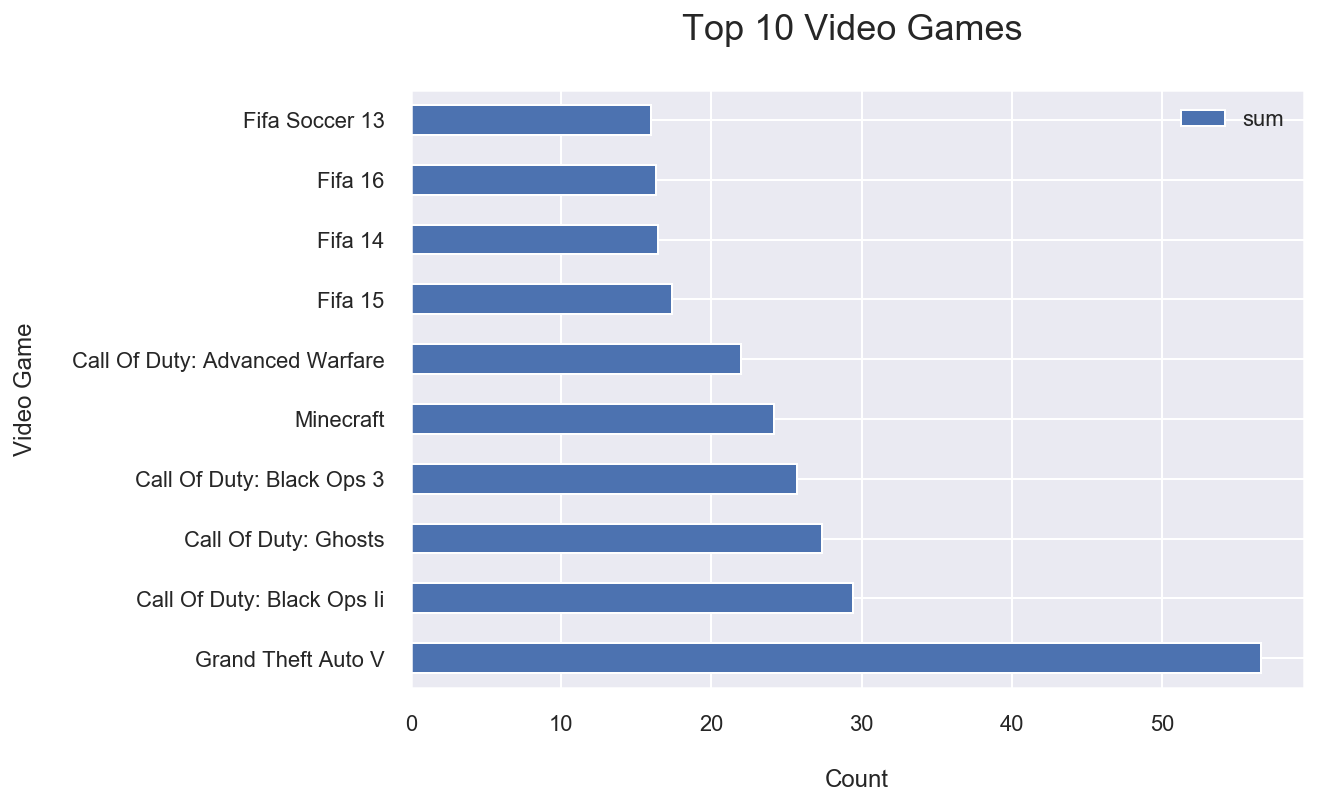

In [112]:
plt.figure(figsize=(10,8))
recent_years.groupby(['name'])['total_sales'].agg(['sum']).sort_values(by='sum',ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Video Games \n', fontsize=18)
plt.xlabel('\nCount')
plt.ylabel('Video Game\n')
plt.show()

From 2012 to 2015, the highest grossing game Grand Theft Auto V. We will look at how sales of this top grossing game varies by platform across different regions. 

In [113]:
gta = recent_years[recent_years['name'] == 'Grand Theft Auto V']
gta[['name','platform','total_sales','na_sales','eu_sales','jp_sales','other_sales']]

,name,platform,total_sales,na_sales,eu_sales,jp_sales,other_sales
16,Grand Theft Auto V,PS3,21.05,7.02,9.09,0.98,3.96
23,Grand Theft Auto V,X360,16.27,9.66,5.14,0.06,1.41
42,Grand Theft Auto V,PS4,12.62,3.96,6.31,0.38,1.97
165,Grand Theft Auto V,XOne,5.47,2.81,2.19,0.00,0.47
1730,Grand Theft Auto V,PC,1.17,0.39,0.69,0.00,0.09


We can see that total sales was highest on PS3 with Europe contributing 9.09M USD in sales. For X360, total sales was highest in North America. Sales on the PS4 platform were highest in North America, as well.

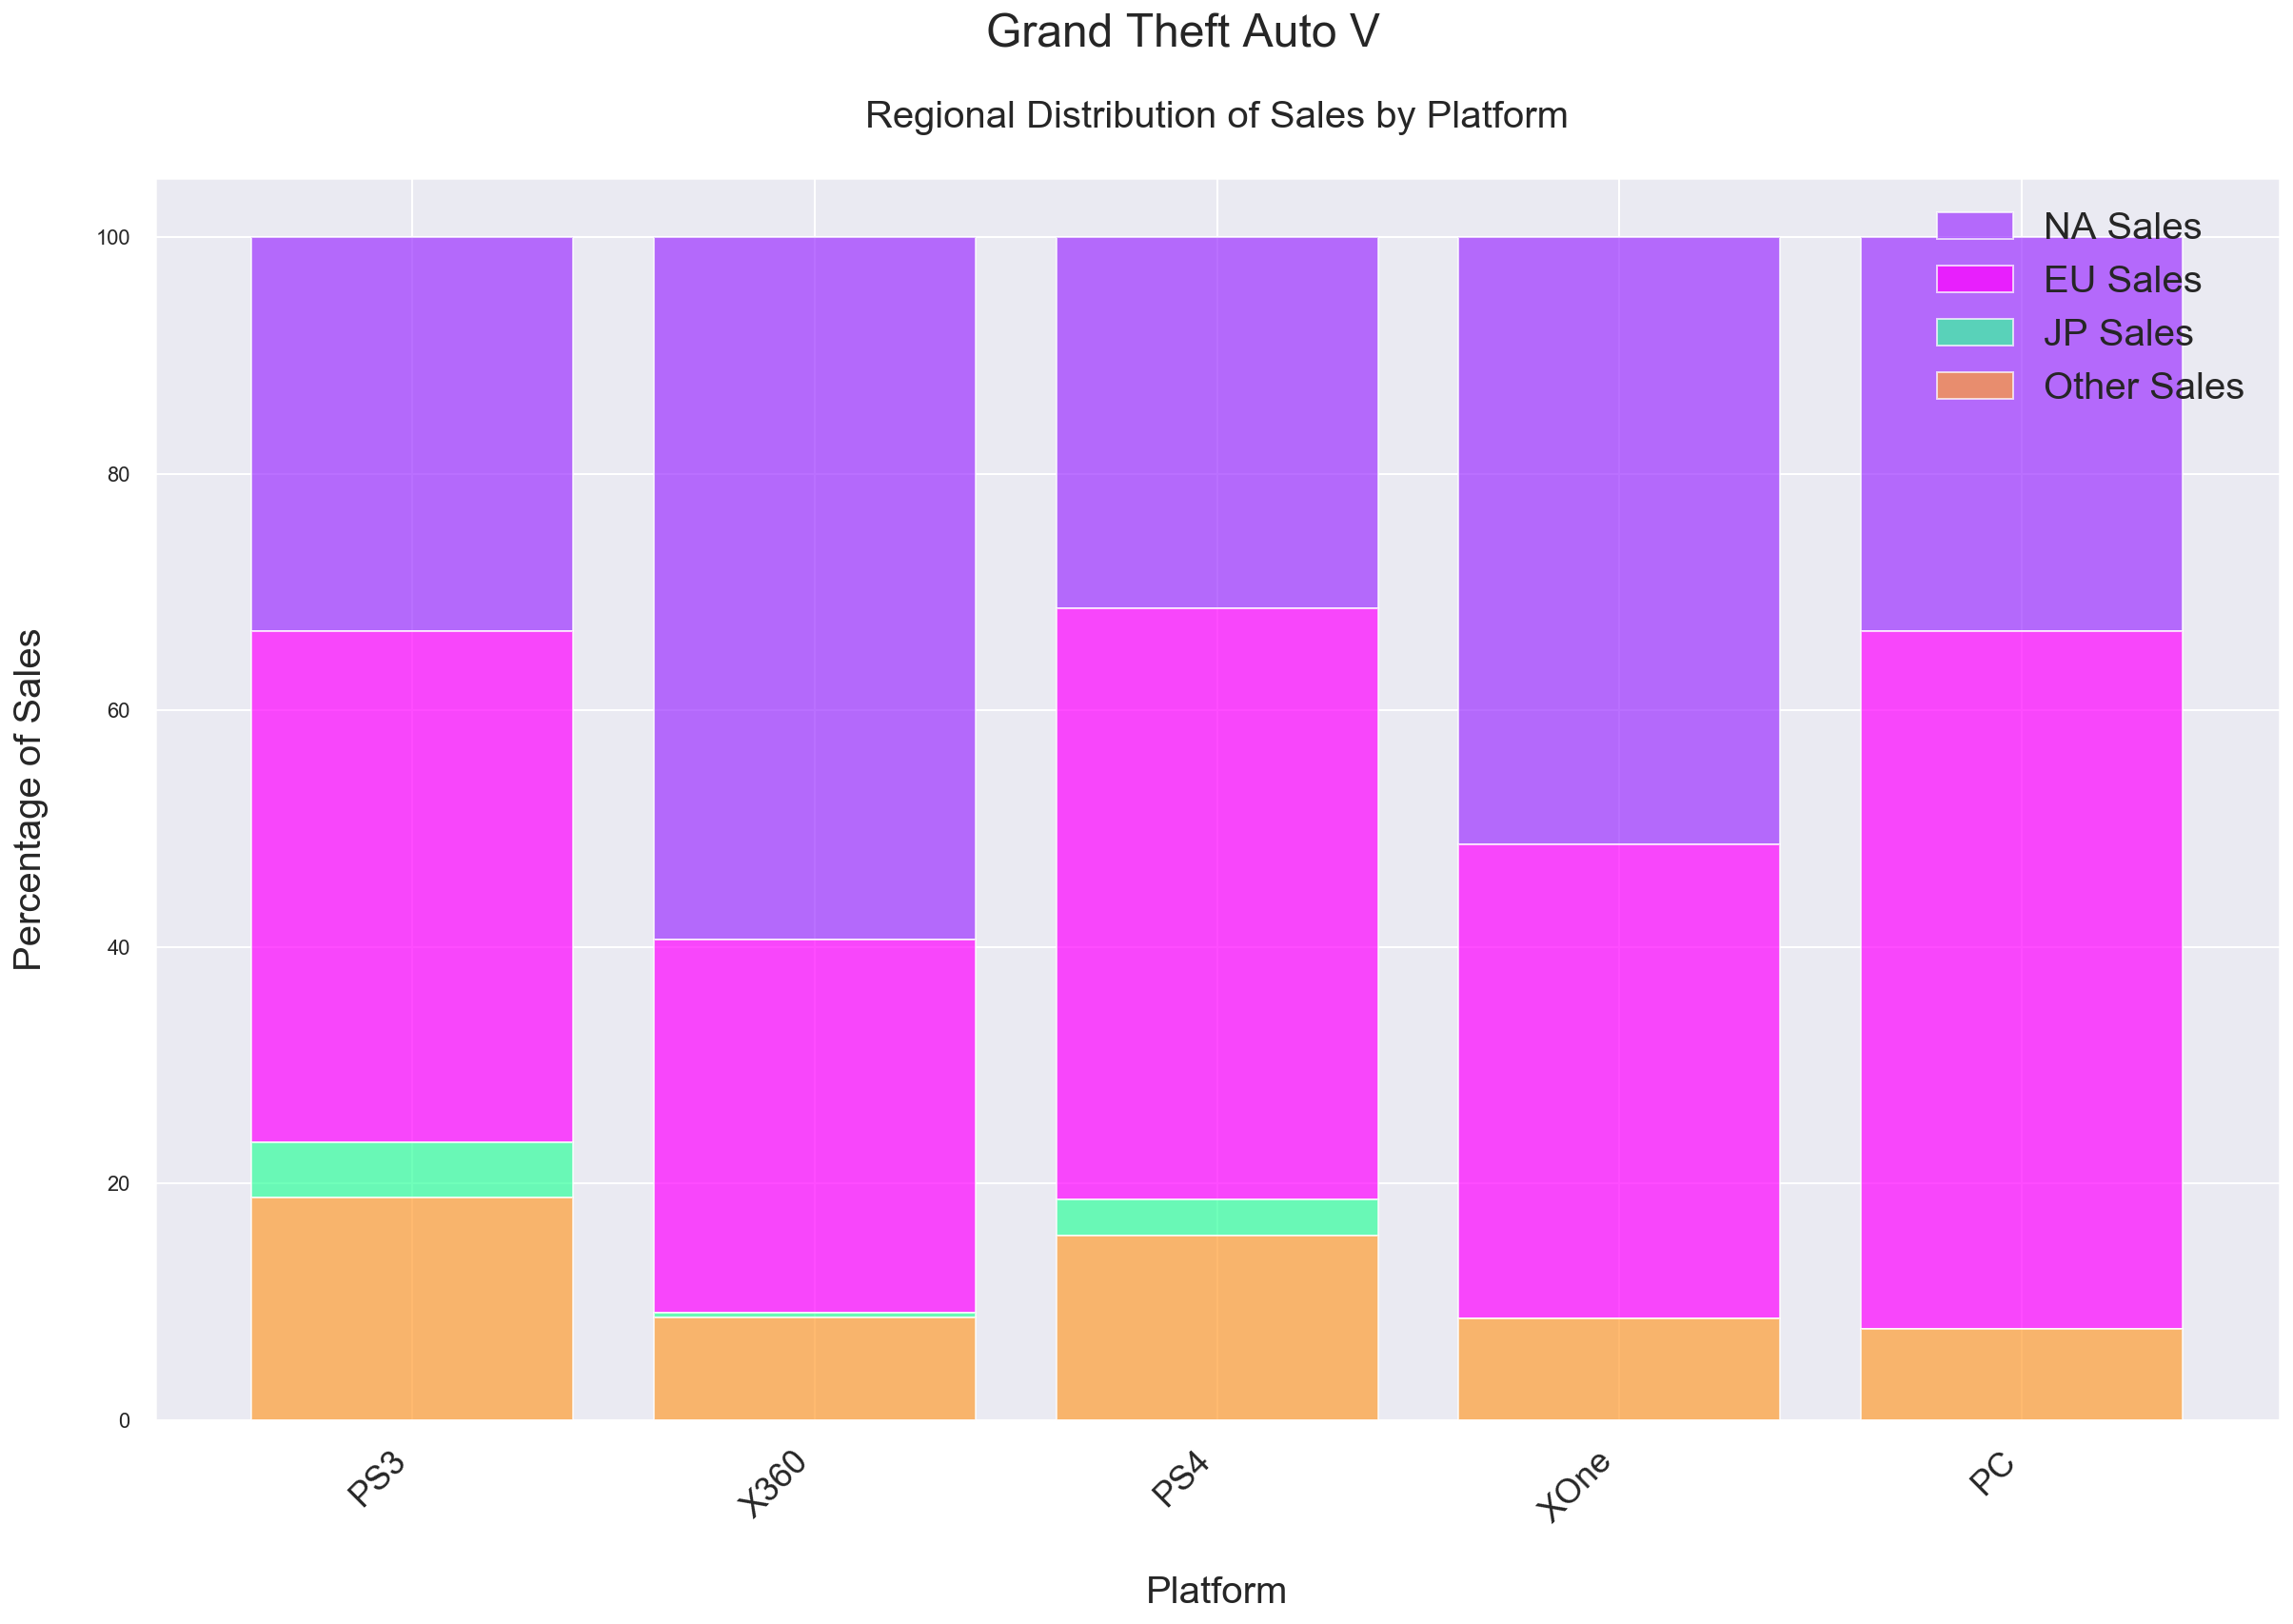

In [114]:
gta_na = np.array(list(gta['na_sales']/gta['total_sales']*100))
gta_eu = np.array(list(gta['eu_sales']/gta['total_sales']*100))
gta_jp = np.array(list(gta['jp_sales']/gta['total_sales']*100))
gta_other = np.array(list(gta['other_sales']/gta['total_sales']*100))

classes = ['PS3','X360','PS4','XOne','PC']

ind = [x for x, _ in enumerate(classes)]

total = gta_na + gta_eu + gta_jp + gta_other

proportion_na = np.true_divide(gta_na, total) * 100
proportion_eu = np.true_divide(gta_eu, total) * 100
proportion_jp = np.true_divide(gta_jp, total) * 100
proportion_other = np.true_divide(gta_other, total) * 100

plt.rcParams['figure.figsize'] = [20, 12]

plt.bar(ind, gta_na, width=0.8, alpha=0.7, label='NA Sales', color='#9D33FF', bottom=proportion_eu+proportion_jp+proportion_other)
plt.bar(ind, gta_eu, width=0.8, alpha=0.7, label='EU Sales', color='#FF00FF', bottom=proportion_jp+proportion_other)
plt.bar(ind, gta_jp, width=0.8, alpha=0.7, label='JP Sales', color='#33FF9D', bottom=proportion_other)
plt.bar(ind, gta_other, width=0.8, alpha=0.7, label='Other Sales', color='#FF9D33')

plt.xticks(ind, classes, fontsize=18)
plt.ylabel("Percentage of Sales\n", fontsize =20)
plt.xlabel("\nPlatform", fontsize =20)
plt.suptitle('Grand Theft Auto V',fontsize=24)
plt.title('Regional Distribution of Sales by Platform\n', fontsize = 20)
plt.ylim=1.0
plt.legend(loc='best',fontsize = 20)
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

Here's a look at how sales of all games varies by platform and region.

In [115]:
games_by_platform = recent_years.groupby(['name','platform'])['na_sales','eu_sales','jp_sales'].agg('sum')\
.sort_values(by=['eu_sales'],ascending=False)
games_by_platform.head(20)

na_sales  eu_sales  \
name                                      platform                       
Grand Theft Auto V                        PS3           7.02      9.09   
                                          PS4           3.96      6.31   
Fifa 16                                   PS4           1.12      6.12   
Call Of Duty: Black Ops 3                 PS4           6.03      5.86   
Call Of Duty: Black Ops Ii                PS3           4.99      5.73   
Grand Theft Auto V                        X360          9.66      5.14   
Fifa Soccer 13                            PS3           1.06      5.01   
Fifa 15                                   PS4           0.80      4.33   
Fifa 14                                   PS3           0.78      4.24   
Call Of Duty: Black Ops Ii                X360          8.25      4.24   
Pokemon X/Pokemon Y                       3DS           5.28      4.19   
Call Of Duty: Ghosts                      PS3           4.10      3.63   
Star Wars Battlefront (2015)              PS4           2.99      3.49   
Pokemon Omega Ruby/Pokemon Alpha Sapphire 3DS           4.35      3.49   
Call Of Duty: Advanced Warfare            PS4           2.81      3.48   
Fifa Soccer 13                            X360          1.09      3.47   
Fallout 4                                 PS4           2.53      3.27   
New Super Mario Bros. 2                   3DS           3.66      3.14   
Fifa 15                                   PS3           0.58      3.02   
Fifa 14                                   X360          0.92      2.89   

                                                    jp_sales  
name                                      platform            
Grand Theft Auto V                        PS3           0.98  
                                          PS4           0.38  
Fifa 16                                   PS4           0.06  
Call Of Duty: Black Ops 3                 PS4           0.36  
Call Of Duty: Black Ops Ii                PS3           0.65  
Grand Theft Auto V                        X360          0.06  
Fifa Soccer 13                            PS3           0.13  
Fifa 15                                   PS4           0.05  
Fifa 14                                   PS3           0.07  
Call Of Duty: Black Ops Ii                X360          0.07  
Pokemon X/Pokemon Y                       3DS           4.35  
Call Of Duty: Ghosts                      PS3           0.38  
Star Wars Battlefront (2015)              PS4           0.22  
Pokemon Omega Ruby/Pokemon Alpha Sapphire 3DS           3.10  
Call Of Duty: Advanced Warfare            PS4           0.14  
Fifa Soccer 13                            X360          0.03  
Fallout 4                                 PS4           0.24  
New Super Mario Bros. 2                   3DS           2.47  
Fifa 15                                   PS3           0.04  
Fifa 14                                   X360          0.01

### Conclusion

Key insights about total sales by platform by region:
* 💰 The top grossing platforms are PS4, X360 and PS3
* 🎮 Grand Theft Auto V is the overall highest grossing game worldwide
    * 💎 Sales were highest on PS3, followed by 360 then PS4
    * 💎 Sales vary across region by platform 

[Back to Table of Contents](#table-of-contents)

## Task 6<a name="task-6"></a>
### Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

I will look into how critic scores and user scores impact total sales on the PS4 platform since it is the platform with highest total sales and has released many games 2012-2015.

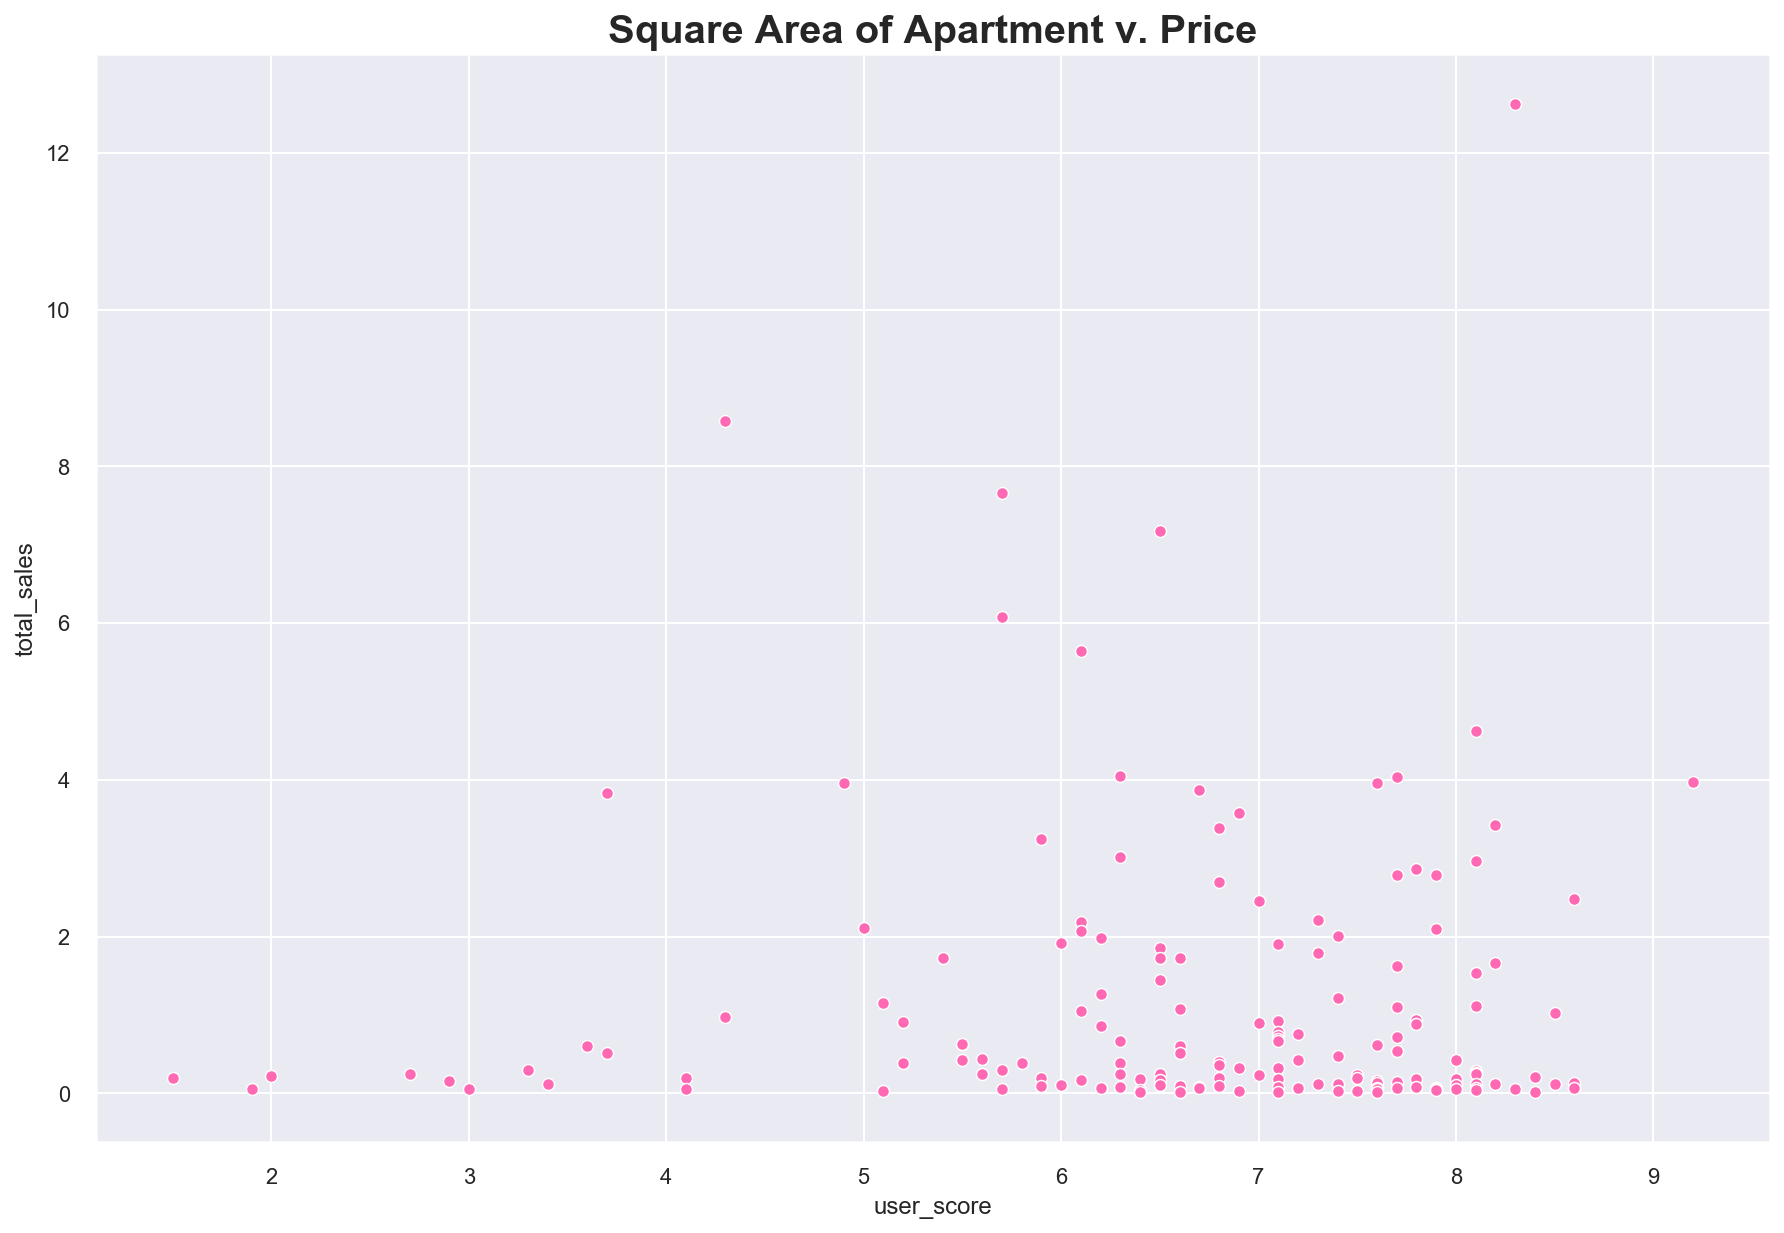

In [116]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='user_score', y='total_sales', data=recent_years[recent_years['platform'] == 'PS4'], color="#FF69B4")
plt.title("Square Area of Apartment v. Price", fontsize=20, fontweight='bold')
plt.show()

We can see that there is a weak positive relationship between user score and total sales for PS4. 

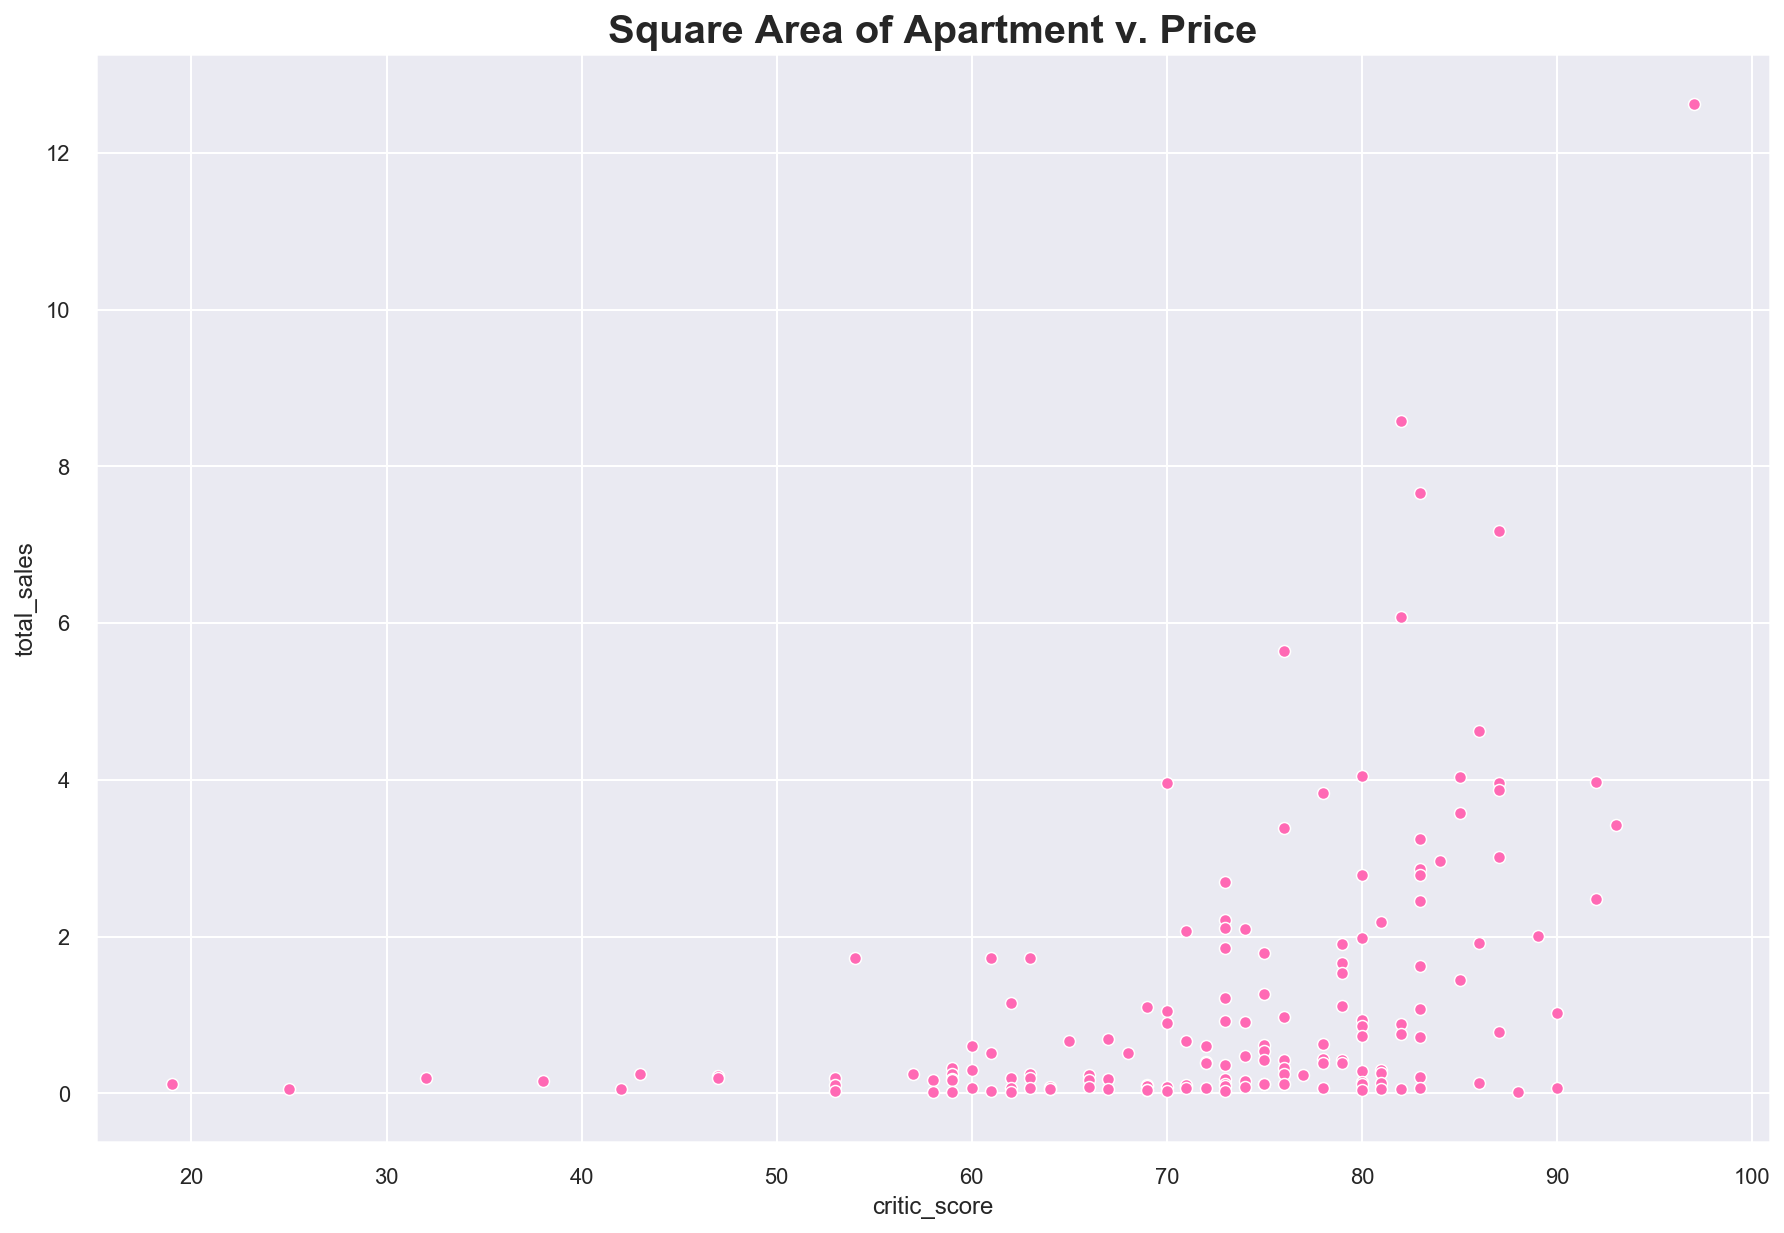

In [117]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='critic_score', y='total_sales', data=recent_years[recent_years['platform'] == 'PS4'], color="#FF69B4")
plt.title("Square Area of Apartment v. Price", fontsize=20, fontweight='bold')
plt.show()

There is also a weak positive relationship between critic score and total sales for PS4, although, we can see it increase more steadily with higher score than with user score. Let's look into how these scores and total sales are correlated.

In [118]:
ps4_corr = recent_years[recent_years['platform'] == 'PS4']

In [119]:
#dataframe without target variable: total_sales
only_predictors = ps4_corr[['user_score','critic_score']].dropna()

In [120]:
correlation = round(only_predictors.corr(), 2)
correlation

,user_score,critic_score
user_score,1.00,0.61
critic_score,0.61,1.00


Text(0.5, 1, 'Correlation Heatmap\n')

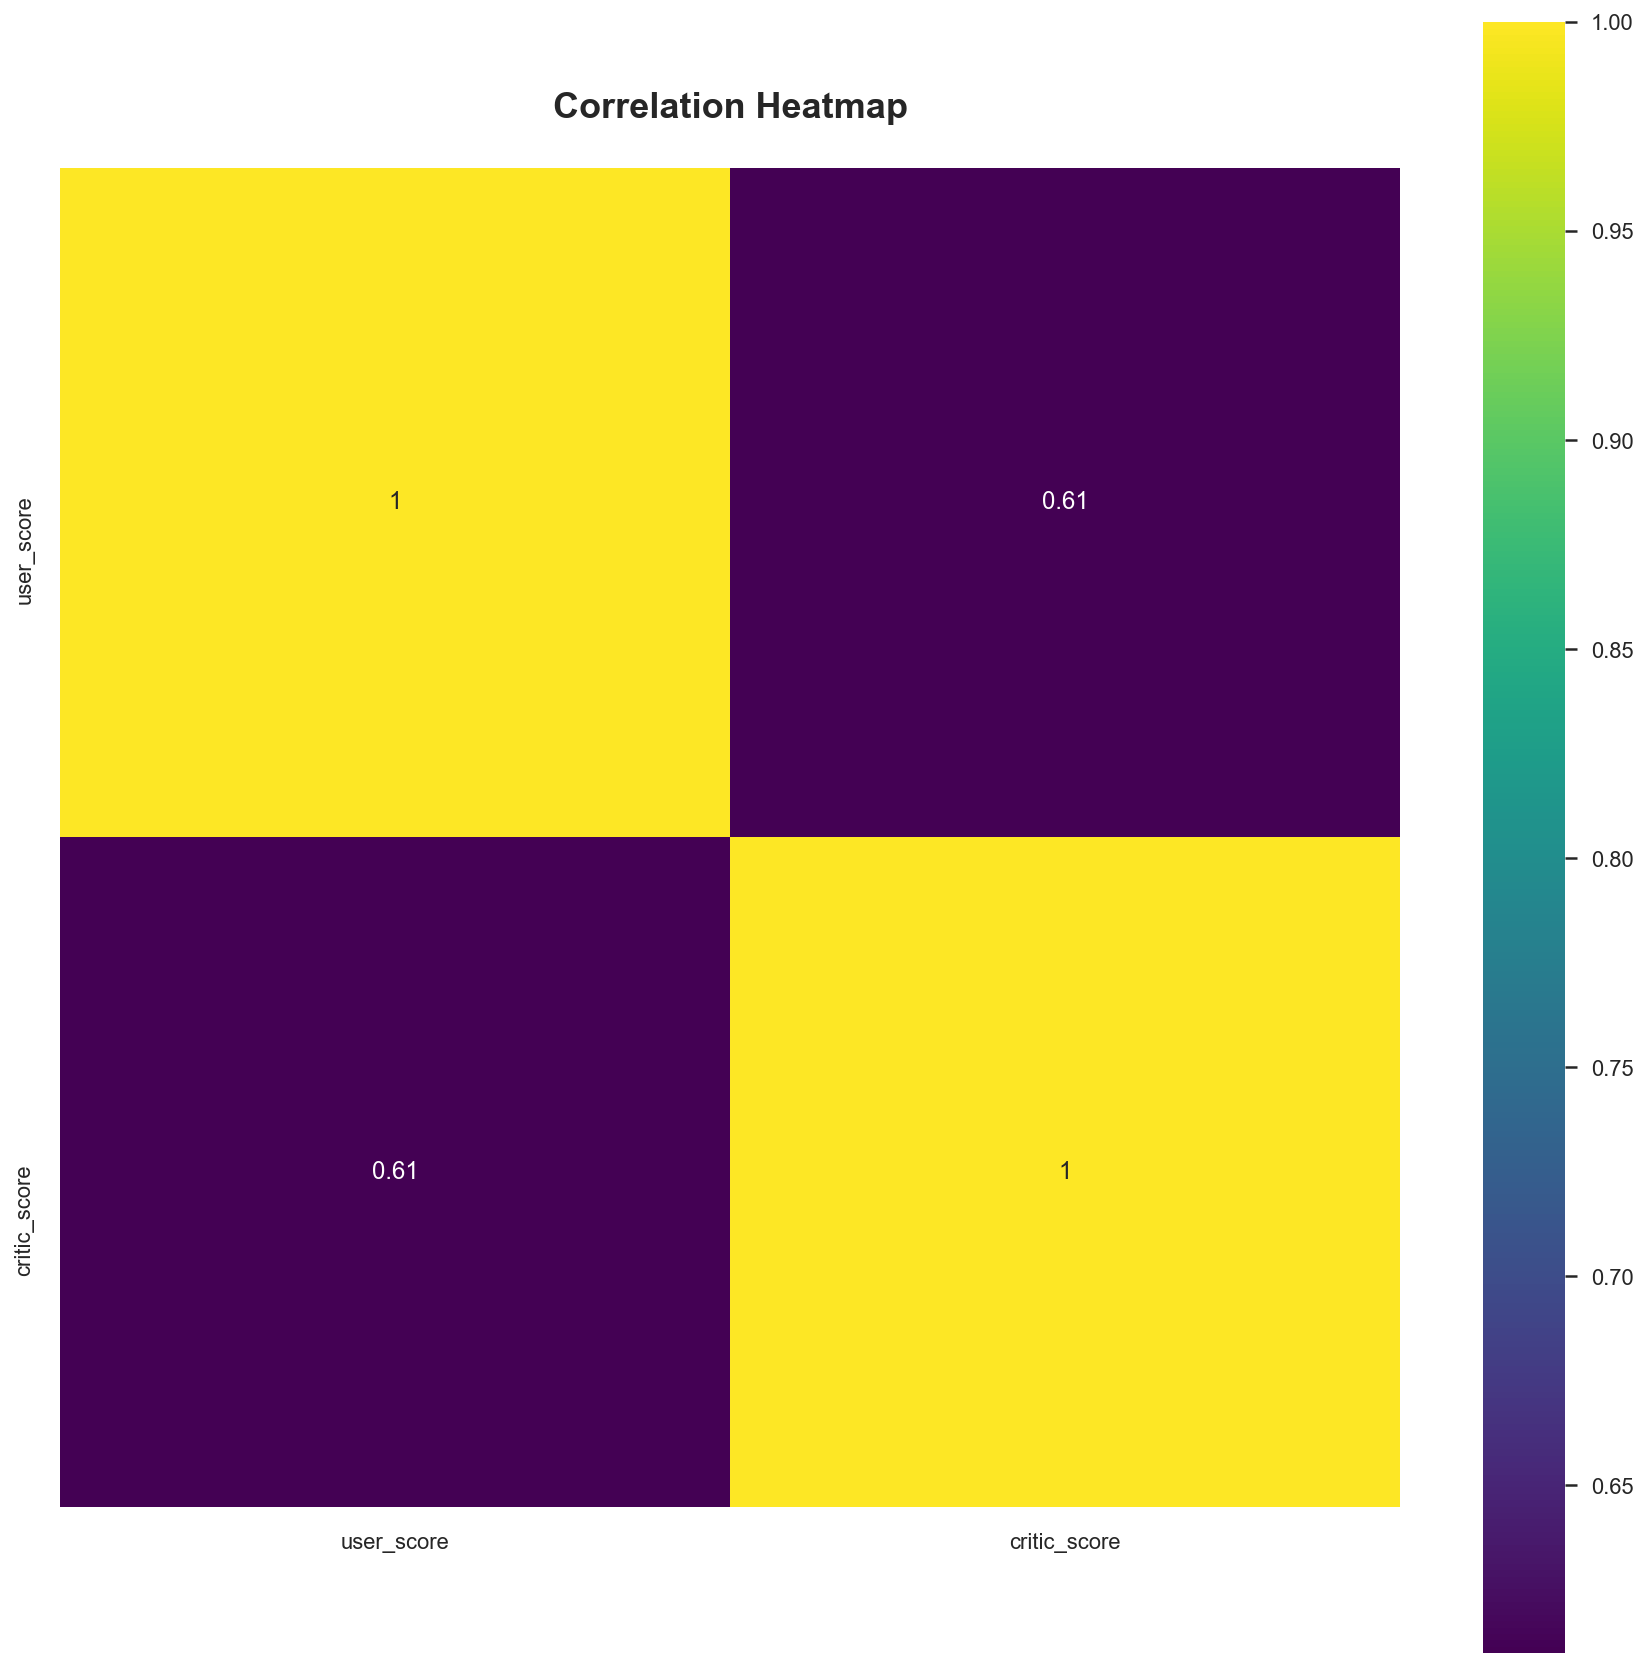

In [121]:
#correlation heatmap
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, annot = True, square=True, cmap = 'viridis')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=18)

User score and critic score are only loosely correlated with one another. 

In [122]:
#correlation matrix for all localities, st. petersburg and city center
corr_matrix = round(ps4_corr[['user_score','critic_score','total_sales']].dropna().corr(), 2)
corr_matrix['total_sales'].sort_values(ascending = False)

total_sales     1.00
critic_score    0.43
user_score      0.01
Name: total_sales, dtype: float64

From correlation matrix above, we can see that critic score and total sales are loosely connected. There is a weak negative correlation between user score and total sales, suggesting that as scores go up total sales go down (even though slightly). 

### Conclusion

Key insights about user scores and critic score affect on total sales for PS4:
* 📈 There is a weak positive correlation between critic score and total PS4 sales
    * 💰 Sales go up as critic score increases, although not strongly
* 📉 There is a weak negative correlation between user score and total PS4 sales
    * 💰 Sales go down ever so slightly with a higher user score
* 🔗 User score and critic score are loosely correlated at 0.56

[Back to Table of Contents](#table-of-contents)

## Task 7 <a name="task-7"></a>
### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

We will look at how sales of games vary across multiple platforms. Let's first choose all games that are sold on more than one platform.

In [123]:
multi_plats = set(recent_years.groupby(['name']).filter(lambda x: x.shape[0]>1)['name'])
same_games = recent_years.query('name in @multi_plats').groupby(['name','platform'])['total_sales'].agg(['sum']).sort_values(by='sum',ascending=False)
same_games = same_games[same_games['sum'] >= 5].reset_index()
same_games.head()

,name,platform,sum
0,Grand Theft Auto V,PS3,21.05
1,Grand Theft Auto V,X360,16.27
2,Call Of Duty: Black Ops 3,PS4,14.63
3,Call Of Duty: Black Ops Ii,PS3,13.79
4,Call Of Duty: Black Ops Ii,X360,13.68


In [124]:
multi_platforms_10 = list(set(same_games['name'].head(14)))

The top 10 games with highest total sales are 'Call Of Duty: Ghosts', 'Call Of Duty: Black Ops Ii', 'Grand Theft Auto V',
 'Minecraft', 'Fifa 17', 'Star Wars Battlefront (2015)', 'Call Of Duty: Advanced Warfare', 'Call Of Duty: Black Ops 3',
 'Fifa 16', 'Fifa Soccer 13'

In [125]:
recent_years.query('name in @multi_platforms_10').groupby(['name','platform'])['total_sales'].agg(['sum'])

sum
name                                platform       
Call Of Duty: Advanced Warfare      PC         0.41
                                    PS3        4.36
                                    PS4        7.66
                                    X360       4.28
                                    XOne       5.26
Call Of Duty: Black Ops 3           PC         0.26
                                    PS3        1.69
                                    PS4       14.63
                                    X360       1.70
                                    XOne       7.39
Call Of Duty: Black Ops Ii          PC         1.52
                                    PS3       13.79
                                    WiiU       0.41
                                    X360      13.68
Call Of Duty: Ghosts                PC         0.69
                                    PS3        9.36
                                    PS4        3.83
                                    WiiU       0.35
                                    X360      10.24
                                    XOne       2.92
Fifa 16                             PC         0.20
                                    PS3        2.70
                                    PS4        8.58
                                    X360       1.57
                                    XOne       3.25
Fifa Soccer 13                      3DS        0.29
                                    PC         0.40
                                    PS3        8.17
                                    PSP        0.34
                                    PSV        0.44
                                    Wii        0.69
                                    WiiU       0.48
                                    X360       5.16
Grand Theft Auto V                  PC         1.17
                                    PS3       21.05
                                    PS4       12.62
                                    X360      16.27
                                    XOne       5.47
Minecraft                           PS3        5.27
                                    PS4        4.32
                                    PSV        1.96
                                    WiiU       0.67
                                    X360       9.18
                                    XOne       2.76
Star Wars Battlefront (2015)        PC         0.55
                                    PS4        7.98
                                    XOne       3.66
Super Smash Bros. For Wii U And 3Ds 3DS        7.55
                                    WiiU       4.87

We can see that the total sales for these games varies across each platform. 

### Conclusion

Key insights about total sales of games on multiple platforms:
* 💎 Total sales do vary across platforms

[Back to Table of Contents](#table-of-contents)

## Task 8<a name="task-8"></a>
### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

We will look at total sales by genre and look into which genres are most and least profitable.

In [126]:
genres = recent_years.groupby(['genre'])['total_sales'].agg(['count','sum','mean']).sort_values(by='sum', ascending=False).reset_index()
genres

,genre,count,sum,mean
0,Action,853,412.15,0.483177
1,Shooter,191,266.53,1.395445
2,Role-Playing,284,163.49,0.575669
3,Sports,220,155.08,0.704909
4,Misc,160,83.23,0.520188
5,Platform,65,55.08,0.847385
6,Racing,86,44.97,0.522907
7,Fighting,89,39.24,0.440899
8,Simulation,61,33.21,0.544426
9,Adventure,243,26.46,0.108889


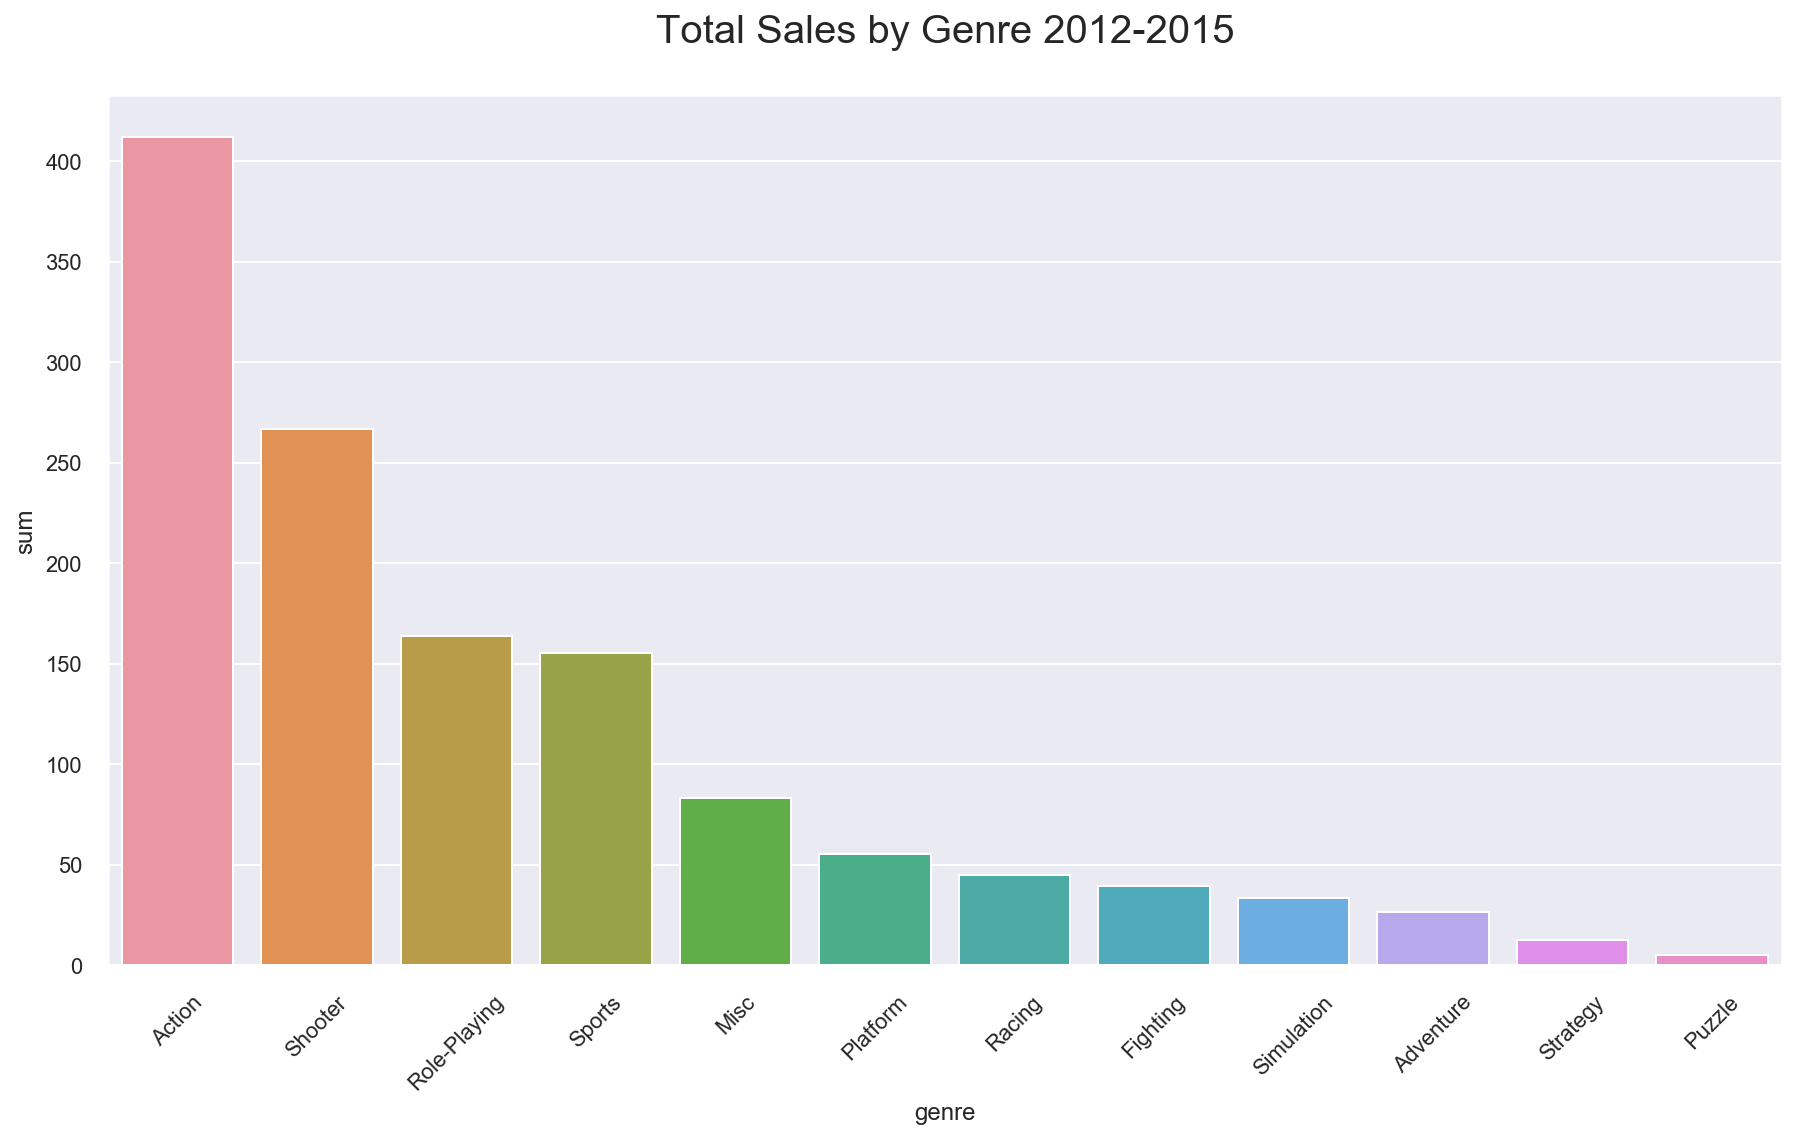

In [127]:
plt.figure(figsize=(15,8))
sns.barplot(x=genres['genre'],y=genres['sum'])
plt.xticks(rotation=45)
plt.title('Total Sales by Genre 2012-2015\n', fontsize=20)
plt.show()

Action is the highest grossing genre. It also has the most release from 2012-2015. Shooter games are higher grossing than Role-playing, Sports and Adventure games, even though they have more releases. Puzzle games have the lowest total sales. 

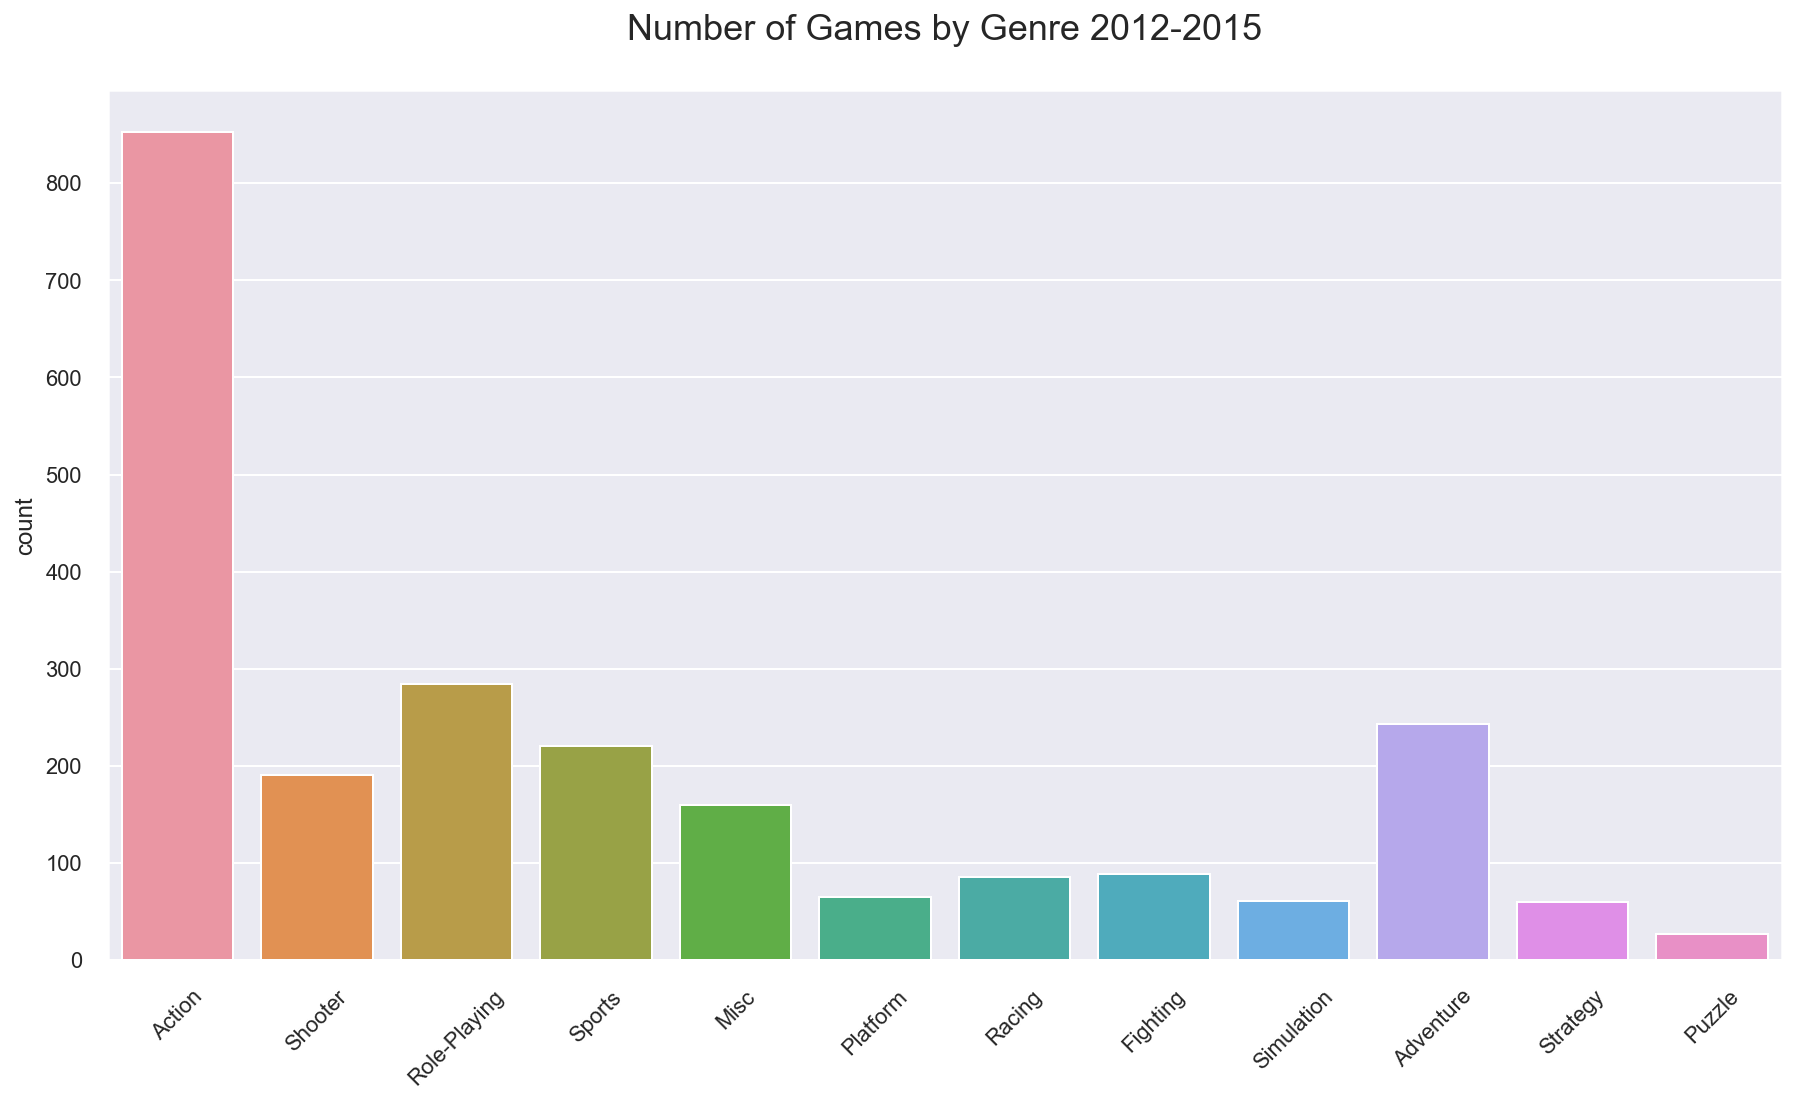

In [128]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(x=genres['genre'], y=genres['count']).set(xlabel=None)
plt.title(label='Number of Games by Genre 2012-2015' + '\n', fontsize=18)
plt.show()

Action, Role-playing and adventure games have the highest number of releases over 2012-2015.

Here we take a look at which games in each genre are the highest grossing. 

In [129]:
genres_and_names = recent_years.groupby(['genre','name'])['total_sales'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index()
genres_and_names.head(10)

,genre,name,sum
0,Action,Grand Theft Auto V,56.58
1,Shooter,Call Of Duty: Black Ops Ii,29.40
2,Shooter,Call Of Duty: Ghosts,27.39
3,Shooter,Call Of Duty: Black Ops 3,25.67
4,Misc,Minecraft,24.16
5,Shooter,Call Of Duty: Advanced Warfare,21.97
6,Sports,Fifa 15,17.37
7,Sports,Fifa 14,16.46
8,Sports,Fifa 16,16.30
9,Action,Fifa Soccer 13,15.97


In [130]:
genre_names = list(recent_years['genre'].unique())
top_game_genre = []
for genre in genre_names:
    top_game_genre.append(genres_and_names.iloc[genres_and_names.loc[genres_and_names['genre']==genre]['sum'].idxmax()])
top_game_genre = pd.DataFrame(top_game_genre).reset_index(drop=True)
top_game_genre

,genre,name,sum
0,Action,Grand Theft Auto V,56.58
1,Shooter,Call Of Duty: Black Ops Ii,29.40
2,Role-Playing,Pokemon X/Pokemon Y,14.60
3,Platform,New Super Mario Bros. 2,9.90
4,Misc,Minecraft,24.16
5,Simulation,Animal Crossing: New Leaf,9.17
6,Sports,Fifa 15,17.37
7,Fighting,Super Smash Bros. For Wii U And 3Ds,12.42
8,Racing,Mario Kart 8,7.09
9,Strategy,Xcom: Enemy Unknown,1.90


### Conclusion

Key insights about total sales by genre:
* 🏆 Action is the highest grossing genre
    * 🎮 Grand Theft Auto made $56.58M$ USD in total sales
* 🔫 Shooter games are second highest grossing
* ⚽ Role-playing and Sports have almost equal total sales, even though Role-playing games have more releases

Below is the highest grossing game in each genre:

| Genre       | Name | Total Sales |
|-----------------|-------|---------|
| Action            | Grand Theft Auto V | 56.58 |
| Shooter     | Call Of Duty: Black Ops II | 29.4 |
| Role-Playing    | Pokemon X/Pokemon Y | 14.6 |
| Platform   | New Super Mario Bros. 2 | 9.9 |
| Misc    | Minecraft | 24.16 |
| Simulation     | Call Of Duty: Black Ops II | 29.4 |
| Sports  | Fifa 15 | 17.37 |
| Fighting     | Super Smash Bros. For Wii U And 3Ds | 12.42 |
| Racing    | Mario Kart 8 | 7.09 |
| Shooter     | Call Of Duty: Black Ops II | 29.4 |
| Strategy     | Xcom: Enemy Unknown| 1.9 |
| Puzzle    | Captain Toad: Treasure Tracker | 1.19 |

[Back to Table of Contents](#table-of-contents)

## Task 9<a name="task-9"></a>
### Create a user profile for each region (NA, EU, JP). For each region determine: The top five platforms. Describe variations in their market shares from region to region. The top five genres. Explain the difference. Do ESRB ratings affect sales in individual regions?

We will look at how sales, ESRB ratings and top platforms vary from region to region. We will focus in on North America, Europe and Japan. 

,na_sales
platform,
X360,138.07
PS3,100.07
PS4,86.88
XOne,78.89
3DS,50.08


,eu_sales
platform,
PS4,109.41
PS3,103.01
X360,72.68
XOne,41.94
3DS,38.94


,jp_sales
platform,
3DS,75.76
PS3,32.48
PSV,16.40
WiiU,12.16
PSP,10.94


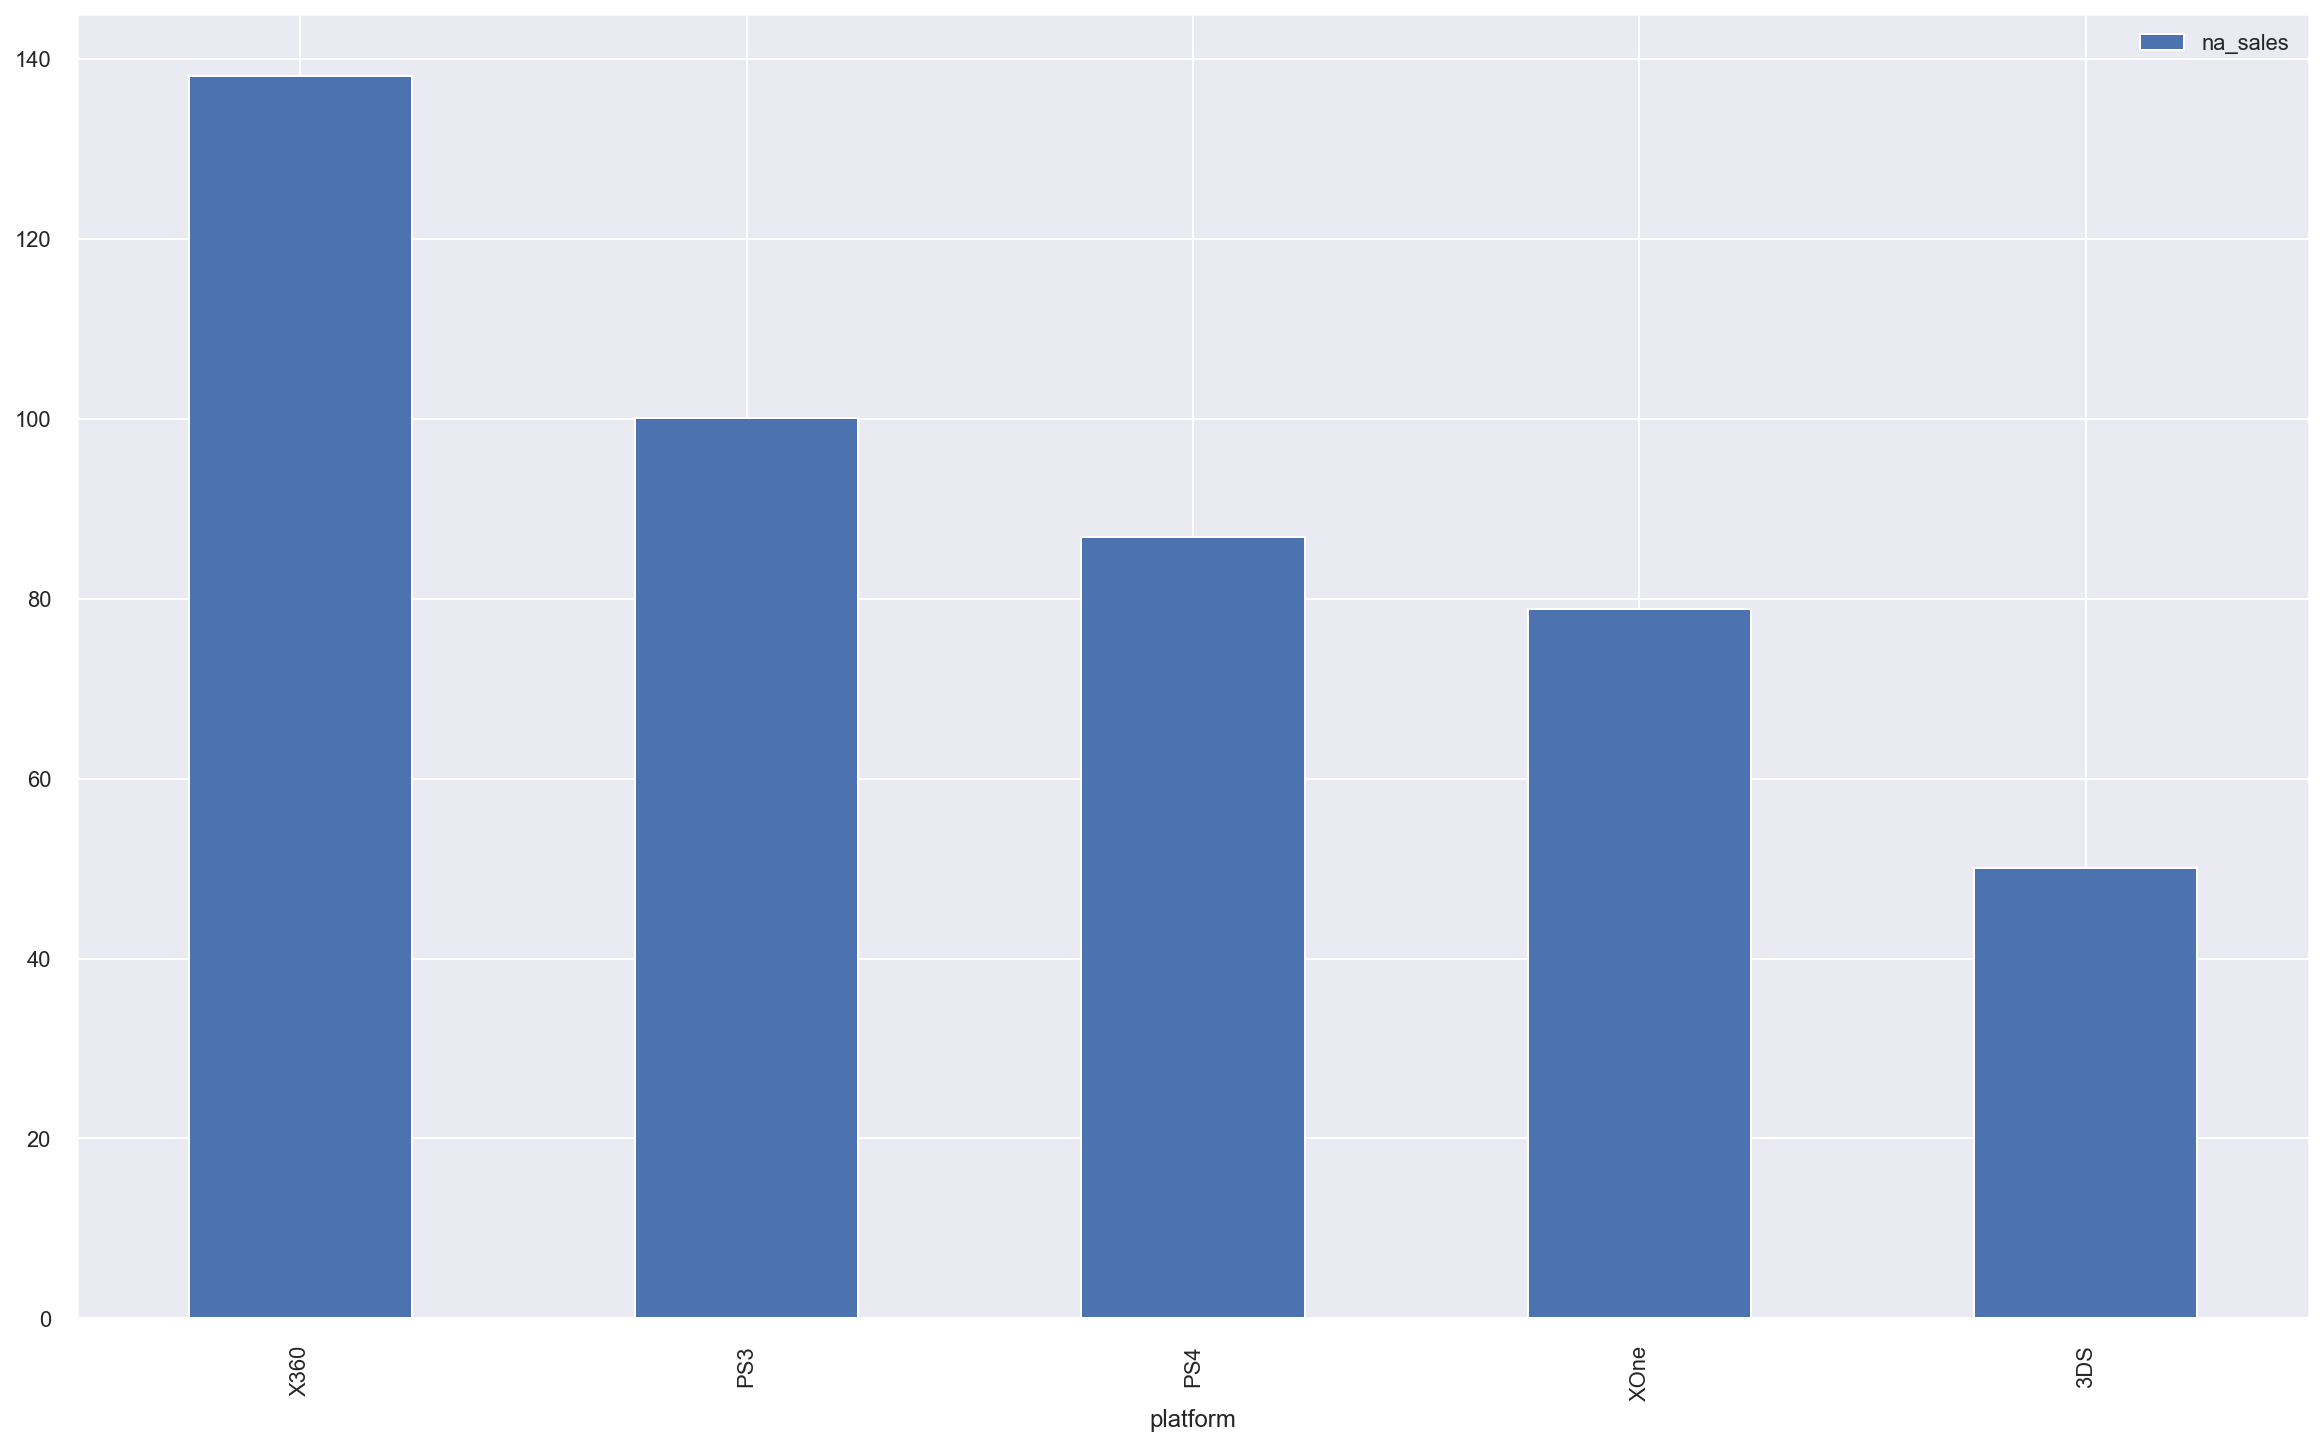

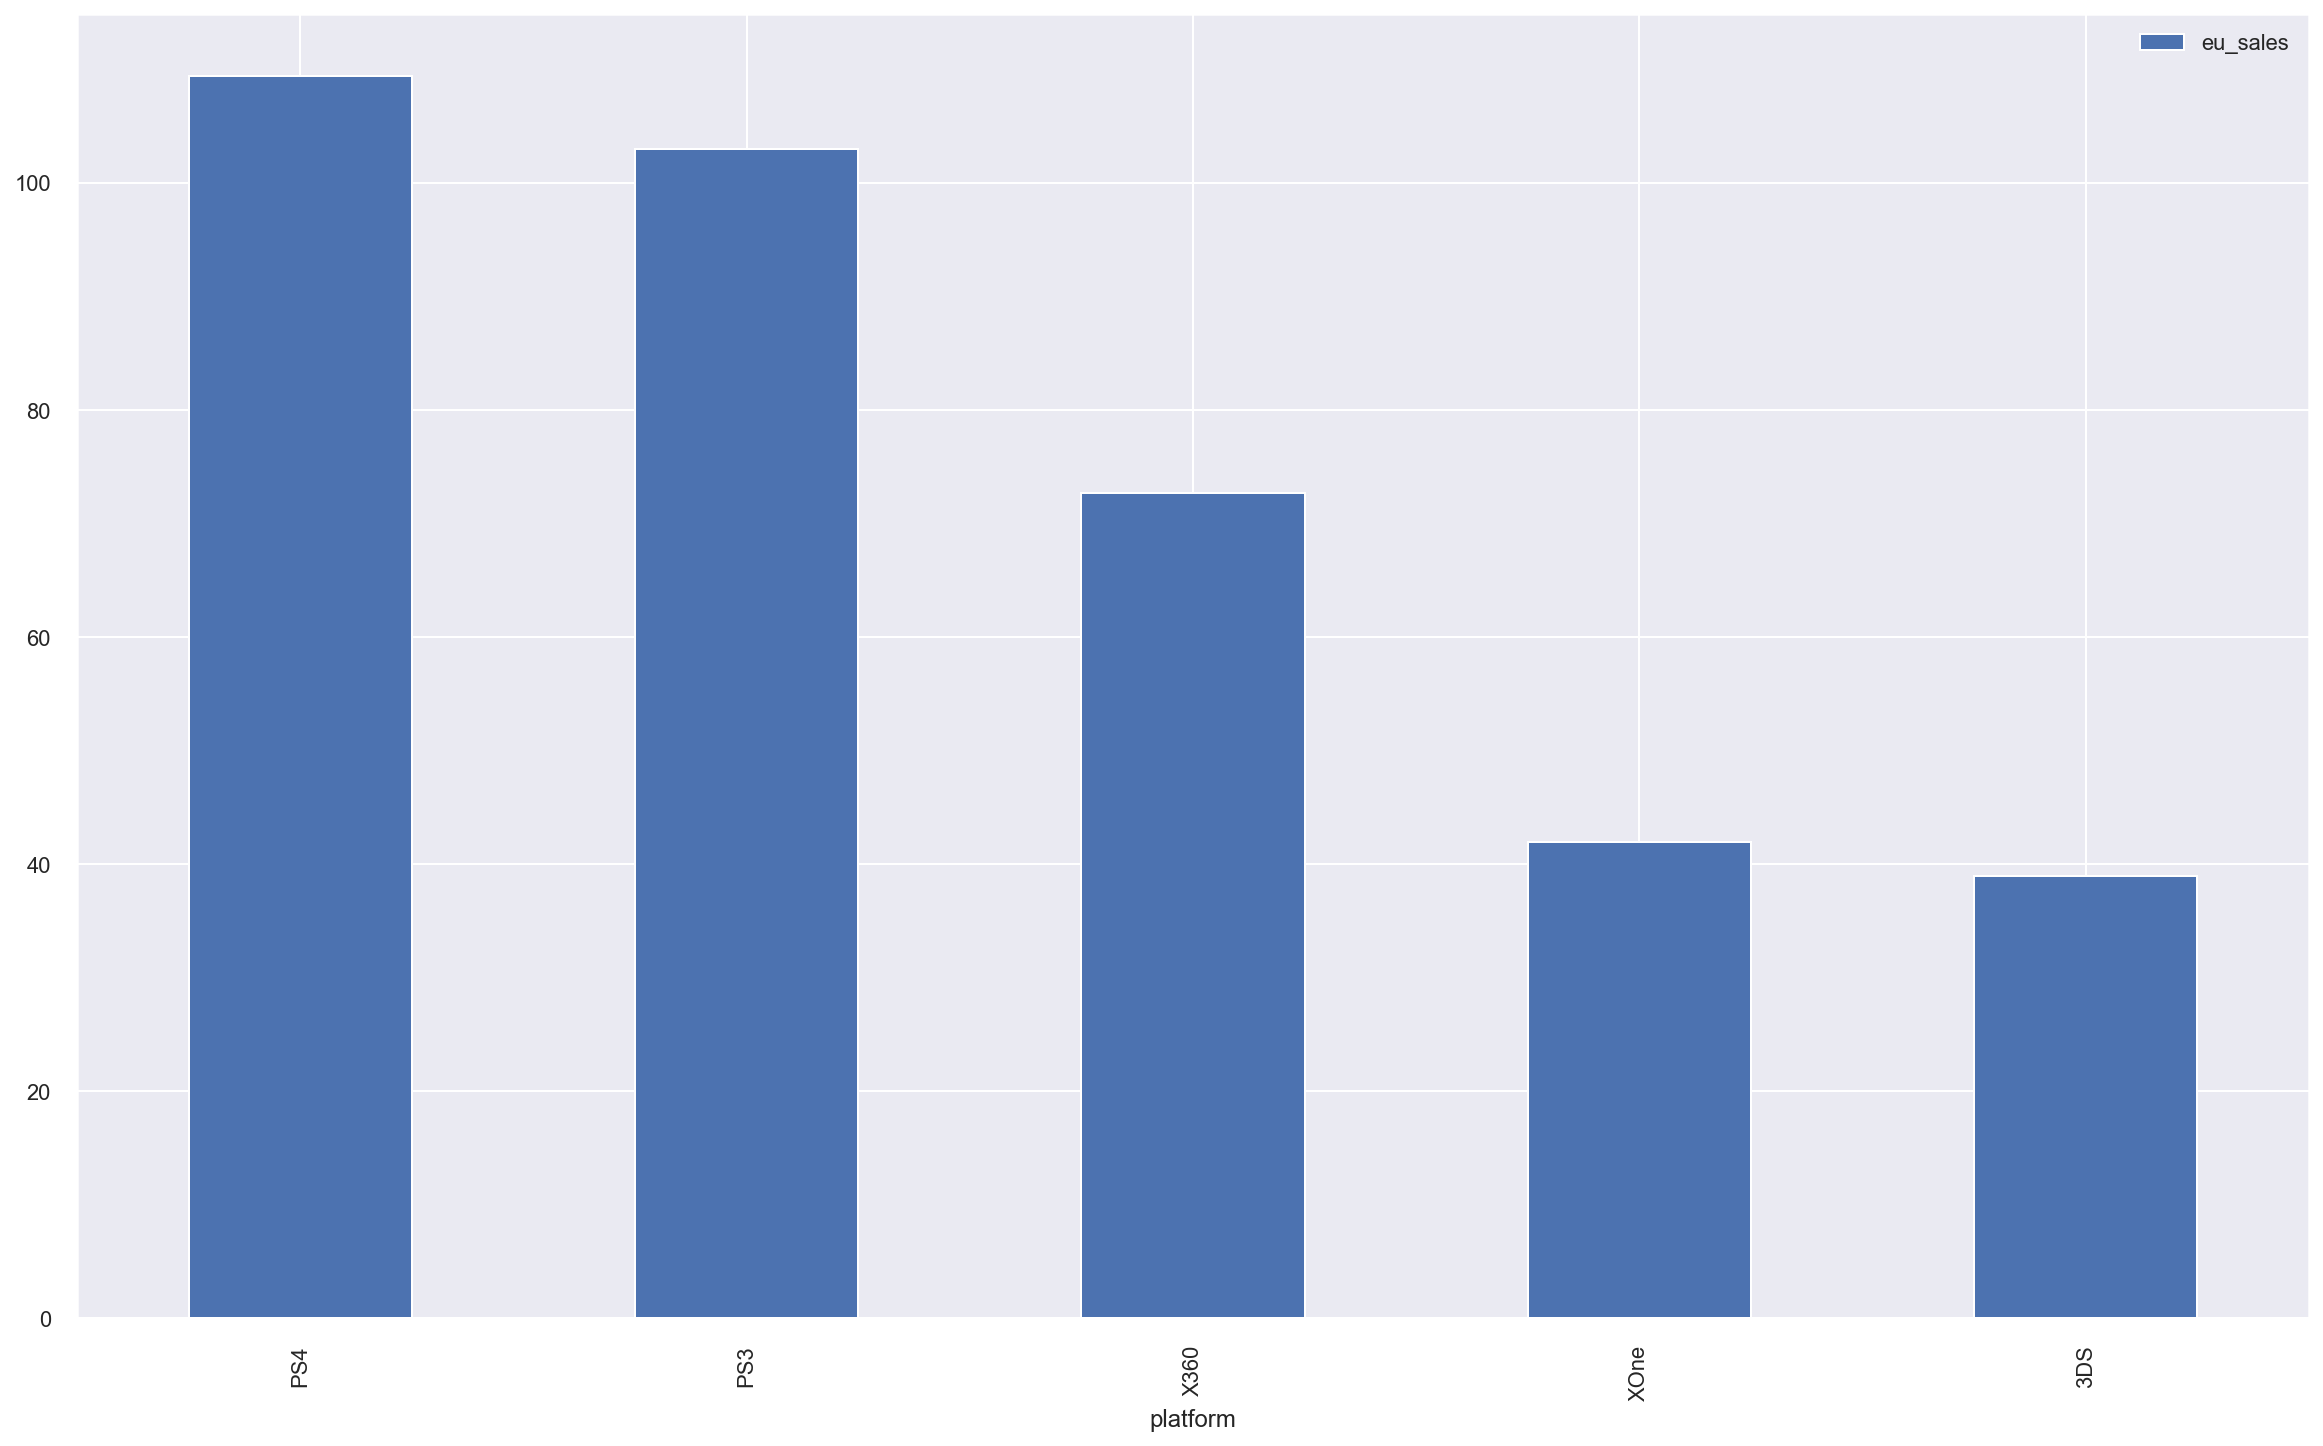

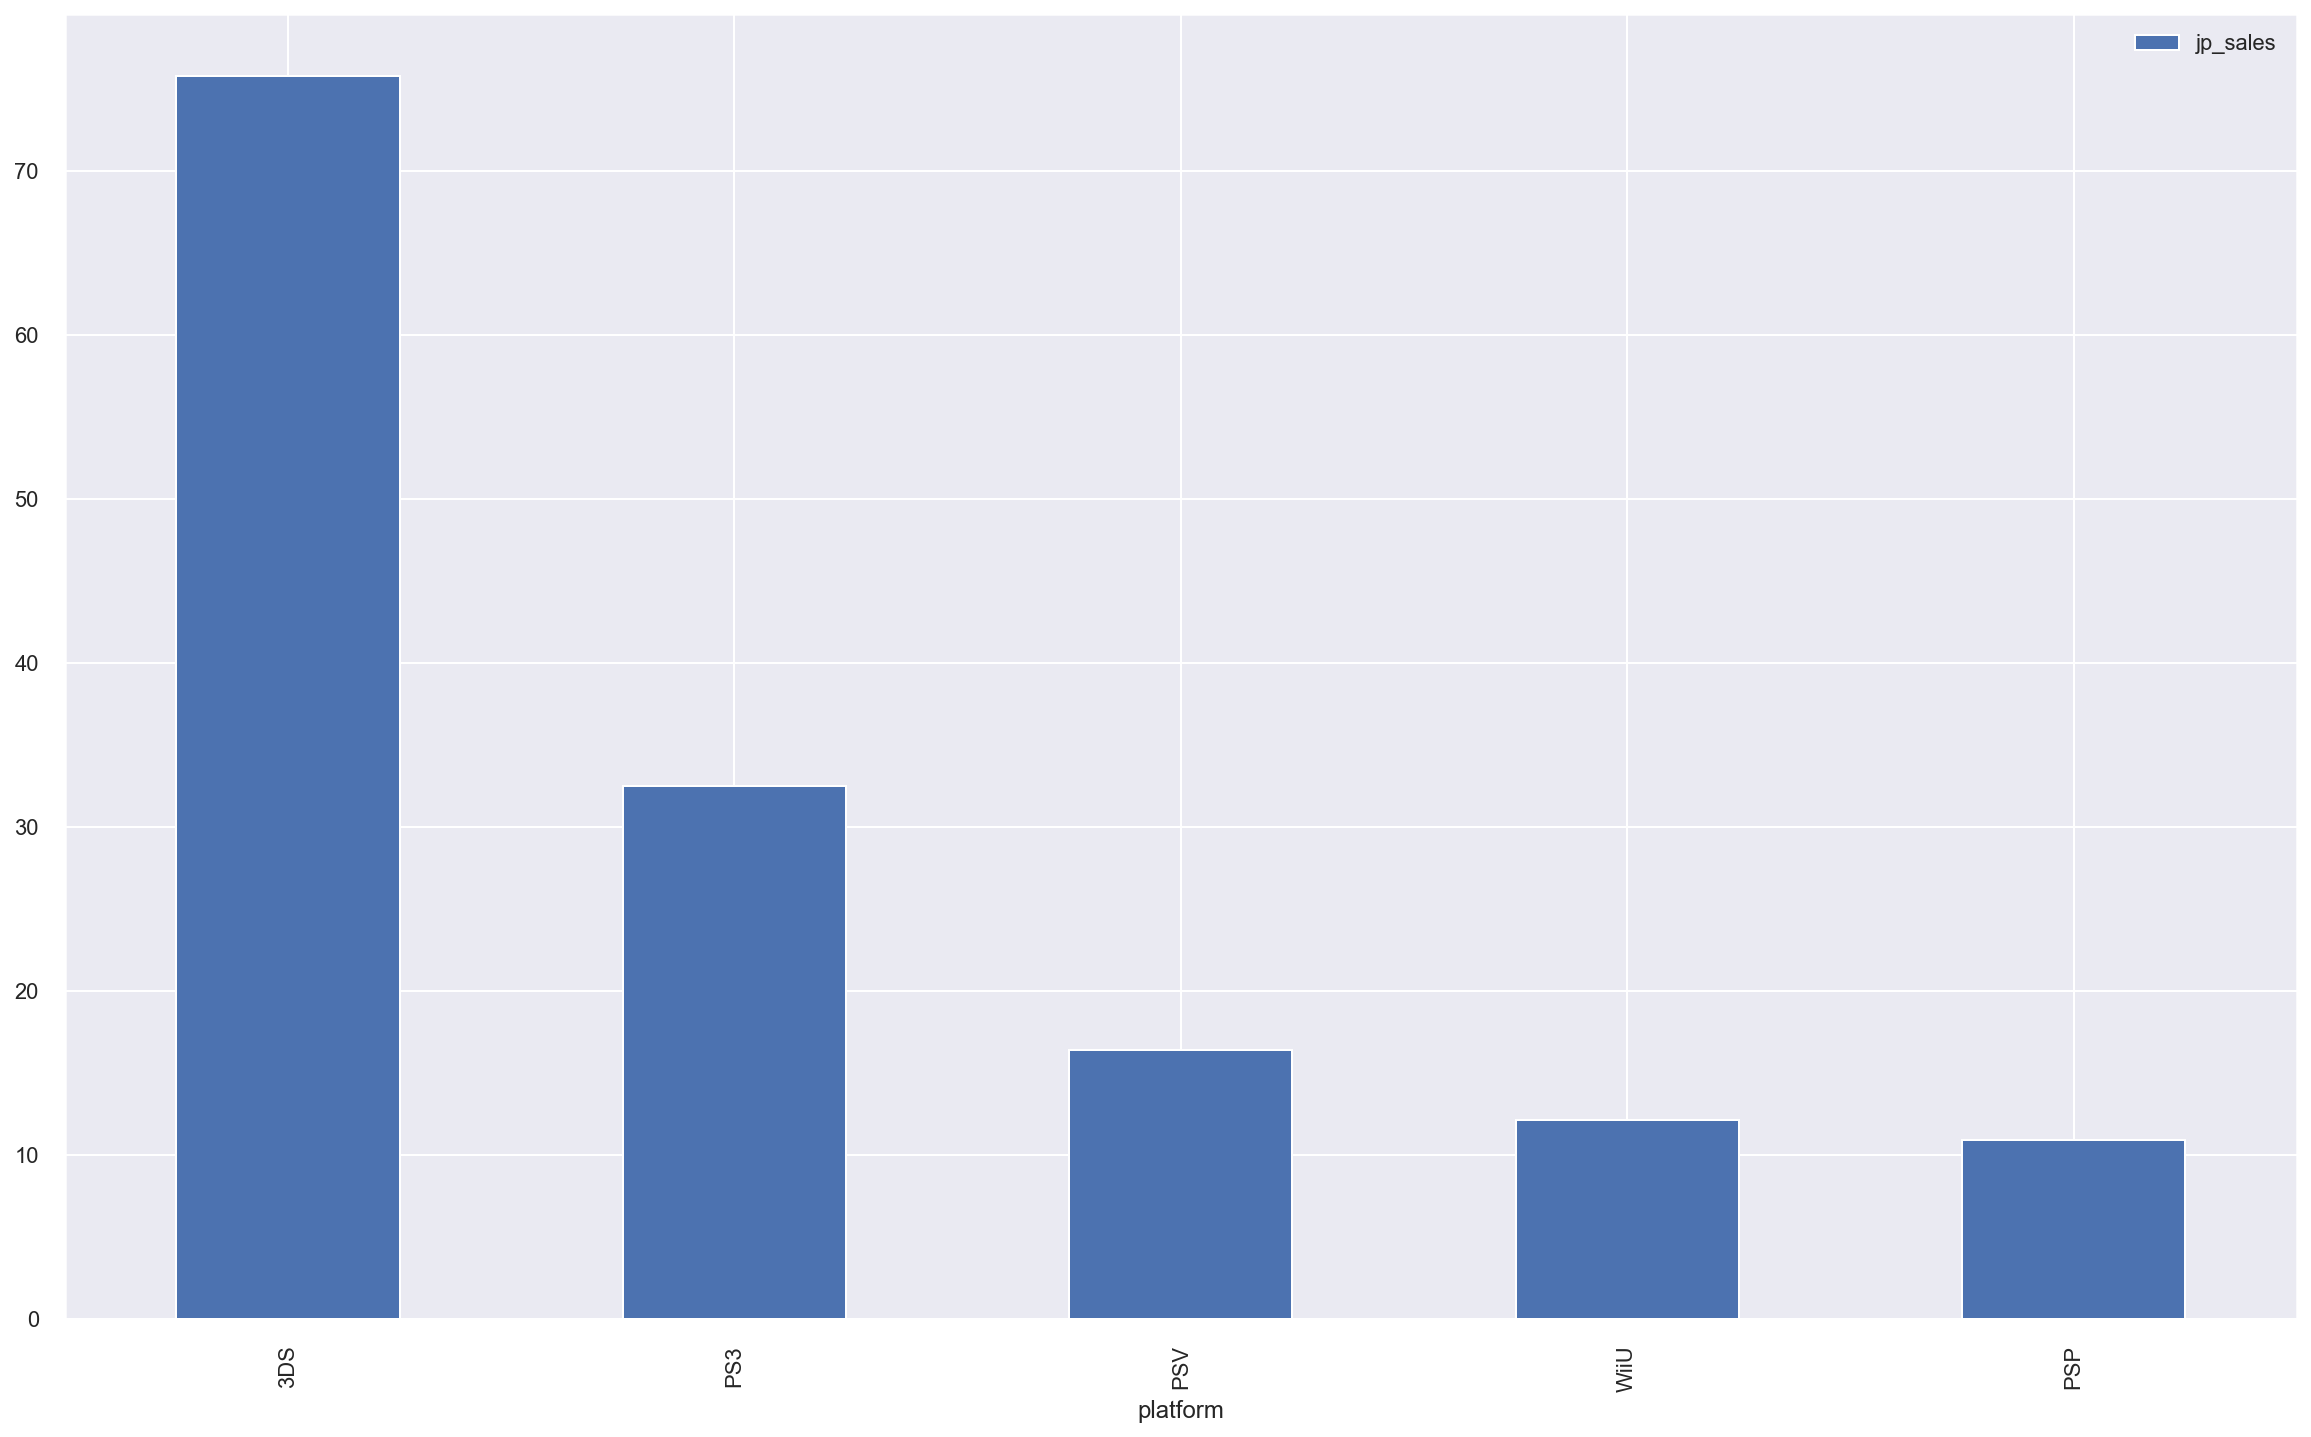

In [131]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    display(recent_years.pivot_table(index='platform',values=region,aggfunc='sum')\
                        .sort_values(by=region,ascending=False).head())
    recent_years.pivot_table(index='platform',values=region,aggfunc='sum')\
                        .sort_values(by=region,ascending=False).head().plot(kind='bar')

The top platform in North America is X360. In Europe its PS4, and is Japan its 3DS.

,na_sales
genre,
Action,169.07
Shooter,128.60
Sports,73.46
Role-Playing,54.60
Misc,37.62


,eu_sales
genre,
Action,149.73
Shooter,97.52
Sports,55.92
Role-Playing,42.21
Misc,25.81


,jp_sales
genre,
Role-Playing,54.18
Action,45.07
Misc,12.24
Simulation,10.06
Fighting,8.66


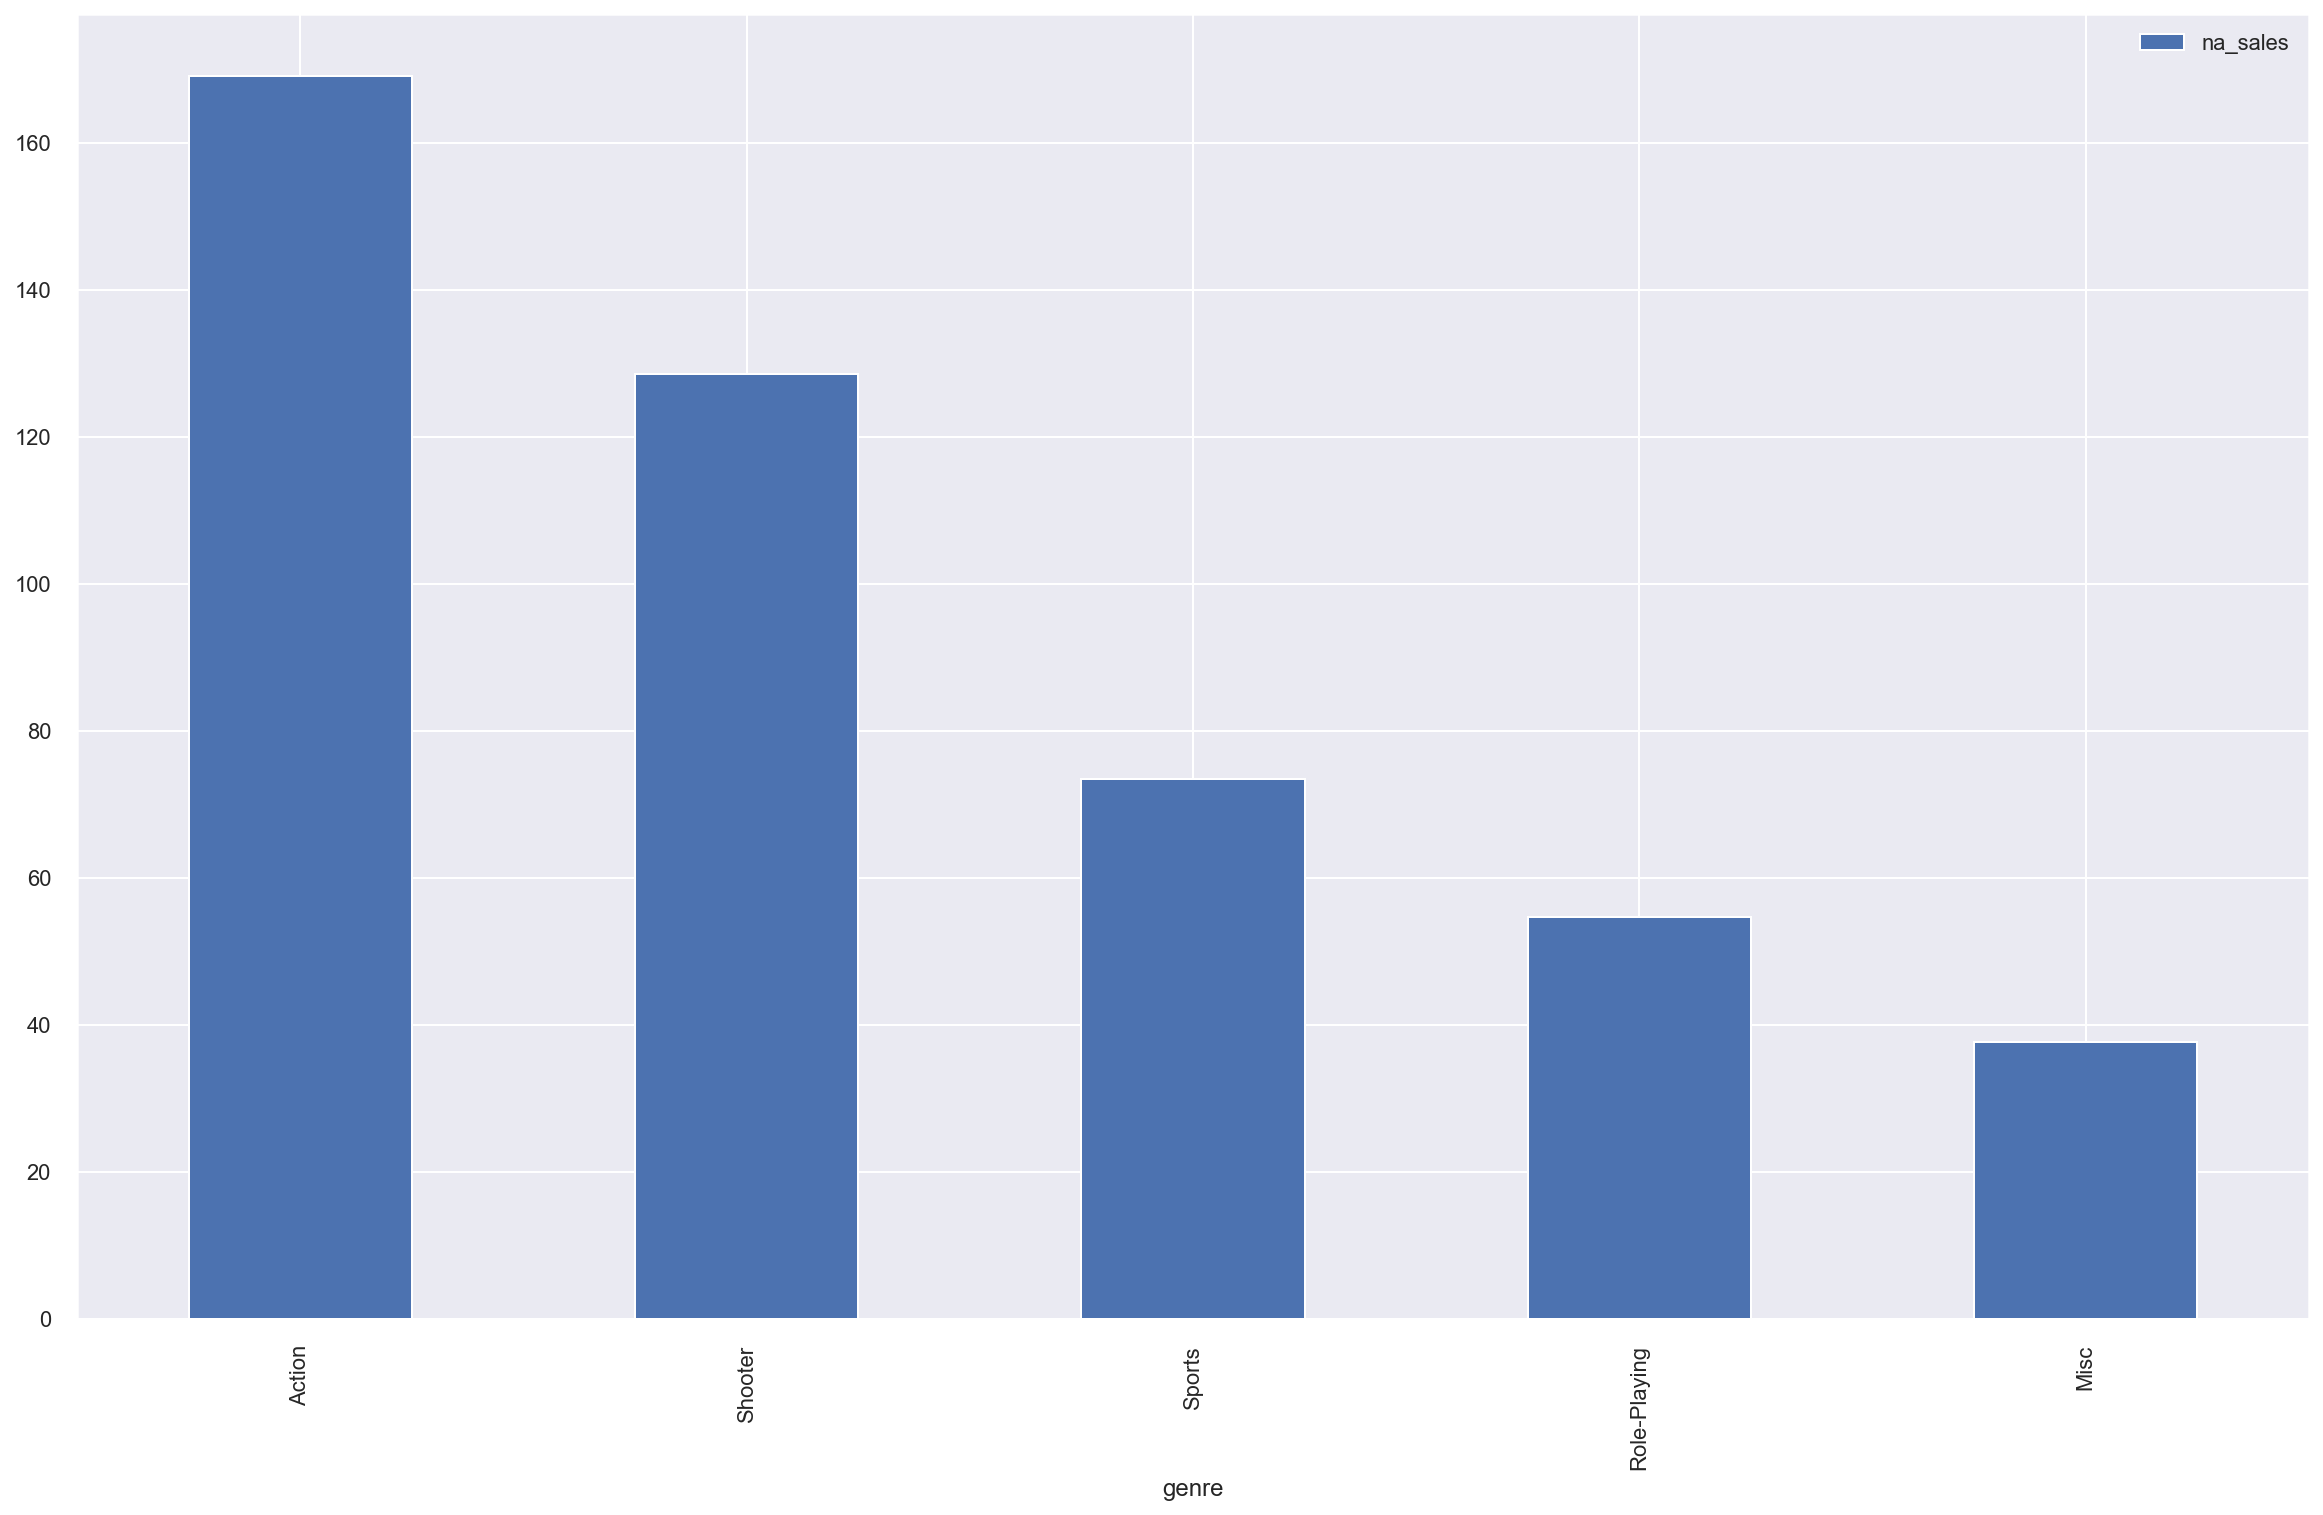

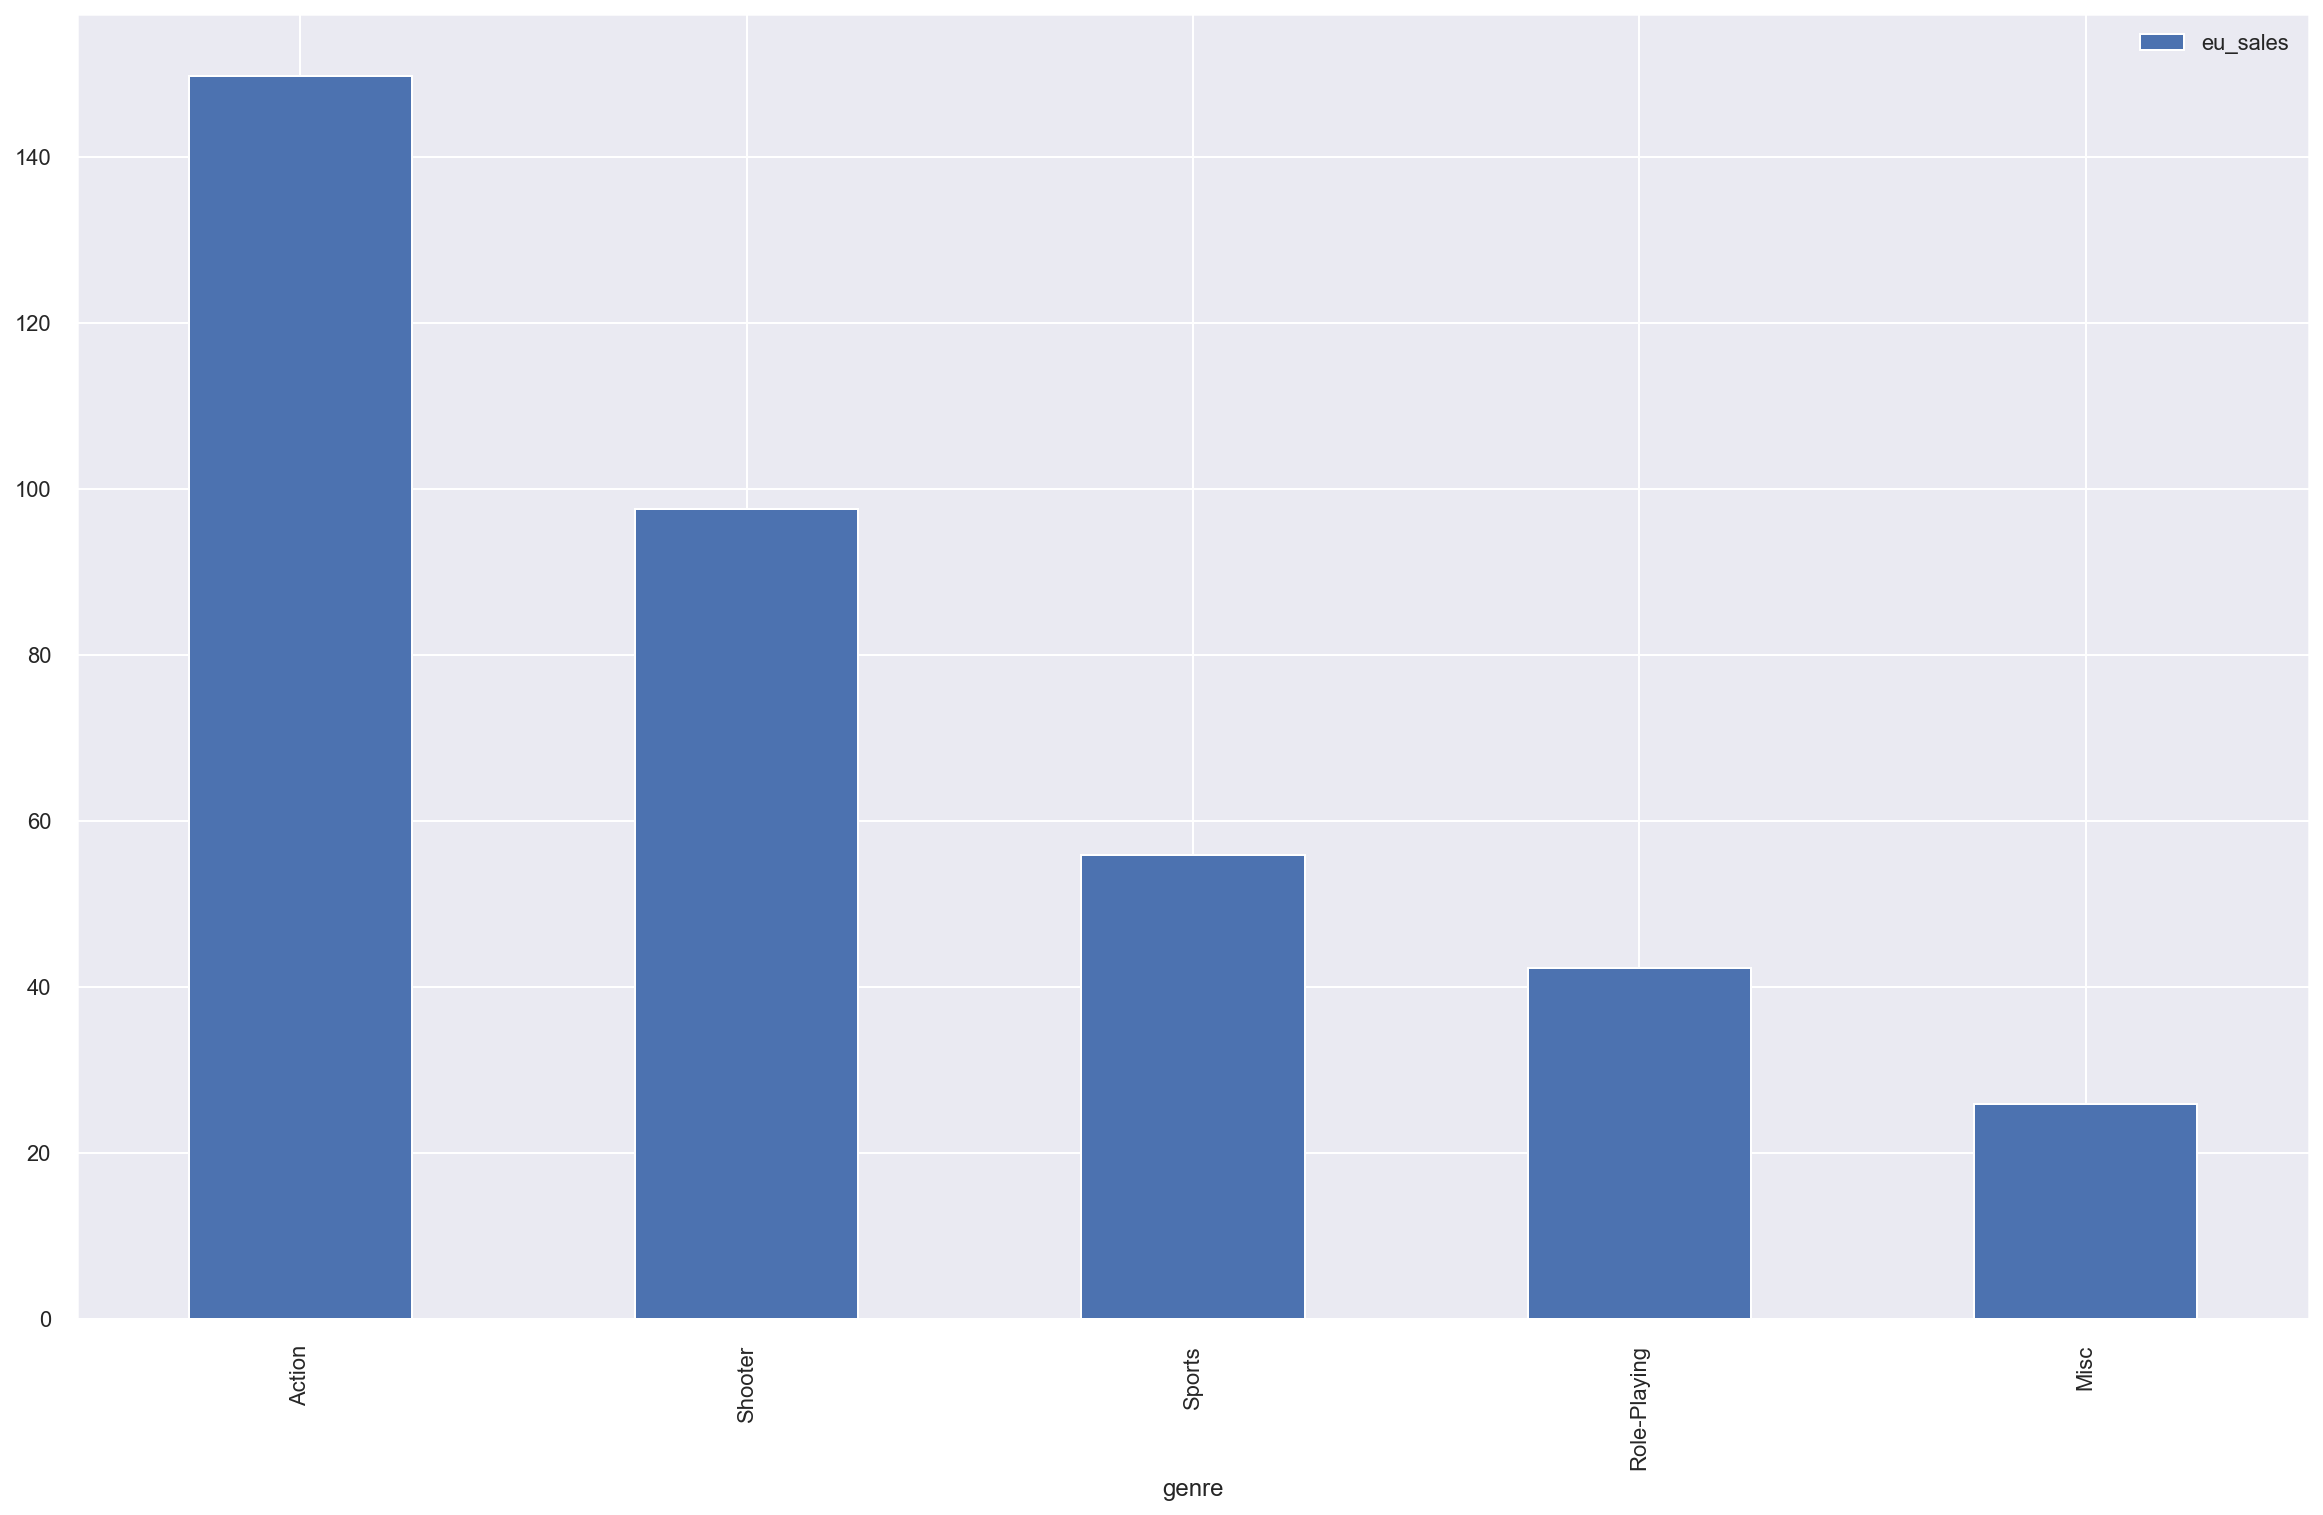

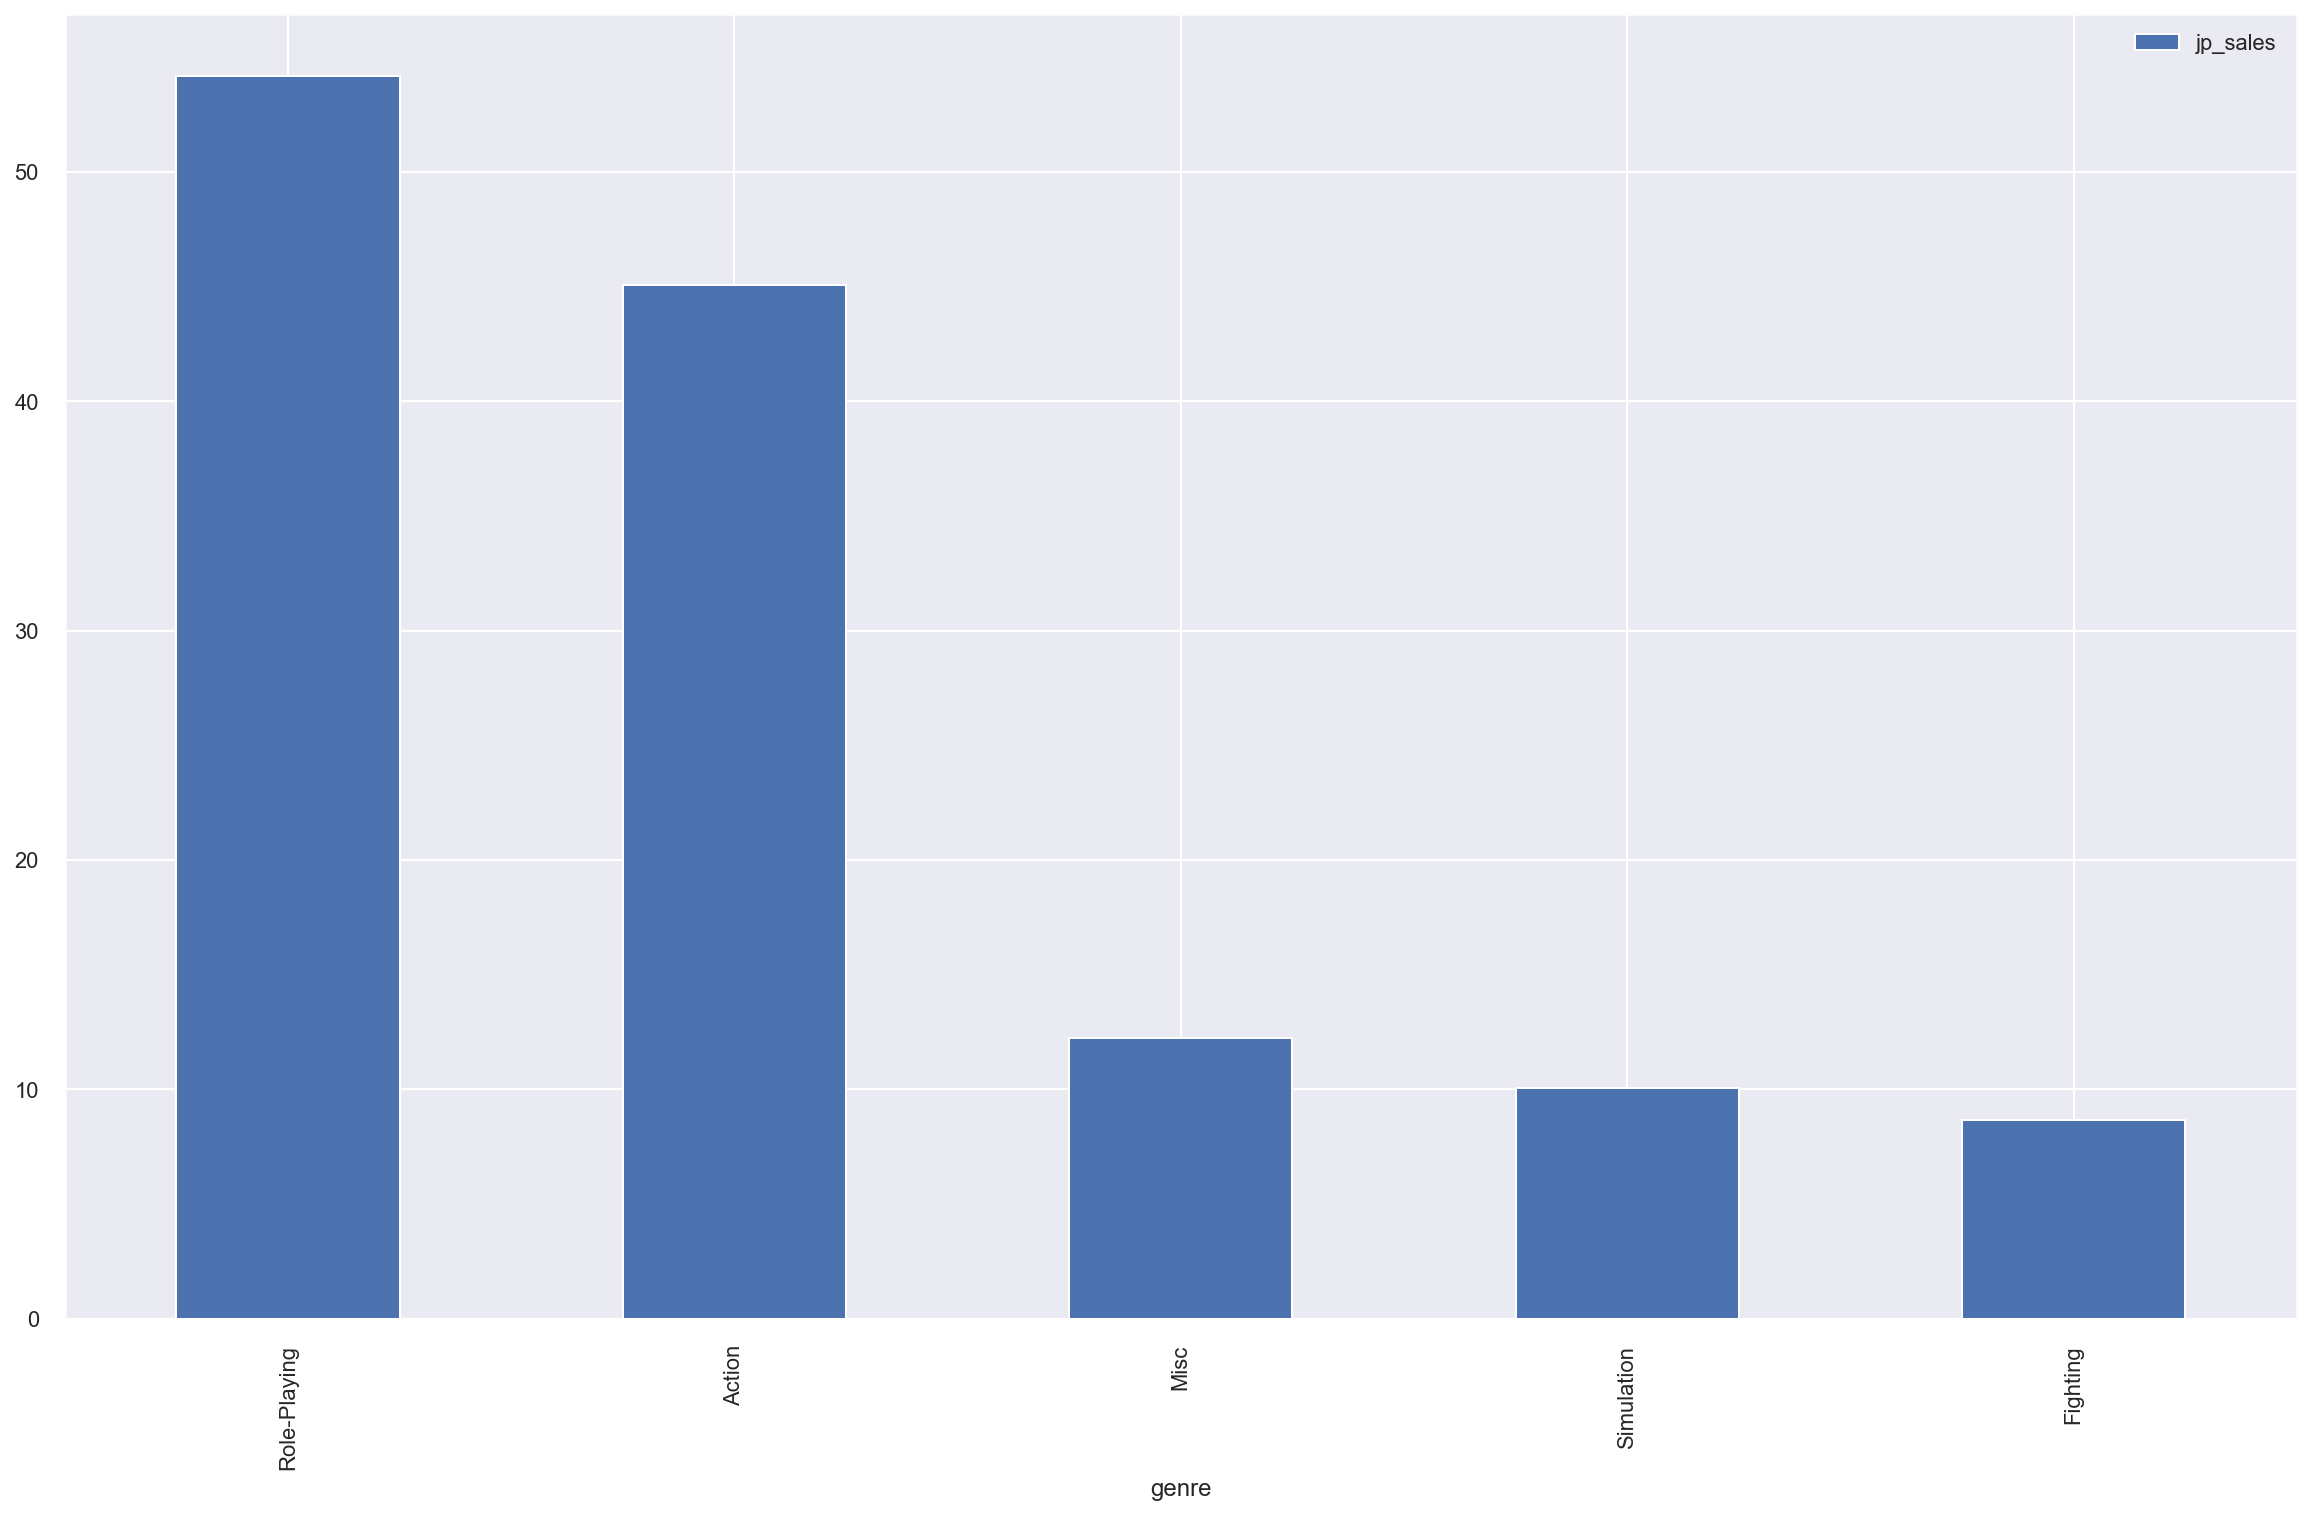

In [132]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    display(recent_years.pivot_table(index='genre',values=region,aggfunc='sum')\
                        .sort_values(by=region,ascending=False).head())
    recent_years.pivot_table(index='genre',values=region,aggfunc='sum')\
                        .sort_values(by=region,ascending=False).head().plot(kind='bar')

In North America and Europe, action and shooter games are first and second highest grossing respectively. In Japan, Role-playing games are first, followed by action. 

In [133]:
na_ratings = recent_years.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_ratings = recent_years.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_ratings = recent_years.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
region_ratings = pd.concat([na_ratings, eu_ratings, jp_ratings], axis=1, keys=['NA Sales', 'EU Sales', 'JP Sales']).reset_index()
region_ratings

,index,NA Sales,EU Sales,JP Sales
0,M,215.06,177.43,19.92
1,E,106.05,98.88,26.96
2,unknown,88.54,78.34,89.78
3,E10+,73.97,52.99,7.74
4,T,56.29,42.47,22.65


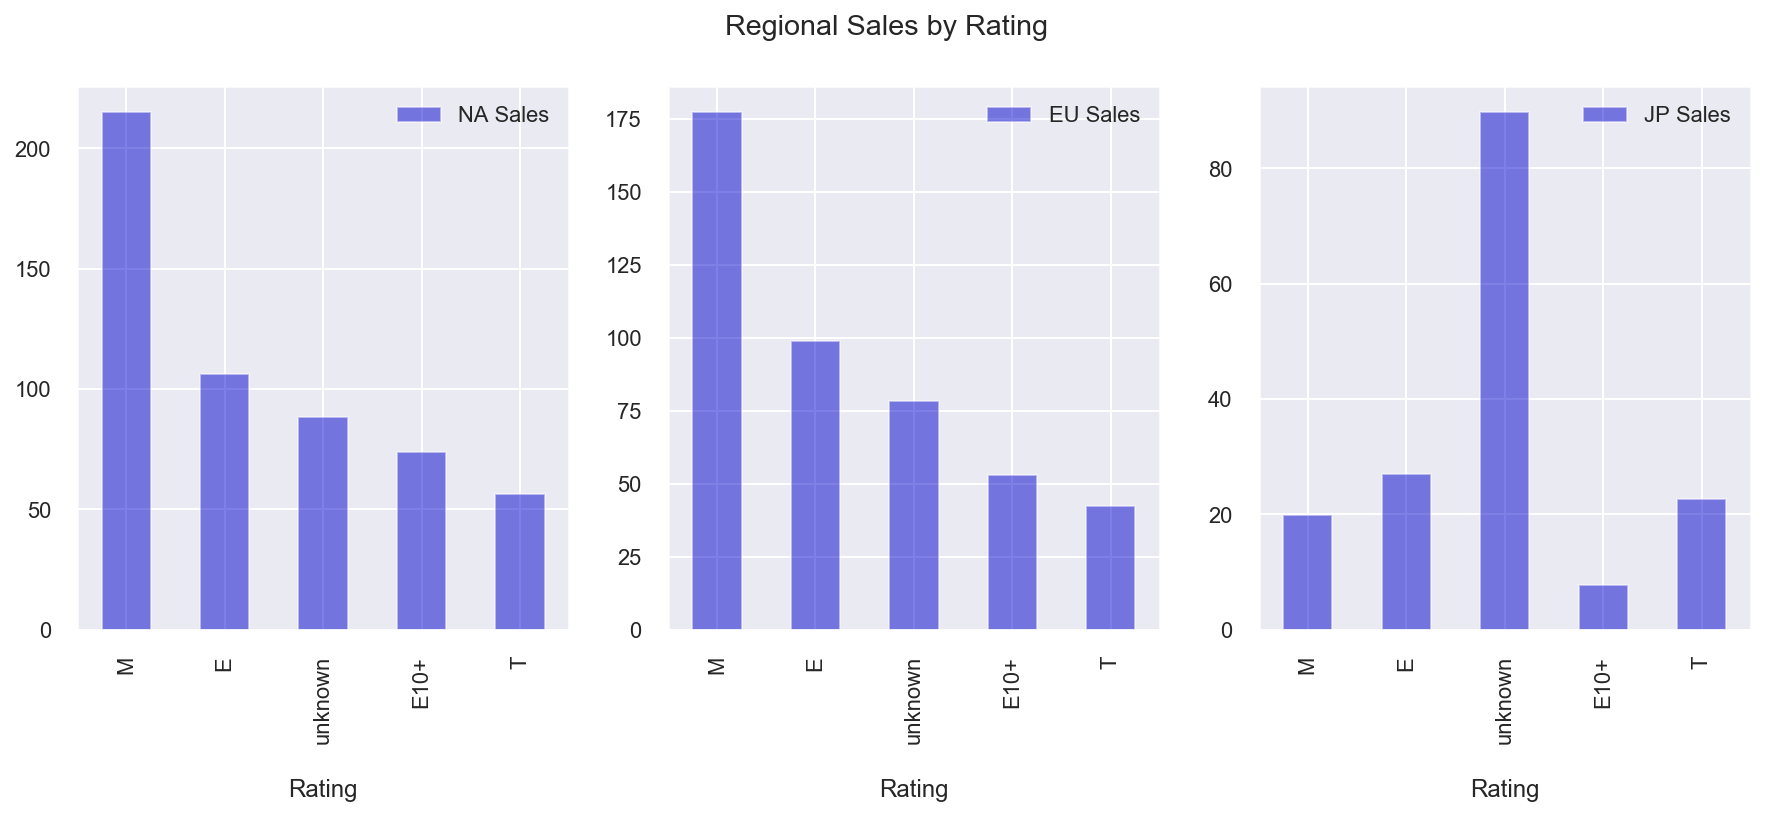

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
plt.suptitle('Regional Sales by Rating')

for ycol, ax in zip(['NA Sales', 'EU Sales','JP Sales'], axes):
    region_ratings.head().plot(kind='bar', x='index', y=ycol, ax=ax, alpha=0.5, color='#0000CD').set_xlabel('\nRating')
plt.show()

The highest grossing rating in Japan is unknown. We can see that North Americans and Europeans prefer M rated games. In Europe and North America, E rated games come in second. 

In [135]:
#top grossing game in the region
na_top = recent_years.iloc[recent_years['na_sales']].sort_values(by='na_sales',ascending=False)[:1]

In [136]:
#top grossing game in the region
eu_top = recent_years.iloc[recent_years['eu_sales']].sort_values(by='eu_sales',ascending=False)[:1]

In [137]:
#top grossing game in the region
jp_top = recent_years.iloc[recent_years['jp_sales']].sort_values(by='jp_sales',ascending=False)[:1]

In [138]:
region_top = pd.concat([na_top, eu_top, jp_top], axis=0)
region_top

,name,year_of_release,platform,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,top_region,critic_score,user_score,rating
23,Grand Theft Auto V,2013,X360,Action,9.66,5.14,0.06,1.41,16.27,North America,97,8.1,M
16,Grand Theft Auto V,2013,PS3,Action,7.02,9.09,0.98,3.96,21.05,Europe,97,8.2,M
33,Pokemon X/Pokemon Y,2013,3DS,Role-Playing,5.28,4.19,4.35,0.78,14.60,North America,<NA>,NaN,unknown


Oddly, the highest grossing game in each region was a 2013 release. In North America and Europe, the highest grossing game was Grand Theft Auto V, although it was on X360 and PS3 respectively. In Japan, PokemonX/Pokemon Y on 3DS was the highest grossing.

### Conclusion

Key insights about platform, rating and genre by region:
* ⚡ Action is the highest grossing genre in Europe and North America
    * 🎮 Grand Theft Auto V had highest total sales in both regions
* 💎 Role-playing games were highest grossing in Japan
    * 🎮 Pokemon X/Pokemon Y had highest total sales in the regions
* 💎 In Europe and Japan, E rated games have the most sales
* 💎 In North America, M rated games have the most sales

[Back to Table of Contents](#table-of-contents)

<a name="hypothesis-testing"></a>
## Hypothesis Testing

<a name="hypothesis-1"></a>
## Hypothesis Test 1

## Is there a statistically significant difference between average user ratings of the Xbox One and PC platforms?

In [139]:
xbox = recent_years[recent_years['platform'] == 'XOne']

In [140]:
pc = recent_years[recent_years['platform'] == 'PC']

In [141]:
#dataframe with distribution stats for surf and ultimate
data = {'variance': [np.var(xbox['user_score']), np.var(pc['user_score'])],
        'standard_deviation': [np.std(xbox['user_score']), np.std(pc['user_score'])],
        'mean': [xbox['user_score'].mean(), pc['user_score'].mean()],
        'median': [xbox['user_score'].median(), pc['user_score'].median()]}
dist_stats = pd.DataFrame.from_dict(data, orient='index', columns=['XOne', 'PC'])
dist_stats.style.set_caption('Distribution Stats for XOne vs. PC')

,XOne,PC
variance,1.621408,2.657349
standard_deviation,1.273345,1.630138
mean,6.470339,6.473333
median,6.650000,6.800000


> $H_0$: Average user scores do not differ between XOne and PC platforms.

> $H_1$: Average profits do differ between XOne and PC platforms.

> $\alpha$ = 0.05

In [142]:
alpha = 0.05

plan_results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False , nan_policy='omit')

print('p-value: ', plan_results.pvalue)

if (plan_results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.9862334275088718
We can't reject the null hypothesis


Our null hypothesis is that there is no difference in average user rating for XOne and PC platforms. The p-value is 0.5578156677760493. The findings are not statistically significant! With that, we **cannot reject** the null hypothesis. Just looking at the means we saw that they are really close, with XOne at 6.5 and PC at 6.4.

<a name="hypothesis-2"></a>
## Hypothesis Test 2

## Is there a statistically significant difference between average user ratings for the Action and Sports genres ...Action vs Sports?

In [143]:
action = recent_years[recent_years['genre'] == 'Action']

In [144]:
sports = recent_years[recent_years['genre'] == 'Sports']

In [145]:
#dataframe with distribution stats for surf and ultimate
import statistics as stats
data = {'variance': [np.var(action['user_score']), np.var(sports['user_score'])],
        'standard_deviation': [np.std(action['user_score']), np.std(sports['user_score'])],
        'mean': [action['user_score'].mean(), sports['user_score'].mean()],
        'median': [action['user_score'].median(), sports['user_score'].median()]}
dist_stats = pd.DataFrame.from_dict(data, orient='index', columns=['Action', 'Sports']).T
dist_stats.style.set_caption('Distribution Stats for Action vs. Sports')

,variance,standard_deviation,mean,median
Action,1.810364,1.345498,6.863758,7.200000
Sports,2.818088,1.678716,5.477215,5.700000


> $H_0$: Average user scores do not differ between Action and Sports genres.

> $H_1$: Average profits do differ between Action and Sports genres.

> $\alpha$ = 0.05

In [146]:
alpha = 0.05

plan_results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False , nan_policy='omit')

print('p-value: ', plan_results.pvalue)

if (plan_results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  7.910287681774135e-18
We reject the null hypothesis


Our null hypothesis is that there is no difference in average user rating for Action and Sport genres. The p-value is 1.2634332444832794e-19. The findings are statistically significant! With that, we **reject** the null hypothesis. We can say with 95% confidence that the average user score for Action (6.8) is higher than the mean user score for Sports (5.4).

[Back to Table of Contents](#table-of-contents)

<a name="conclusions"></a>
## Conclusions

* 📝 Platforms have a peak lifespan of 5-6 years
* 📆 The most game release were between 2007 and 2011
* 💎 The most popular platforms at the moment are PS4, X360 and PS3
* 🏆 Grand Theft Auto V was the top selling game overall
* 🔫 Action and Shooter games sell best in the US
    * Top Console: X360
    * 🎮Top Game: Grand Theft Auto V - 2013
* 🔫 Action and Shooter games sell best in the Europe
    * Top Console: PS4
    * 🎮Top Game: Grand Theft Auto V - 2013
* Japan is a unique market with a focus on portable consoles and role-playing games
    * Top Console: 3DS
    * 🎮Top Game: Pokemon X/Pokemon Y - 2013
* 💰 Most sales overall are for E rated games


I would recommend carrying PS4 and X360 games in the Action, Shooter genres and Role-playing games on 3DS. PS4, PS3 and X360 platforms were top grossing overall for 2012-2016. It is wise to carry PS3 games while PS4 phases in as the leading platform. 

[Back to Table of Contents](#table-of-contents)